# NFL Player Statistics Exploration

## Libraries

In [2]:
# - What am I doing? -
# Loading in libraries

# Load in data exploration libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use for filtering data by date
from datetime import datetime, timedelta

## Data loading and cleaning

In [33]:
# - What am I doing? -
# Read in NFL Player Statistics data

# Pull Week to week gamelogs for top QBs, RBs, and WR
QuarterbackWeektoWeek2023 = pd.read_csv(r'/Users/jacoblender/Desktop/Football dash/Data/PasserGamelog_RAW.csv')
RunningbackWeektoWeek2023 = pd.read_csv(r'/Users/jacoblender/Desktop/Football dash/Data/RunningbackGamelog_RAW.csv')
ReceiverWeektoWeek2023 = pd.read_csv(r'/Users/jacoblender/Desktop/Football dash/Data/ReceiverGamelog_RAW.csv')

# Create list of dataframes to iterate through.
files = [QuarterbackWeektoWeek2023, RunningbackWeektoWeek2023, ReceiverWeektoWeek2023]

# Removed unnamed index column
for i in range(len(files)):
    files[i].drop(['Unnamed: 0'], axis=1, inplace=True, errors='ignore')

In [34]:
# - What am I doing? -
# PASS_YDS column is being cast as an object type. This is because the commas in integer are messing 
# / with the data type.
# # Remove the commas from the column and then change datatype to int64.
# PassingLeaders2023['PASS_YDS'] = PassingLeaders2023['PASS_YDS'].str.replace(r',', '')
# PassingLeaders2023['PASS_YDS'] = PassingLeaders2023['PASS_YDS'].astype(int)

# # RUSH_YDS column is being cast as an object type. This is because the commas in integer are messing with the data type.
# # Remove the commas from the column and then change datatype to int64.
# RushingLeaders2023['RUSH_YDS'] = RushingLeaders2023['RUSH_YDS'].str.replace(r',', '')
# RushingLeaders2023['RUSH_YDS'] = RushingLeaders2023['RUSH_YDS'].astype(int)

# # REC_YDS column is being cast as an object type. This is because the commas in integer are messing with the data type.
# # Remove the commas from the column and then change datatype to int64.
# ReceivingLeaders2023['REC_YDS'] = ReceivingLeaders2023['REC_YDS'].str.replace(r',', '')
# ReceivingLeaders2023['REC_YDS'] = ReceivingLeaders2023['REC_YDS'].astype(int)

# QBR column is being cast as an object type. This is because the commas in integer are messing with 
# / the data type.
# Remove the commas from the column and then change datatype to int64.
QuarterbackWeektoWeek2023['QBR'] = QuarterbackWeektoWeek2023['QBR'].str.replace(r'.', '')
QuarterbackWeektoWeek2023['QBR'] = QuarterbackWeektoWeek2023['QBR'].str.replace(r'-', '')
QuarterbackWeektoWeek2023['QBR'] = QuarterbackWeektoWeek2023['QBR'].str.replace(r'', '')

# 2. Convert QBR dtype from object to numeric.
QuarterbackWeektoWeek2023['QBR'] = pd.to_numeric(QuarterbackWeektoWeek2023['QBR'], errors='coerce')

In [35]:
# - What am I doing? -
# Drop duplicate rows. We do this because a person can be a leader in Rushing and Receiving. When we put that player from 
# Rushing and Receiver leaderboard in their positional dataframe. There results are then doubled up.

QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop_duplicates()
RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop_duplicates()
ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.drop_duplicates()

In [36]:
# - What am I doing? -
# I want to look at QBs that have had their reps in regular season game. To be in this dataframe, a player must have taken a 100 snaps.

# Group by 'Player' and sum completions
grouped_QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.groupby('playerName')['ATT'].sum().reset_index()

# Filter players with total completions greater than or equal to 100
filtered_players = grouped_QuarterbackWeektoWeek2023.loc[grouped_QuarterbackWeektoWeek2023['ATT'] >= 50, 'playerName']

# Keep only rows in the original DataFrame for the filtered players
QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023[QuarterbackWeektoWeek2023['playerName'].isin(filtered_players)]

In [37]:
# - What am I doing? -
# I want to look at RBs that have had their reps in regular season game. 
# To be in this dataframe, a player must have taken a 100 snaps.

# Group by 'Player' and sum completions
grouped_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.groupby('playerName')['CAR'].sum().reset_index()

# Filter players with total completions greater than or equal to 100
filtered_players = grouped_RunningbackWeektoWeek2023.loc[grouped_RunningbackWeektoWeek2023['CAR'] >= 50, 'playerName']

# Keep only rows in the original DataFrame for the filtered players
RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023[RunningbackWeektoWeek2023['playerName'].isin(filtered_players)]

In [38]:
# - What am I doing? -
# I want to look at Receivers that have had their reps in regular season game. 
# To be in this dataframe, a player must have taken a 100 snaps.

# Group by 'Player' and sum completions
grouped_ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.groupby('playerName')['TGTS'].sum().reset_index()

# Filter players with total completions greater than or equal to 100
filtered_players = grouped_ReceiverWeektoWeek2023.loc[grouped_ReceiverWeektoWeek2023['TGTS'] >= 50, 'playerName']

# Keep only rows in the original DataFrame for the filtered players
ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023[ReceiverWeektoWeek2023['playerName'].isin(filtered_players)]

In [39]:
# - What am I doing? -
# Get high level information about NFL Player Statistics.

QuarterbackWeektoWeek2023.info()
RunningbackWeektoWeek2023.info()
ReceiverWeektoWeek2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 372 entries, 0 to 381
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        372 non-null    object 
 1   Opponent    372 non-null    object 
 2   Result      372 non-null    object 
 3   CMP         372 non-null    int64  
 4   ATT         372 non-null    int64  
 5   PASS_YDS    372 non-null    int64  
 6   CMP%        372 non-null    float64
 7   PASS_AVG    372 non-null    float64
 8   PASS_TD     372 non-null    int64  
 9   INT         372 non-null    int64  
 10  PASS_LNG    372 non-null    int64  
 11  SACK        372 non-null    int64  
 12  RTG         372 non-null    float64
 13  QBR         371 non-null    float64
 14  RUSH_CAR    372 non-null    int64  
 15  RUSH_YDS    372 non-null    int64  
 16  RUSH_AVG    372 non-null    float64
 17  RUSH_TD     372 non-null    int64  
 18  LNG_RUSH    372 non-null    int64  
 19  playerName  372 non-null    object

In [40]:
# - What am I doing? -
# For [Date] column in Quarterback gamelog dataframe, need to remove day of the week and add year to the date.

# 1. Split [Date] column by a ' ' (space) into [Day of the week] and [MonthYear] columns.
QuarterbackWeektoWeek2023[['Day of the week', 'MonthYear']] = QuarterbackWeektoWeek2023['Date'].str.split(' ', expand=True)

# 2. Split [MonthYear] column by a '/' into [Month] and [Day] columns.
QuarterbackWeektoWeek2023[['Month', 'Day']] = QuarterbackWeektoWeek2023['MonthYear'].str.split('/', expand=True)

# 3. Convert [Month] column from an object to an int.
QuarterbackWeektoWeek2023['Month'] = QuarterbackWeektoWeek2023['Month'].astype(int)

# 4. If game happened after June it was 2023 otherwise it is 2024. The football season runs from August to February. 
# The logic above utilizes that to determine a year when the game took place. This will need to be changed for next season. 
QuarterbackWeektoWeek2023.loc[QuarterbackWeektoWeek2023['Month'] > 6, 'Date'] = QuarterbackWeektoWeek2023['MonthYear'] + '/23'
QuarterbackWeektoWeek2023.loc[QuarterbackWeektoWeek2023['Month'] < 6, 'Date'] = QuarterbackWeektoWeek2023['MonthYear'] + '/24'

# 5. Drop [Day of the week], [Month], [Day], [MonthYear] columns.
QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop(columns=['Day of the week', 'Month', 'Day', 'MonthYear'])

# 6. Change Date to a datetime datetype
QuarterbackWeektoWeek2023['Date'] = pd.to_datetime(QuarterbackWeektoWeek2023['Date'].str.strip(), format='%m/%d/%y').dt.date

# Print success if data is imported and unnamed index column is removed.
print("Success!")

Success!


In [41]:
# - What am I doing? -
# For [Date] column in Runningback gamelog dataframe, need to remove day of the week and add year to the date.

# 1. Split [Date] column by a ' ' (space) into [Day of the week] and [MonthYear] columns.
RunningbackWeektoWeek2023[['Day of the week', 'MonthYear']] = RunningbackWeektoWeek2023['Date'].str.split(' ', expand=True)

# 2. Split [MonthYear] column by a '/' into [Month] and [Day] columns.
RunningbackWeektoWeek2023[['Month', 'Day']] = RunningbackWeektoWeek2023['MonthYear'].str.split('/', expand=True)

# 3. Convert [Month] column from an object to an int.
RunningbackWeektoWeek2023['Month'] = RunningbackWeektoWeek2023['Month'].astype(int)

# 4. If game happened after June it was 2023 otherwise it is 2024. The football season runs from August to February. 
# The logic above utilizes that to determine a year when the game took place. This will need to be changed for next season. 
RunningbackWeektoWeek2023.loc[RunningbackWeektoWeek2023['Month'] > 6, 'Date'] = RunningbackWeektoWeek2023['MonthYear'] + '/23'
RunningbackWeektoWeek2023.loc[RunningbackWeektoWeek2023['Month'] < 6, 'Date'] = RunningbackWeektoWeek2023['MonthYear'] + '/24'

# 5. Drop [Day of the week], [Month], [Day], [MonthYear] columns.
RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Day of the week', 'Month', 'Day', 'MonthYear'])

# 6. Change Date to a datetime datetype
RunningbackWeektoWeek2023['Date'] = pd.to_datetime(RunningbackWeektoWeek2023['Date'].str.strip(), format='%m/%d/%y').dt.date

# Print success if data is imported and unnamed index column is removed.
print("Success!")

Success!


In [42]:
# - What am I doing? -
# For [Date] column in Receiver gamelog dataframe, need to remove day of the week and add year to the date.

# 1. Split [Date] column by a ' ' (space) into [Day of the week] and [MonthYear] columns.
ReceiverWeektoWeek2023[['Day of the week', 'MonthYear']] = ReceiverWeektoWeek2023['Date'].str.split(' ', expand=True)

# 2. Split [MonthYear] column by a '/' into [Month] and [Day] columns.
ReceiverWeektoWeek2023[['Month', 'Day']] = ReceiverWeektoWeek2023['MonthYear'].str.split('/', expand=True)

# 3. Convert [Month] column from an object to an int.
ReceiverWeektoWeek2023['Month'] = ReceiverWeektoWeek2023['Month'].astype(int)

# 4. If game happened after June it was 2023 otherwise it is 2024. The football season runs from August to February. 
# The logic above utilizes that to determine a year when the game took place. This will need to be changed for next season. 
ReceiverWeektoWeek2023.loc[ReceiverWeektoWeek2023['Month'] > 6, 'Date'] = ReceiverWeektoWeek2023['MonthYear'] + '/23'
ReceiverWeektoWeek2023.loc[ReceiverWeektoWeek2023['Month'] < 6, 'Date'] = ReceiverWeektoWeek2023['MonthYear'] + '/24'

# 5. Drop [Day of the week], [Month], [Day], [MonthYear] columns.
ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.drop(columns=['Day of the week', 'Month', 'Day', 'MonthYear'])

# 6. Change Date to a datetime datetype
ReceiverWeektoWeek2023['Date'] = pd.to_datetime(ReceiverWeektoWeek2023['Date'].str.strip(), format='%m/%d/%y').dt.date

# Print success if data is imported and unnamed index column is removed.
print("Success!")

Success!


In [43]:
# - What am I doing? -
# Splitting [result] column into a winner score, loser score, and OT column in Quarterback gamelog dataframe

# 1. Split [Score] column into score and result of game (W/L).
QuarterbackWeektoWeek2023['Score'] = QuarterbackWeektoWeek2023['Result'].str[1:]
QuarterbackWeektoWeek2023['Game Result'] = QuarterbackWeektoWeek2023['Result'].str[:1]

# 2. Split [Score] column by a '-' into [Winner Score] and [Loser Score] columns.
QuarterbackWeektoWeek2023[['Winner Score', 'Loser Score']] = QuarterbackWeektoWeek2023['Score'].str.split('-', expand=True)

# 3. Convert [Winner Score] column from an object to an int.
QuarterbackWeektoWeek2023['Winner Score'] = QuarterbackWeektoWeek2023['Winner Score'].astype(int)

# 4. Split [Loser Score] column by a ' ' (space) into [Loser Score] and [OT?] columns.
QuarterbackWeektoWeek2023[['Loser Score', 'OT?']] = QuarterbackWeektoWeek2023['Loser Score'].str.split(' ', expand=True)

# 5. Convert [Loser Score] column from an object to an int.
QuarterbackWeektoWeek2023['Loser Score'] = QuarterbackWeektoWeek2023['Loser Score'].astype(int)

# 6. Drop [Score] and [Result] columns.
QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop(columns=['Score', 'Result'])

# Print success if data is split and columns are removed.
print("Success!")

Success!


In [44]:
# - What am I doing? -
# Splitting [result] column into a winner score, loser score, and OT column in Runningback gamelog dataframe

# 1. Split [Score] column into score and result of game (W/L).
RunningbackWeektoWeek2023['Score'] = RunningbackWeektoWeek2023['Result'].str[1:]
RunningbackWeektoWeek2023['Game Result'] = RunningbackWeektoWeek2023['Result'].str[:1]

# 2. Split [Score] column by a '-' into [Winner Score] and [Loser Score] columns.
RunningbackWeektoWeek2023[['Winner Score', 'Loser Score']] = RunningbackWeektoWeek2023['Score'].str.split('-', expand=True)

# 3. Convert [Winner Score] column from an object to an int.
RunningbackWeektoWeek2023['Winner Score'] = RunningbackWeektoWeek2023['Winner Score'].astype(int)

# 4. Split [Loser Score] column by a ' ' (space) into [Loser Score] and [OT?] columns.
RunningbackWeektoWeek2023[['Loser Score', 'OT?']] = RunningbackWeektoWeek2023['Loser Score'].str.split(' ', expand=True)

# 5. Convert [Loser Score] column from an object to an int.
RunningbackWeektoWeek2023['Loser Score'] = RunningbackWeektoWeek2023['Loser Score'].astype(int)

# 6. Drop [Score] and [Result] columns.
RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Score', 'Result'])

# Print success if data is split and columns are removed.
print("Success!")

Success!


In [45]:
# - What am I doing? -
# Splitting [result] column into a winner score, loser score, and OT column in Receiver gamelog dataframe

# 1. Split [Score] column into score and result of game (W/L).
ReceiverWeektoWeek2023['Score'] = ReceiverWeektoWeek2023['Result'].str[1:]
ReceiverWeektoWeek2023['Game Result'] = ReceiverWeektoWeek2023['Result'].str[:1]

# 2. Split [Score] column by a '-' into [Winner Score] and [Loser Score] columns.
ReceiverWeektoWeek2023[['Winner Score', 'Loser Score']] = ReceiverWeektoWeek2023['Score'].str.split('-', expand=True)

# 3. Convert [Winner Score] column from an object to an int.
ReceiverWeektoWeek2023['Winner Score'] = ReceiverWeektoWeek2023['Winner Score'].astype(int)

# 4. Split [Loser Score] column by a ' ' (space) into [Loser Score] and [OT?] columns.
ReceiverWeektoWeek2023[['Loser Score', 'OT?']] = ReceiverWeektoWeek2023['Loser Score'].str.split(' ', expand=True)

# 5. Convert [Loser Score] column from an object to an int.
ReceiverWeektoWeek2023['Loser Score'] = ReceiverWeektoWeek2023['Loser Score'].astype(int)

# 6. Drop [Score] and [Result] columns.
ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.drop(columns=['Score', 'Result'])

# Print success if data is split and columns are removed.
print("Success!")

Success!


In [46]:
# - What am I doing? -
# Looking at [Opponent] column in Quarterback gamelog dataframe to determine if it was a Home/Away game.

# 1. Create function to determine 'Away' (@) or else 'Home'
def home_away_indicator(indicator):
    return 'Away' if '@' in indicator else 'Home'

# 2. Create function to remove 'vs' and '@' from [Opponent] column.
def remove_special_characters(text):
    return text.replace('@', '').replace('vs', '')

# 3. Apply the home_away_indicator() function to [Opponent] column to create a [Home/Away] column.
QuarterbackWeektoWeek2023['Home/Away'] = QuarterbackWeektoWeek2023['Opponent'].apply(lambda x: home_away_indicator(x))

# 4. Apply the remove_special_characters() function to [Opponent] to remove special characters from [Opponent].
QuarterbackWeektoWeek2023['Opponent'] = QuarterbackWeektoWeek2023['Opponent'].apply(lambda x: remove_special_characters(x))

# Print success if column is split and characters are removed.
print("Success!")

Success!


In [47]:
# - What am I doing? -
# Looking at [Opponent] column in Runningback gamelog dataframe to determine if it was a Home/Away game.

# 1. Create function to determine 'Away' (@) or else 'Home'
def home_away_indicator(indicator):
    return 'Away' if '@' in indicator else 'Home'

# 2. Create function to remove 'vs' and '@' from [Opponent] column.
def remove_special_characters(text):
    return text.replace('@', '').replace('vs', '')

# 3. Apply the home_away_indicator() function to [Opponent] column to create a [Home/Away] column.
RunningbackWeektoWeek2023['Home/Away'] = RunningbackWeektoWeek2023['Opponent'].apply(lambda x: home_away_indicator(x))

# 4. Apply the remove_special_characters() function to [Opponent] to remove special characters from [Opponent].
RunningbackWeektoWeek2023['Opponent'] = RunningbackWeektoWeek2023['Opponent'].apply(lambda x: remove_special_characters(x))

# Print success if column is split and characters are removed.
print("Success!")

Success!


In [48]:
# - What am I doing? -
# Looking at [Opponent] column in Receiver gamelog dataframe to determine if it was a Home/Away game.

# 1. Create function to determine 'Away' (@) or else 'Home'
def home_away_indicator(indicator):
    return 'Away' if '@' in indicator else 'Home'

# 2. Create function to remove 'vs' and '@' from [Opponent] column.
def remove_special_characters(text):
    return text.replace('@', '').replace('vs', '')

# 3. Apply the home_away_indicator() function to [Opponent] column to create a [Home/Away] column.
ReceiverWeektoWeek2023['Home/Away'] = ReceiverWeektoWeek2023['Opponent'].apply(lambda x: home_away_indicator(x))

# 4. Apply the remove_special_characters() function to [Opponent] to remove special characters from [Opponent].
ReceiverWeektoWeek2023['Opponent'] = ReceiverWeektoWeek2023['Opponent'].apply(lambda x: remove_special_characters(x))

# Print success if column is split and characters are removed.
print("Success!")

Success!


In [49]:
# - What am I doing? -
# Converting percentage to a decimal for calculation reasons.

# Don't put cap on number of columns shown.
pd.options.display.max_columns = None

# 1. Divide integer by 100 to convert percentage to decimal.
QuarterbackWeektoWeek2023['CMP%'] = QuarterbackWeektoWeek2023['CMP%'] / 100

# Print success if percentage is converted to decimal.
print("Success!")

Success!


In [50]:
# - What am I doing? -
# Look at columns with specific data types (float64(5), int64(13), object(6)).

# Tables: QuarterbackWeektoWeek2023, RunningbackWeektoWeek2023, ReceiverWeektoWeek2023

# Select columns only with specific data types.
RunningbackWeektoWeek2023.select_dtypes(include='float')

RUSH_AVG  REC_AVG
0         8.1      0.0
1         4.6     11.0
2         2.0     17.0
3         4.2      0.0
4         2.2     -4.0
..        ...      ...
633       3.0      1.5
634       1.3      0.0
635       2.1      6.0
636       8.0      7.0
637       8.0      5.5

[568 rows x 2 columns]

In [51]:
# - What am I doing? -
# Switch dates to datetime format
QuarterbackWeektoWeek2023['Date'] = pd.to_datetime(QuarterbackWeektoWeek2023['Date'])
RunningbackWeektoWeek2023['Date'] = pd.to_datetime(RunningbackWeektoWeek2023['Date'])
ReceiverWeektoWeek2023['Date'] = pd.to_datetime(ReceiverWeektoWeek2023['Date'])


In [52]:
# - What am I doing? -
# Add a column that calculates the points of the players according to Sleeper Scoring

# What do you get points for?

scoring = {
# Passing
'PASS_YDS' : 0.04,
'PASS_TD' : 4,
'INT' : -1,
    
# Rushing
'RUSH_YDS' : 0.1,
'RUSH_TD' : 6
}

# What did each player get for those scoring areas?

def calculate_fantasy_points(row):
    fantasy_points = 0
    for stat, value in scoring.items():
        fantasy_points += row[stat] * value

    return fantasy_points

# Run function and then add to dataframe
QuarterbackWeektoWeek2023['fantasy_points'] = QuarterbackWeektoWeek2023.apply(calculate_fantasy_points, axis=1)

In [53]:
# - What am I doing? -
# Add a column that calculates the points of the players according to Sleeper Scoring

# What do you get points for?

scoring = {
# Rushing
'RUSH_YDS' : 0.1,
'RUSH_TD' : 6,
'LST' : -2,

# Receiving
'REC':0.5,
'REC_YDS':0.1,
'REC_TD':6

}

# What did each player get for those scoring areas?

def calculate_fantasy_points(row):
    fantasy_points = 0
    for stat, value in scoring.items():
        fantasy_points += row[stat] * value

    return fantasy_points

# Run function and then add to dataframe
RunningbackWeektoWeek2023['fantasy_points'] = RunningbackWeektoWeek2023.apply(calculate_fantasy_points, axis=1)

In [54]:
# - What am I doing? -
# Add a column that calculates the points of the players according to Sleeper Scoring

# What do you get points for?

scoring = {
# Rushing
'RUSH_YDS' : 0.1,
'RUSH_TD' : 6,
'LST': -2,

# Receiving
'REC':0.5,
'REC_YDS':0.1,
'REC_TD':6

}

# What did each player get for those scoring areas?

def calculate_fantasy_points(row):
    fantasy_points = 0
    for stat, value in scoring.items():
        fantasy_points += row[stat] * value

    return fantasy_points

# Run function and then add to dataframe
ReceiverWeektoWeek2023['fantasy_points'] = ReceiverWeektoWeek2023.apply(calculate_fantasy_points, axis=1)

In [55]:
# - What am I doing? -
# Add Reception % to Runningback and Wide Receiver

RunningbackWeektoWeek2023['REC%'] = RunningbackWeektoWeek2023['REC'] / RunningbackWeektoWeek2023['TGTS']
ReceiverWeektoWeek2023['REC%'] = ReceiverWeektoWeek2023['REC'] / ReceiverWeektoWeek2023['TGTS']

## Basic Stats

In [56]:
# - What am I doing? -
# Get common statistics to learn more about quarterbacks week to week.
describe_QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop(columns=['Date'])

# Get common statistics to learn more about quarterbacks week to week.
describe_QuarterbackWeektoWeek2023.describe()

CMP         ATT    PASS_YDS        CMP%    PASS_AVG     PASS_TD  \
count  372.000000  372.000000  372.000000  372.000000  372.000000  372.000000   
mean    18.497312   29.091398  192.435484    0.618435    6.322849    1.005376   
std      8.120222   11.640261   92.570239    0.150619    2.120301    0.998637   
min      0.000000    0.000000   -1.000000    0.000000   -0.100000    0.000000   
25%     13.000000   23.000000  134.000000    0.562500    5.300000    0.000000   
50%     19.000000   30.500000  200.000000    0.639000    6.300000    1.000000   
75%     24.000000   37.000000  256.250000    0.697000    7.700000    2.000000   
max     40.000000   58.000000  411.000000    1.000000   13.300000    4.000000   

              INT    PASS_LNG        SACK         RTG          QBR  \
count  372.000000  372.000000  372.000000  372.000000   371.000000   
mean     0.693548   33.080645    2.505376   81.249194   438.239892   
std      0.876566   15.843029    1.913908   26.769696   252.442552   
min      0.000000    0.000000    0.000000    0.000000     4.000000   
25%      0.000000   23.000000    1.000000   65.475000   219.000000   
50%      0.000000   32.000000    2.000000   83.200000   418.000000   
75%      1.000000   42.000000    4.000000  100.075000   637.000000   
max      4.000000   80.000000   10.000000  145.500000  1000.000000   

         RUSH_CAR    RUSH_YDS    RUSH_AVG     RUSH_TD    LNG_RUSH  \
count  372.000000  372.000000  372.000000  372.000000  372.000000   
mean     3.403226   14.887097    3.686022    0.155914    8.026882   
std      2.834860   18.032560    3.766531    0.398640    7.792064   
min      0.000000   -6.000000   -5.000000    0.000000   -5.000000   
25%      1.000000    1.000000    0.500000    0.000000    2.000000   
50%      3.000000    9.000000    3.300000    0.000000    7.000000   
75%      4.000000   24.000000    6.000000    0.000000   12.000000   
max     18.000000  104.000000   21.000000    2.000000   44.000000   

       Winner Score  Loser Score  fantasy_points  
count    372.000000   372.000000      372.000000  
mean      26.698925    15.551075       13.449570  
std        8.677554     8.095793        7.754463  
min        3.000000     0.000000       -0.880000  
25%       21.000000    10.000000        7.735000  
50%       27.000000    16.000000       13.250000  
75%       31.000000    20.000000       19.090000  
max       70.000000    38.000000       34.100000

In [57]:
# - What am I doing? -
# Get common statistics to learn more about quarterbacks overall season.
describe_QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop(columns=['Date', 'Game Result', 'Opponent', 'OT?', 'Home/Away'])
# Group by and sum results by player to learn more about quarterbacks overall season.
describe_QuarterbackWeektoWeek2023.groupby('playerName').mean().describe()


CMP        ATT    PASS_YDS       CMP%   PASS_AVG    PASS_TD  \
count  42.000000  42.000000   42.000000  42.000000  42.000000  42.000000   
mean   17.558753  27.799049  182.287270   0.603648   6.124705   0.909929   
std     4.407308   6.304254   50.946981   0.085654   1.136755   0.456458   
min     6.666667   8.833333   58.166667   0.195333   2.066667   0.142857   
25%    15.028571  24.482143  144.387500   0.583548   5.670000   0.600000   
50%    17.812500  28.480769  189.089286   0.622841   6.275000   0.888889   
75%    20.115385  32.433824  222.434028   0.651950   6.926389   1.234163   
max    27.000000  38.875000  291.375000   0.696824   8.220000   2.250000   

             INT   PASS_LNG       SACK         RTG         QBR   RUSH_CAR  \
count  42.000000  42.000000  42.000000   42.000000   42.000000  42.000000   
mean    0.718249  31.882518   2.420738   77.655814  414.453553   3.285525   
std     0.365649   8.315237   0.940789   14.767866  118.180194   1.770503   
min     0.000000  11.000000   0.857143   29.466667  156.600000   1.000000   
25%     0.533333  27.400000   1.768382   71.748214  318.571429   2.031250   
50%     0.651515  33.280303   2.240385   81.268590  441.200000   2.928571   
75%     0.972222  36.769231   3.000000   87.851786  495.562500   4.000000   
max     1.600000  50.500000   5.000000  102.837500  606.625000   9.538462   

        RUSH_YDS   RUSH_AVG    RUSH_TD   LNG_RUSH  Winner Score  Loser Score  \
count  42.000000  42.000000  42.000000  42.000000     42.000000    42.000000   
mean   14.064370   3.460395   0.149473   7.439949     26.661311    15.413087   
std    11.290357   1.699347   0.196175   4.214336      2.869480     3.376531   
min     0.500000   0.250000   0.000000   0.500000     21.500000     9.000000   
25%     5.636905   2.187500   0.000000   4.238095     24.509615    12.937500   
50%     9.809524   3.321667   0.101010   7.050000     26.212121    15.728571   
75%    21.175000   4.818452   0.223077  10.338462     28.794444    17.677885   
max    50.538462   7.740000   1.000000  16.538462     33.000000    23.600000   

       fantasy_points  
count       42.000000  
mean        12.516235  
std          4.396605  
min          3.442857  
25%          9.676786  
50%         12.549333  
75%         15.752000  
max         20.342500

In [58]:
# - What am I doing? -
# Get common statistics to learn more about runningbacks week to week.
describe_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date'])

# Get common statistics to learn more about runningbacks week to week.
describe_RunningbackWeektoWeek2023.describe()

# Conclusions:
# Who had 13 receptions and 16 targets? This would be valuable in PPR league

CAR    RUSH_YDS    RUSH_AVG     RUSH_TD    RUSH_LNG         REC  \
count  568.000000  568.000000  568.000000  568.000000  568.000000  568.000000   
mean    10.461268   41.933099    3.876585    0.255282   13.262324    2.218310   
std      6.629679   32.495379    2.145172    0.521130   10.938816    1.994229   
min      0.000000   -6.000000   -2.500000    0.000000   -2.000000    0.000000   
25%      5.000000   16.750000    2.700000    0.000000    7.000000    1.000000   
50%     10.000000   37.000000    3.700000    0.000000   11.000000    2.000000   
75%     15.000000   62.000000    4.825000    0.000000   16.000000    3.000000   
max     37.000000  188.000000   16.000000    2.000000   83.000000   13.000000   

             TGTS     REC_YDS     REC_AVG      REC_TD     LNG_REC         FUM  \
count  568.000000  568.000000  568.000000  568.000000  568.000000  568.000000   
mean     2.864437   15.852113    5.601761    0.077465    9.540493    0.084507   
std      2.400236   18.935963    6.651992    0.274075   10.746319    0.284657   
min      0.000000  -11.000000   -7.000000    0.000000   -7.000000    0.000000   
25%      1.000000    1.000000    0.450000    0.000000    1.000000    0.000000   
50%      2.000000    9.000000    5.000000    0.000000    7.000000    0.000000   
75%      4.000000   24.000000    8.000000    0.000000   13.000000    0.000000   
max     16.000000  119.000000   75.000000    2.000000   75.000000    2.000000   

              LST          FF     KB  Winner Score  Loser Score  \
count  568.000000  568.000000  568.0    568.000000    568.00000   
mean     0.049296    0.001761    0.0     26.841549     16.21831   
std      0.216676    0.041959    0.0      9.127138      7.78287   
min      0.000000    0.000000    0.0      3.000000      0.00000   
25%      0.000000    0.000000    0.0     21.000000     10.00000   
50%      0.000000    0.000000    0.0     27.000000     17.00000   
75%      0.000000    0.000000    0.0     31.000000     20.00000   
max      1.000000    1.000000    0.0     70.000000     38.00000   

       fantasy_points        REC%  
count      568.000000  474.000000  
mean         8.785563    0.769717  
std          6.869132    0.280483  
min         -0.600000    0.000000  
25%          3.400000    0.666667  
50%          7.250000    0.833333  
75%         12.925000    1.000000  
max         37.100000    1.000000

In [59]:
# - What am I doing? -
# Get common statistics to learn more about runningbacks overall season.
describe_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date', 'Game Result', 'Opponent', 'OT?', 'Home/Away'])

# Get subset of data to include the top rushers by rushing yards, rushing TD, etc.
# describe_RunningbackWeektoWeek2023 = describe_RunningbackWeektoWeek2023.sort_values(by='RUSH_TD', ascending=False).head(24)


# Group by and sum results by player to learn more about runningbacks overall season.
describe_RunningbackWeektoWeek2023.groupby('playerName').sum().describe()

CAR     RUSH_YDS   RUSH_AVG    RUSH_TD    RUSH_LNG        REC  \
count   41.000000    41.000000  41.000000  41.000000   41.000000  41.000000   
mean   144.926829   580.926829  53.704878   3.536585  183.731707  30.731707   
std     66.644726   265.284412  13.430692   2.646673   71.843937  18.501384   
min     50.000000   167.000000  28.600000   0.000000   74.000000   1.000000   
25%     81.000000   352.000000  44.600000   2.000000  132.000000  18.000000   
50%    136.000000   588.000000  54.500000   3.000000  179.000000  29.000000   
75%    200.000000   792.000000  66.100000   5.000000  224.000000  47.000000   
max    268.000000  1070.000000  77.000000  11.000000  410.000000  76.000000   

            TGTS     REC_YDS     REC_AVG     REC_TD     LNG_REC        FUM  \
count  41.000000   41.000000   41.000000  41.000000   41.000000  41.000000   
mean   39.682927  219.609756   77.604878   1.073171  132.170732   1.170732   
std    23.568452  145.349386   38.423853   1.311302   73.736661   1.301968   
min     2.000000   12.000000    5.200000   0.000000   12.000000   0.000000   
25%    21.000000  119.000000   49.300000   0.000000   81.000000   0.000000   
50%    37.000000  198.000000   79.400000   1.000000  129.000000   1.000000   
75%    58.000000  296.000000  105.900000   2.000000  182.000000   2.000000   
max    95.000000  591.000000  154.100000   4.000000  280.000000   5.000000   

             LST         FF    KB  Winner Score  Loser Score  fantasy_points  \
count  41.000000  41.000000  41.0     41.000000    41.000000       41.000000   
mean    0.682927   0.024390   0.0    371.853659   224.682927      121.712195   
std     0.985876   0.156174   0.0     75.016519    49.786263       60.407227   
min     0.000000   0.000000   0.0    174.000000   114.000000       32.400000   
25%     0.000000   0.000000   0.0    343.000000   199.000000       74.100000   
50%     0.000000   0.000000   0.0    382.000000   232.000000      115.000000   
75%     1.000000   0.000000   0.0    420.000000   264.000000      163.000000   
max     4.000000   1.000000   0.0    504.000000   293.000000      250.500000   

            REC%  
count  41.000000  
mean    8.898679  
std     3.409427  
min     1.000000  
25%     6.425000  
50%     9.371429  
75%    11.216667  
max    15.433333

In [60]:
# - What am I doing? -
# Get common statistics to learn more about runningbacks week to week.
describe_ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.drop(columns=['Date'])

# Get common statistics to learn more about runningbacks week to week.
describe_ReceiverWeektoWeek2023.describe()

REC        TGTS     REC_YDS     REC_AVG      REC_TD     LNG_REC  \
count  788.000000  788.000000  788.000000  788.000000  788.000000  788.000000   
mean     4.309645    6.592640   51.590102   11.957868    0.285533   21.942893   
std      2.564652    3.339007   36.076873    6.926850    0.546160   13.758326   
min      0.000000    1.000000   -1.000000   -1.000000    0.000000   -1.000000   
25%      3.000000    4.000000   26.000000    8.075000    0.000000   13.000000   
50%      4.000000    6.000000   45.000000   10.800000    0.000000   19.000000   
75%      6.000000    9.000000   69.000000   14.600000    0.000000   29.000000   
max     18.000000   21.000000  230.000000   58.000000    3.000000   80.000000   

              CAR    RUSH_YDS    RUSH_AVG    LNG_RUSH     RUSH_TD         FUM  \
count  788.000000  788.000000  788.000000  788.000000  788.000000  788.000000   
mean     0.144670    0.680203    0.440609    0.604061    0.007614    0.049492   
std      0.493294    4.103089    2.603248    3.531393    0.086982    0.228441   
min      0.000000  -12.000000  -12.000000  -12.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      4.000000   54.000000   29.000000   45.000000    1.000000    2.000000   

              LST          FF     KB  Winner Score  Loser Score  \
count  788.000000  788.000000  788.0    788.000000   788.000000   
mean     0.030457    0.001269    0.0     27.197970    16.601523   
std      0.179187    0.035624    0.0      8.452206     7.875692   
min      0.000000    0.000000    0.0      3.000000     0.000000   
25%      0.000000    0.000000    0.0     21.000000    10.000000   
50%      0.000000    0.000000    0.0     27.000000    17.000000   
75%      0.000000    0.000000    0.0     31.000000    21.000000   
max      2.000000    1.000000    0.0     70.000000    38.000000   

       fantasy_points        REC%  
count      788.000000  788.000000  
mean         9.079822    0.650701  
std          6.771771    0.226428  
min         -0.600000    0.000000  
25%          4.200000    0.500000  
50%          7.400000    0.666667  
75%         12.500000    0.800000  
max         45.000000    1.000000

In [61]:
# - What am I doing? -
# Get common statistics to learn more about runningbacks overall season.
describe_ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.drop(columns=['Date', 'Game Result', 'Opponent', 'OT?', 'Home/Away'])

# Group by and sum results by player to learn more about runningbacks overall season.
describe_ReceiverWeektoWeek2023.groupby('playerName').sum().describe()

REC        TGTS      REC_YDS     REC_AVG     REC_TD     LNG_REC  \
count   53.000000   53.000000    53.000000   53.000000  53.000000   53.000000   
mean    64.075472   98.018868   767.037736  177.788679   4.245283  326.245283   
std     22.202606   31.849098   265.037948   38.981424   2.510789   80.209559   
min     31.000000   50.000000   352.000000  107.000000   0.000000  172.000000   
25%     46.000000   74.000000   552.000000  151.300000   2.000000  279.000000   
50%     61.000000   90.000000   719.000000  177.200000   4.000000  314.000000   
75%     79.000000  126.000000   960.000000  203.800000   6.000000  379.000000   
max    108.000000  175.000000  1456.000000  291.500000  10.000000  520.000000   

             CAR    RUSH_YDS   RUSH_AVG    LNG_RUSH    RUSH_TD        FUM  \
count  53.000000   53.000000  53.000000   53.000000  53.000000  53.000000   
mean    2.150943   10.113208   6.550943    8.981132   0.113208   0.735849   
std     4.486716   28.819505  15.552227   24.010807   0.375212   0.880361   
min     0.000000  -12.000000 -12.000000  -12.000000   0.000000   0.000000   
25%     0.000000    0.000000   0.000000    0.000000   0.000000   0.000000   
50%     0.000000    0.000000   0.000000    0.000000   0.000000   0.000000   
75%     2.000000    6.000000   6.000000    6.000000   0.000000   1.000000   
max    28.000000  178.000000  72.700000  144.000000   2.000000   3.000000   

             LST         FF    KB  Winner Score  Loser Score  fantasy_points  \
count  53.000000  53.000000  53.0     53.000000    53.000000       53.000000   
mean    0.452830   0.018868   0.0    404.377358   246.830189      134.998113   
std     0.748487   0.137361   0.0     72.723191    50.328435       45.813776   
min     0.000000   0.000000   0.0    253.000000   140.000000       60.700000   
25%     0.000000   0.000000   0.0    349.000000   203.000000       98.000000   
50%     0.000000   0.000000   0.0    420.000000   241.000000      126.000000   
75%     1.000000   0.000000   0.0    461.000000   293.000000      168.200000   
max     3.000000   1.000000   0.0    535.000000   355.000000      238.500000   

            REC%  
count  53.000000  
mean    9.674577  
std     1.926687  
min     5.432540  
25%     8.323810  
50%     9.891919  
75%    11.126557  
max    13.233694

## Null Columns

In [62]:
# - What am I doing? -

# Look at null values of columns for quarterbacks week to week.
QuarterbackWeektoWeek2023.isnull().sum()

Date                0
Opponent            0
CMP                 0
ATT                 0
PASS_YDS            0
CMP%                0
PASS_AVG            0
PASS_TD             0
INT                 0
PASS_LNG            0
SACK                0
RTG                 0
QBR                 1
RUSH_CAR            0
RUSH_YDS            0
RUSH_AVG            0
RUSH_TD             0
LNG_RUSH            0
playerName          0
Game Result         0
Winner Score        0
Loser Score         0
OT?               353
Home/Away           0
fantasy_points      0
dtype: int64

In [63]:
# - What am I doing? -

# Look at null values of columns for runningbacks week to week.
RunningbackWeektoWeek2023.isnull().sum()

Date                0
Opponent            0
CAR                 0
RUSH_YDS            0
RUSH_AVG            0
RUSH_TD             0
RUSH_LNG            0
REC                 0
TGTS                0
REC_YDS             0
REC_AVG             0
REC_TD              0
LNG_REC             0
FUM                 0
LST                 0
FF                  0
KB                  0
playerName          0
Game Result         0
Winner Score        0
Loser Score         0
OT?               546
Home/Away           0
fantasy_points      0
REC%               94
dtype: int64

In [64]:
# - What am I doing? -

# Look at null values of columns for receivers week to week.
ReceiverWeektoWeek2023.isnull().sum()

Date                0
Opponent            0
REC                 0
TGTS                0
REC_YDS             0
REC_AVG             0
REC_TD              0
LNG_REC             0
CAR                 0
RUSH_YDS            0
RUSH_AVG            0
LNG_RUSH            0
RUSH_TD             0
FUM                 0
LST                 0
FF                  0
KB                  0
playerName          0
Game Result         0
Winner Score        0
Loser Score         0
OT?               737
Home/Away           0
fantasy_points      0
REC%                0
dtype: int64

## Unique values, Histograms, Scatter Plots, KDE, and value counts

In [65]:
# - What am I doing? -

# Show how many unique values are in columns for quarterbacks week to week.
QuarterbackWeektoWeek2023.nunique()

Date               51
Opponent           32
CMP                40
ATT                53
PASS_YDS          220
CMP%              177
PASS_AVG           81
PASS_TD             5
INT                 5
PASS_LNG           71
SACK               11
RTG               300
QBR               297
RUSH_CAR           15
RUSH_YDS           69
RUSH_AVG          101
RUSH_TD             3
LNG_RUSH           37
playerName         42
Game Result         2
Winner Score       40
Loser Score        32
OT?                 1
Home/Away           2
fantasy_points    345
dtype: int64

<Axes: ylabel='Frequency'>

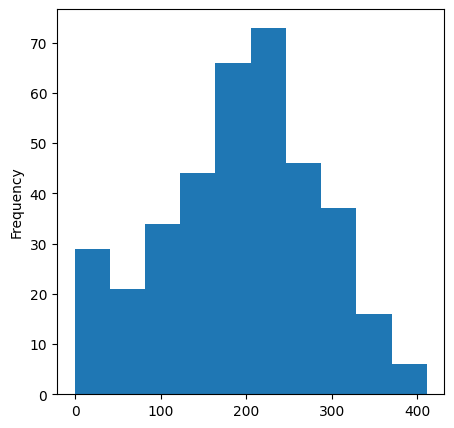

In [66]:
# - What am I doing? -
# Look at distribution of data using histogram. Play with bin size to see different views.

# Resize area of plot
plt.rcParams['figure.figsize'] = (5, 5)

# Plot on histogram
QuarterbackWeektoWeek2023['PASS_YDS'].plot(kind='hist', bins=10)

<Axes: ylabel='Density'>

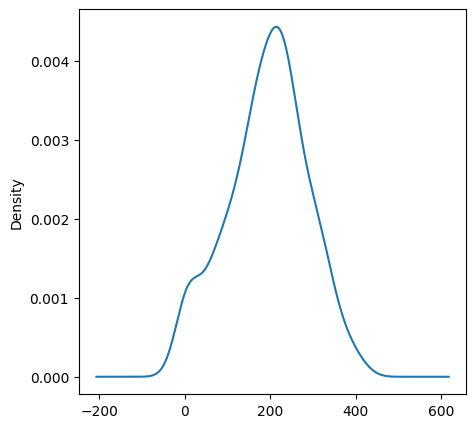

In [67]:
# - What am I doing? -
# Get density of data on ALL features

# Resize area of plot
plt.rcParams['figure.figsize'] = (5, 5)

# Plot on kernel density
QuarterbackWeektoWeek2023['PASS_YDS'].plot(kind='kde')

<Axes: xlabel='PASS_YDS', ylabel='ATT'>

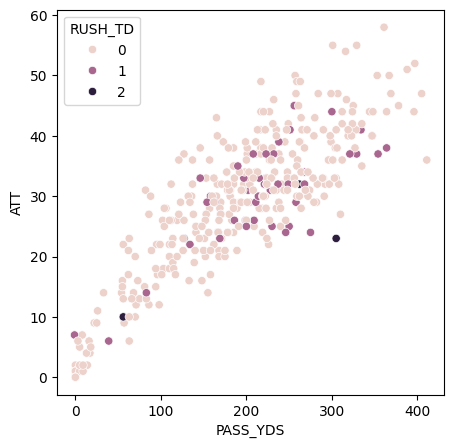

In [68]:
# - What am I doing? -
# Use seaborn to create with color
sns.scatterplot(data=QuarterbackWeektoWeek2023, x="PASS_YDS", y="ATT", hue="RUSH_TD")

In [69]:
# - What am I doing? -
# Look at value distributions

QuarterbackWeektoWeek2023['Opponent'].value_counts()#.head(10).plot()

Opponent
HOU    19
TEN    15
NO     14
MIA    13
LV     13
IND    13
DEN    13
CLE    13
SF     13
DET    12
GB     12
ATL    12
BAL    12
CHI    12
TB     12
DAL    12
KC     12
JAX    11
BUF    11
ARI    11
LAR    11
PIT    11
PHI    11
MIN    10
NYG    10
CAR    10
NE      9
SEA     9
NYJ     9
WSH     9
CIN     9
LAC     9
Name: count, dtype: int64

In [70]:
# - What am I doing? -
# Show how many unique values are in columns for runningbacks week to week.
RunningbackWeektoWeek2023.nunique()

Date               52
Opponent           32
CAR                31
RUSH_YDS          125
RUSH_AVG           94
RUSH_TD             3
RUSH_LNG           56
REC                12
TGTS               14
REC_YDS            82
REC_AVG           125
REC_TD              3
LNG_REC            54
FUM                 3
LST                 2
FF                  2
KB                  1
playerName         41
Game Result         2
Winner Score       41
Loser Score        32
OT?                 1
Home/Away           2
fantasy_points    291
REC%               24
dtype: int64

In [71]:
RunningbackWeektoWeek2023.columns

Index(['Date', 'Opponent', 'CAR', 'RUSH_YDS', 'RUSH_AVG', 'RUSH_TD',
       'RUSH_LNG', 'REC', 'TGTS', 'REC_YDS', 'REC_AVG', 'REC_TD', 'LNG_REC',
       'FUM', 'LST', 'FF', 'KB', 'playerName', 'Game Result', 'Winner Score',
       'Loser Score', 'OT?', 'Home/Away', 'fantasy_points', 'REC%'],
      dtype='object')

<Axes: ylabel='Frequency'>

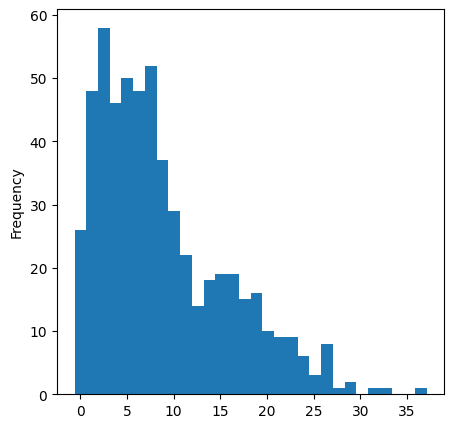

In [72]:
# - What am I doing? -
# Look at distribution of data using histogram. Play with bin size to see different views.

# Resize area of plot
plt.rcParams['figure.figsize'] = (5, 5)

# Use for overall season statistics
grouped_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date', 'Game Result', 'Opponent', 'OT?', 'Home/Away'])
#grouped_RunningbackWeektoWeek2023 = grouped_RunningbackWeektoWeek2023.groupby('playerName').sum()

# Plot on histogram. Use grouped_RunningbackWeektoWeek2023 (player overall season) or RunningbackWeektoWeek2023 (player per game)
grouped_RunningbackWeektoWeek2023['fantasy_points'].plot(kind='hist', bins=30)

<Axes: ylabel='Density'>

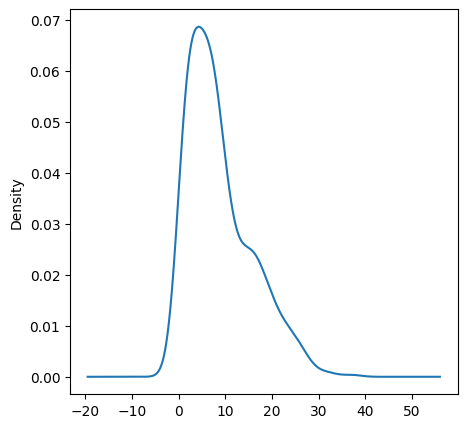

In [73]:
# - What am I doing? -
# Get density of data on ALL features

# Resize area of plot
plt.rcParams['figure.figsize'] = (5, 5)

# Use for overall season statistics
grouped_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date', 'Game Result', 'Opponent', 'OT?', 'Home/Away'])
#grouped_RunningbackWeektoWeek2023 = grouped_RunningbackWeektoWeek2023.groupby('playerName').sum()

# Plot on kernel density
grouped_RunningbackWeektoWeek2023['fantasy_points'].plot(kind='kde')

<Axes: xlabel='RUSH_AVG', ylabel='RUSH_TD'>

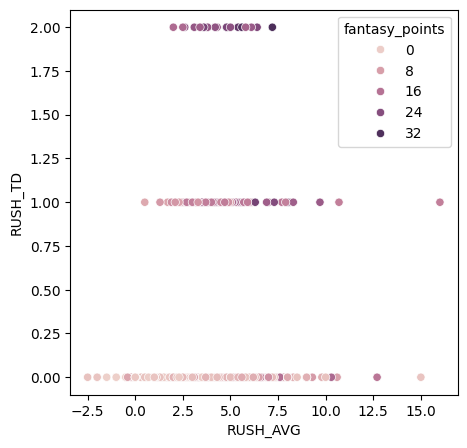

In [74]:
# - What am I doing? -
# Use seaborn to create with color
sns.scatterplot(data=RunningbackWeektoWeek2023, x="RUSH_AVG", y="RUSH_TD", hue="fantasy_points")

In [75]:
RunningbackWeektoWeek2023.columns

Index(['Date', 'Opponent', 'CAR', 'RUSH_YDS', 'RUSH_AVG', 'RUSH_TD',
       'RUSH_LNG', 'REC', 'TGTS', 'REC_YDS', 'REC_AVG', 'REC_TD', 'LNG_REC',
       'FUM', 'LST', 'FF', 'KB', 'playerName', 'Game Result', 'Winner Score',
       'Loser Score', 'OT?', 'Home/Away', 'fantasy_points', 'REC%'],
      dtype='object')

<Axes: xlabel='CAR'>

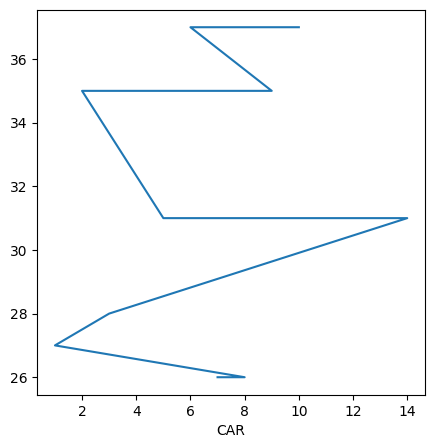

In [76]:
# - What am I doing? -
# Look at value distributions

RunningbackWeektoWeek2023['CAR'].value_counts().head(10).plot()

In [77]:
# - What am I doing? -
# Show how many unique values are in columns for receivers week to week.
ReceiverWeektoWeek2023.nunique()

Date               52
Opponent           32
REC                17
TGTS               19
REC_YDS           143
REC_AVG           183
REC_TD              4
LNG_REC            72
CAR                 5
RUSH_YDS           27
RUSH_AVG           31
LNG_RUSH           29
RUSH_TD             2
FUM                 3
LST                 3
FF                  2
KB                  1
playerName         53
Game Result         2
Winner Score       40
Loser Score        33
OT?                 1
Home/Away           2
fantasy_points    262
REC%               55
dtype: int64

<Axes: ylabel='Frequency'>

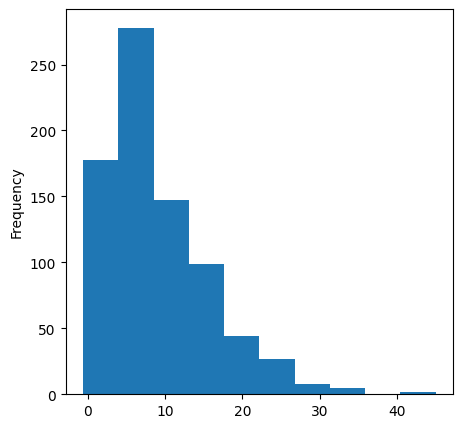

In [78]:
# - What am I doing? -
# Look at distribution of data using histogram. Play with bin size to see different views.
ReceiverWeektoWeek2023['fantasy_points'].plot(kind='hist', bins=10)

<Axes: ylabel='Density'>

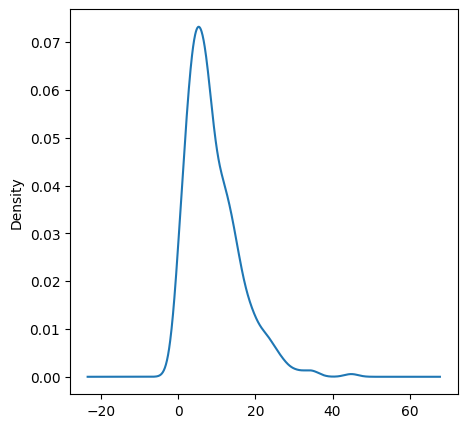

In [79]:
# - What am I doing? -
# Get density of data on ALL features

# Resize area of plot
plt.rcParams['figure.figsize'] = (5, 5)

# Plot on kernel density
ReceiverWeektoWeek2023['fantasy_points'].plot(kind='kde')

<Axes: xlabel='REC_TD', ylabel='fantasy_points'>

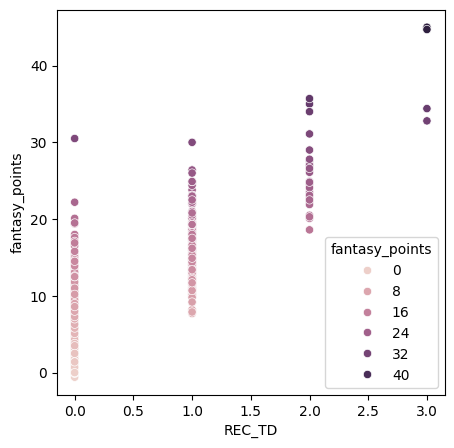

In [80]:
# - What am I doing? -
# Use seaborn to create with color
sns.scatterplot(data=ReceiverWeektoWeek2023, x="REC_TD", y="fantasy_points", hue="fantasy_points")

In [81]:
ReceiverWeektoWeek2023.columns

Index(['Date', 'Opponent', 'REC', 'TGTS', 'REC_YDS', 'REC_AVG', 'REC_TD',
       'LNG_REC', 'CAR', 'RUSH_YDS', 'RUSH_AVG', 'LNG_RUSH', 'RUSH_TD', 'FUM',
       'LST', 'FF', 'KB', 'playerName', 'Game Result', 'Winner Score',
       'Loser Score', 'OT?', 'Home/Away', 'fantasy_points', 'REC%'],
      dtype='object')

<Axes: xlabel='Game Result'>

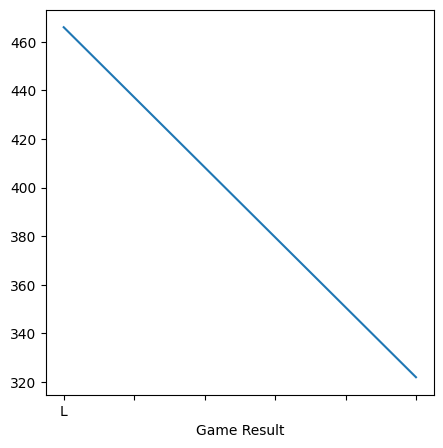

In [82]:
# - What am I doing? -
# Look at value distributions

ReceiverWeektoWeek2023['Game Result'].value_counts().head(10).plot()

## Sort values by column

In [83]:
# - What am I doing? -
# Look at most sacked passers for quarterback week to week.
QuarterbackWeektoWeek2023.sort_values(by='CMP', ascending=False).head(10)

Date Opponent  CMP  ATT  PASS_YDS   CMP%  PASS_AVG  PASS_TD  INT  \
83  2023-09-24      MIN   40   47       405  0.851       8.6        3    0   
27  2023-10-29      PHI   39   52       397  0.750       7.6        4    1   
20  2023-10-05      CHI   37   51       388  0.726       7.6        2    1   
177 2023-10-08      ARI   36   46       317  0.783       6.9        3    1   
166 2023-10-23       SF   35   45       378  0.778       8.4        2    1   
208 2023-09-10      PHI   35   54       316  0.648       5.9        3    1   
360 2023-09-24      SEA   34   58       361  0.586       6.2        2    0   
182 2023-11-06      LAC   33   49       263  0.674       5.4        0    0   
36  2023-10-19      JAX   33   55       301  0.600       5.5        1    1   
169 2023-09-10       TB   33   44       344  0.750       7.8        2    1   

     PASS_LNG  SACK    RTG    QBR  RUSH_CAR  RUSH_YDS  RUSH_AVG  RUSH_TD  \
83         35     1  123.8  959.0         2        11       5.5        0   
27         26     1  114.0  617.0         3        11       3.7        0   
20         41     5   99.1  542.0         4        19       4.8        0   
177        63     3  108.1  611.0         4         7       1.8        0   
166        60     0  107.2  797.0         2        -1      -0.5        0   
208        32     2   91.3  361.0         2        15       7.5        0   
360        47     3   88.4  498.0         2        11       5.5        0   
182        33     8   80.6  186.0         2         7       3.5        0   
36         21     1   73.4  345.0         3        14       4.7        0   
169        42     2  102.8  505.0         3         7       2.3        0   

     LNG_RUSH      playerName Game Result  Winner Score  Loser Score   OT?  \
83         12  Justin Herbert           W            28           24  None   
27          5      Sam Howell           L            38           31  None   
20         10      Sam Howell           L            40           20  None   
177        10      Joe Burrow           W            34           20  None   
166         0    Kirk Cousins           W            22           17  None   
208         8       Mac Jones           L            25           20  None   
360        10     Andy Dalton           L            37           27  None   
182         7     Zach Wilson           L            27            6  None   
36         10      Derek Carr           L            31           24  None   
169         4    Kirk Cousins           L            20           17  None   

    Home/Away  fantasy_points  
83       Away           29.30  
27       Home           31.98  
20       Home           24.42  
177      Away           24.38  
166      Home           22.02  
208      Home           25.14  
360      Away           23.54  
182      Home           11.22  
36       Home           16.44  
169      Home           21.46

In [84]:
# - What am I doing? -
# Look at most sacked passers for runningbacks week to week.
RunningbackWeektoWeek2023.sort_values(by='fantasy_points', ascending=False).head(10)

Date Opponent  CAR  RUSH_YDS  RUSH_AVG  RUSH_TD  RUSH_LNG  REC  \
89  2023-12-24      WSH   20        95       4.8        2        36   12   
185 2023-10-08      TEN   23       165       7.2        2        56    2   
423 2023-10-22       LV   16        89       5.6        2        14    3   
141 2023-09-24      CAR   18        97       5.4        2        36    3   
43  2024-01-07      SEA   27       150       5.6        1        29    4   
124 2023-11-19      WSH   14        83       5.9        0        36    4   
94  2023-10-08      DEN   22       177       8.0        1        72    3   
67  2023-12-04      JAX   19        68       3.6        2        18    6   
209 2024-01-06      HOU   30       188       6.3        1        49    2   
88  2024-01-07       NE   37       178       4.8        1        50    2   

     TGTS  REC_YDS  REC_AVG  REC_TD  LNG_REC  FUM  LST  FF  KB  \
89     16       96      8.0       0       15    0    0   0   0   
185     2       30     15.0       0       26    0    0   0   0   
423     5       31     10.3       1       17    0    0   0   0   
141     3       59     19.7       0       36    0    0   0   0   
43      4       54     13.5       0       34    0    0   0   0   
124     5       57     14.3       2       24    0    0   0   0   
94      3       17      5.7       0       12    0    0   0   0   
67      7       49      8.2       0       28    0    0   0   0   
209     2        8      4.0       0        6    0    0   0   0   
88      2       12      6.0       0       11    0    0   0   0   

             playerName Game Result  Winner Score  Loser Score   OT?  \
89          Breece Hall           W            30           28  None   
185           Zack Moss           W            23           16  None   
423      D'Onta Foreman           W            30           12  None   
141  Kenneth Walker III           W            37           27  None   
43         James Conner           L            21           20  None   
124      Saquon Barkley           W            31           19  None   
94          Breece Hall           W            31           21  None   
67            Joe Mixon           W            34           31    OT   
209     Jonathan Taylor           L            23           19  None   
88          Breece Hall           W            17            3  None   

    Home/Away  fantasy_points      REC%  
89       Home            37.1  0.750000  
185      Home            32.5  1.000000  
423      Home            31.5  0.600000  
141      Home            29.1  1.000000  
43       Home            28.4  1.000000  
124      Away            28.0  0.800000  
94       Away            26.9  1.000000  
67       Away            26.7  0.857143  
209      Home            26.6  1.000000  
88       Away            26.0  1.000000

In [85]:
# - What am I doing? -
# Look at most sacked passers for receivers week to week.
ReceiverWeektoWeek2023.sort_values(by='REC_TD', ascending=False).head(10)

Date Opponent  REC  TGTS  REC_YDS  REC_AVG  REC_TD  LNG_REC  CAR  \
261 2023-11-30      DAL    6     8      134     22.3       3       73    0   
61  2023-10-29      ATL    4     6      128     32.0       3       61    0   
163 2023-10-05      WSH    8    10      230     28.8       3       58    0   
200 2023-10-08      ARI   15    19      192     12.8       3       63    0   
227 2023-12-31      IND   13    21      126      9.7       2       24    0   
597 2023-11-05       TB    6    11      114     19.0       2       29    2   
778 2023-10-01      CLE    5     5       80     16.0       2       36    0   
773 2023-10-22      DET    4     6       63     15.8       2       22    0   
744 2023-10-01       SF    7     7       76     10.9       2       33    0   
361 2023-12-10      CLE   11    12       95      8.6       2       23    0   

     RUSH_YDS  RUSH_AVG  LNG_RUSH  RUSH_TD  FUM  LST  FF  KB       playerName  \
261         0       0.0         0        0    0    0   0   0       DK Metcalf   
61          0       0.0         0        0    0    0   0   0  DeAndre Hopkins   
163         0       0.0         0        0    0    0   0   0         DJ Moore   
200         0       0.0         0        0    0    0   0   0    Ja'Marr Chase   
227         0       0.0         0        0    0    0   0   0    Davante Adams   
597         2       1.0         2        0    0    0   0   0        Tank Dell   
778         0       0.0         0        0    0    0   0   0     Mark Andrews   
773         0       0.0         0        0    0    0   0   0     Mark Andrews   
744         0       0.0         0        0    0    0   0   0   Michael Wilson   
361         0       0.0         0        0    0    0   0   0      Evan Engram   

    Game Result  Winner Score  Loser Score   OT? Home/Away  fantasy_points  \
261           L            41           35  None      Away            34.4   
61            W            28           23  None      Home            32.8   
163           W            40           20  None      Away            45.0   
200           W            34           20  None      Away            44.7   
227           L            23           20  None      Away            31.1   
597           W            39           37  None      Home            26.6   
778           W            28            3  None      Away            22.5   
773           W            38            6  None      Home            20.3   
744           L            35           16  None      Away            23.1   
361           L            31           27  None      Away            27.0   

         REC%  
261  0.750000  
61   0.666667  
163  0.800000  
200  0.789474  
227  0.619048  
597  0.545455  
778  1.000000  
773  0.666667  
744  1.000000  
361  0.916667

## Correlation with heat maps

In [86]:
# - What am I doing? -
# Look at correlations for quarterbacks

# Remove text columns for correlation statistics.
Correlation_QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'playerName', 'OT?', 'Home/Away'])

# Looking at correlations between numeric values.
Correlation_QuarterbackWeektoWeek2023.corr()

CMP       ATT  PASS_YDS      CMP%  PASS_AVG   PASS_TD  \
CMP             1.000000  0.936825  0.889794  0.494684  0.465004  0.495598   
ATT             0.936825  1.000000  0.847347  0.290608  0.347359  0.404581   
PASS_YDS        0.889794  0.847347  1.000000  0.424120  0.709251  0.566996   
CMP%            0.494684  0.290608  0.424120  1.000000  0.639143  0.314875   
PASS_AVG        0.465004  0.347359  0.709251  0.639143  1.000000  0.458469   
PASS_TD         0.495598  0.404581  0.566996  0.314875  0.458469  1.000000   
INT             0.176349  0.260580  0.188698 -0.035102  0.049461  0.041916   
PASS_LNG        0.442230  0.451415  0.647646  0.267365  0.676127  0.388916   
SACK            0.218443  0.272201  0.159472  0.068651  0.055332 -0.043733   
RTG             0.476419  0.279566  0.551978  0.709107  0.738488  0.656664   
QBR             0.350214  0.210383  0.432909  0.434950  0.516685  0.462831   
RUSH_CAR        0.173929  0.188630  0.200245  0.095345  0.203845  0.127767   
RUSH_YDS        0.123974  0.148083  0.128826  0.060207  0.118714  0.065743   
RUSH_AVG        0.148910  0.159399  0.138194  0.075749  0.127649  0.045381   
RUSH_TD         0.011787  0.013766  0.097054  0.027372  0.169253 -0.042736   
LNG_RUSH        0.182839  0.190194  0.191365  0.106320  0.177498  0.089004   
Winner Score    0.048416  0.017592  0.113603  0.010923  0.090281  0.318696   
Loser Score     0.275614  0.229056  0.380961  0.091383  0.268437  0.429712   
fantasy_points  0.692711  0.622251  0.808146  0.391133  0.649063  0.783242   

                     INT  PASS_LNG      SACK       RTG       QBR  RUSH_CAR  \
CMP             0.176349  0.442230  0.218443  0.476419  0.350214  0.173929   
ATT             0.260580  0.451415  0.272201  0.279566  0.210383  0.188630   
PASS_YDS        0.188698  0.647646  0.159472  0.551978  0.432909  0.200245   
CMP%           -0.035102  0.267365  0.068651  0.709107  0.434950  0.095345   
PASS_AVG        0.049461  0.676127  0.055332  0.738488  0.516685  0.203845   
PASS_TD         0.041916  0.388916 -0.043733  0.656664  0.462831  0.127767   
INT             1.000000  0.165596  0.198602 -0.410330 -0.310672  0.016236   
PASS_LNG        0.165596  1.000000  0.084523  0.412164  0.297369  0.183158   
SACK            0.198602  0.084523  1.000000 -0.044031 -0.314199  0.152611   
RTG            -0.410330  0.412164 -0.044031  1.000000  0.653316  0.163637   
QBR            -0.310672  0.297369 -0.314199  0.653316  1.000000  0.175789   
RUSH_CAR        0.016236  0.183158  0.152611  0.163637  0.175789  1.000000   
RUSH_YDS        0.038560  0.171122  0.181130  0.082754  0.192930  0.759325   
RUSH_AVG        0.045152  0.178746  0.203678  0.084579  0.156454  0.222522   
RUSH_TD         0.036827  0.129026  0.002431  0.036586  0.177940  0.292449   
LNG_RUSH        0.006734  0.222974  0.172235  0.149853  0.229961  0.557519   
Winner Score    0.104422  0.083130 -0.052324  0.102061  0.103775 -0.058932   
Loser Score     0.010947  0.205284 -0.137358  0.280222  0.341865  0.100808   
fantasy_points  0.018983  0.570469  0.074041  0.678752  0.580808  0.426381   

                RUSH_YDS  RUSH_AVG   RUSH_TD  LNG_RUSH  Winner Score  \
CMP             0.123974  0.148910  0.011787  0.182839      0.048416   
ATT             0.148083  0.159399  0.013766  0.190194      0.017592   
PASS_YDS        0.128826  0.138194  0.097054  0.191365      0.113603   
CMP%            0.060207  0.075749  0.027372  0.106320      0.010923   
PASS_AVG        0.118714  0.127649  0.169253  0.177498      0.090281   
PASS_TD         0.065743  0.045381 -0.042736  0.089004      0.318696   
INT             0.038560  0.045152  0.036827  0.006734      0.104422   
PASS_LNG        0.171122  0.178746  0.129026  0.222974      0.083130   
SACK            0.181130  0.203678  0.002431  0.172235     -0.052324   
RTG             0.082754  0.084579  0.036586  0.149853      0.102061   
QBR             0.192930  0.156454  0.177940  0.229961      0.103775   
RUSH_CAR        0.759325  0.222522 

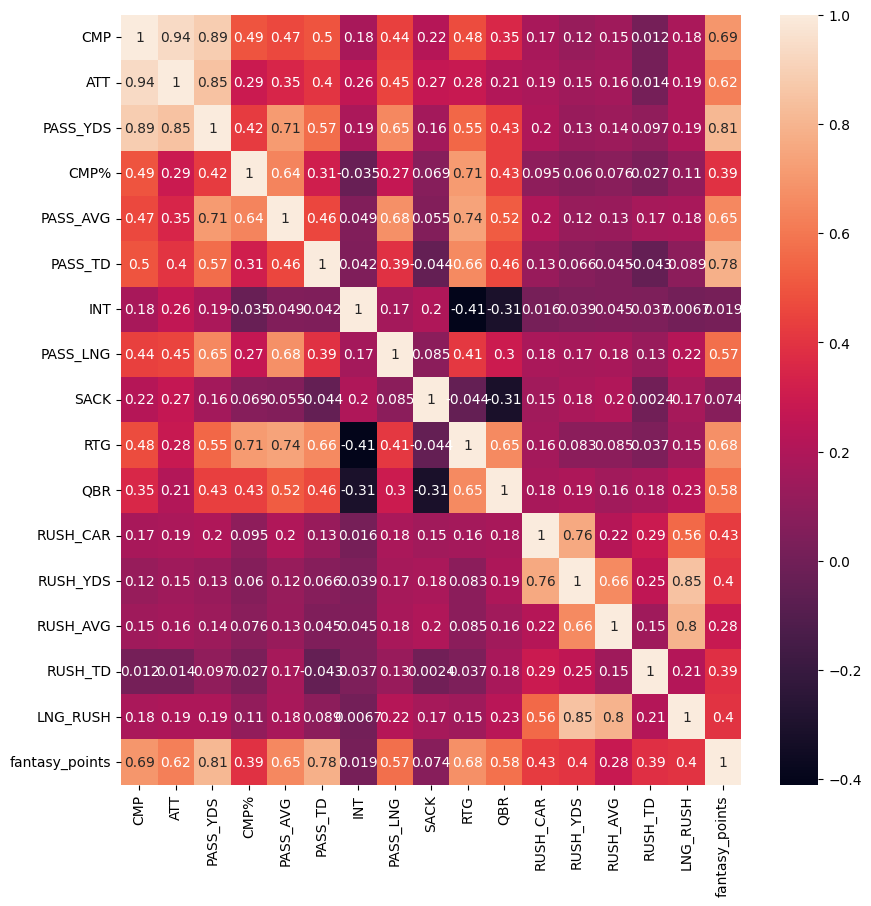

In [91]:
# - What am I doing? -
# Projecting correlations for quarterbacks individual games in a heatmap

# Remove text columns for correlation statistics.
Correlation_QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'playerName', 'OT?', 'Home/Away',
                                                                               'Winner Score', 'Loser Score'])

# Visualize correlations for quarterbacks week to week.
# Good step to understand what your focus should be on during data analysis.
sns.heatmap(Correlation_QuarterbackWeektoWeek2023.corr(), annot=True)

plt.rcParams['figure.figsize'] = (11, 11)

plt.show()

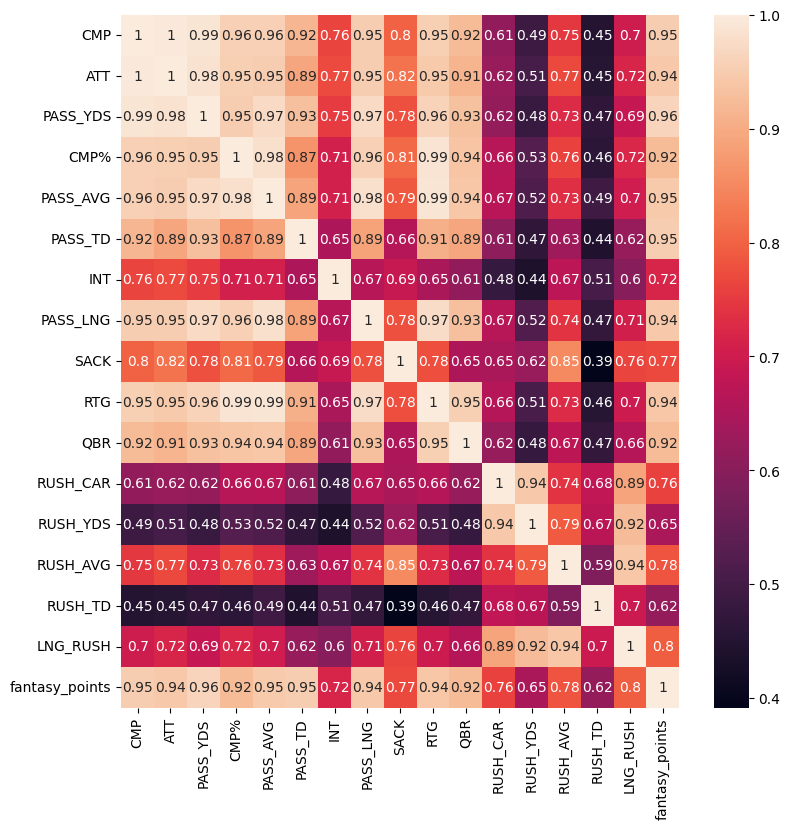

In [88]:
# - What am I doing? -
# Projecting correlations for quarterback's overall season in a heatmap

# Remove text columns for correlation statistics.
Correlation_QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'OT?', 'Home/Away',
                                                                               'Winner Score', 'Loser Score'])

# Visualize correlations for quarterbacks week to week.
# Good step to understand what your focus should be on during data analysis.
sns.heatmap(Correlation_QuarterbackWeektoWeek2023.groupby('playerName').sum().corr(), annot=True)

plt.rcParams['figure.figsize'] = (9, 9)

plt.show()

In [89]:
# - What am I doing? -
# Look at correlations for runningbacks

# Remove text columns for correlation statistics.
Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'playerName', 'OT?', 'Home/Away', 'FF', 'KB'])

# Looking at correlations between numeric values.
Correlation_RunningbackWeektoWeek2023.corr()

CAR  RUSH_YDS  RUSH_AVG   RUSH_TD  RUSH_LNG       REC  \
CAR             1.000000  0.837828  0.099796  0.403338  0.458356  0.194335   
RUSH_YDS        0.837828  1.000000  0.494412  0.434576  0.760996  0.118152   
RUSH_AVG        0.099796  0.494412  1.000000  0.141665  0.659074 -0.002967   
RUSH_TD         0.403338  0.434576  0.141665  1.000000  0.351141  0.043012   
RUSH_LNG        0.458356  0.760996  0.659074  0.351141  1.000000  0.052751   
REC             0.194335  0.118152 -0.002967  0.043012  0.052751  1.000000   
TGTS            0.228042  0.144737  0.008425  0.071426  0.086666  0.938393   
REC_YDS         0.183389  0.120353  0.003041  0.109458  0.063536  0.749149   
REC_AVG         0.153715  0.119342  0.017681  0.116886  0.065737  0.259344   
REC_TD          0.146278  0.116429  0.027689 -0.039914  0.055567  0.233602   
LNG_REC         0.200625  0.134357 -0.005708  0.093731  0.056464  0.508345   
FUM             0.044727  0.037602  0.038483 -0.050571  0.027985  0.066863   
LST            -0.003580 -0.007045  0.021839 -0.049168 -0.015139  0.003622   
Winner Score   -0.100629 -0.021503  0.103364  0.116050  0.063234  0.000838   
Loser Score     0.008094  0.057164  0.045150  0.203221  0.061143  0.043627   
fantasy_points  0.693951  0.749526  0.304032  0.690740  0.559266  0.482842   
REC%           -0.080432 -0.066273 -0.031533 -0.057381 -0.081817  0.345699   

                    TGTS   REC_YDS   REC_AVG    REC_TD   LNG_REC       FUM  \
CAR             0.228042  0.183389  0.153715  0.146278  0.200625  0.044727   
RUSH_YDS        0.144737  0.120353  0.119342  0.116429  0.134357  0.037602   
RUSH_AVG        0.008425  0.003041  0.017681  0.027689 -0.005708  0.038483   
RUSH_TD         0.071426  0.109458  0.116886 -0.039914  0.093731 -0.050571   
RUSH_LNG        0.086666  0.063536  0.065737  0.055567  0.056464  0.027985   
REC             0.938393  0.749149  0.259344  0.233602  0.508345  0.066863   
TGTS            1.000000  0.712076  0.250001  0.209022  0.479563  0.073586   
REC_YDS         0.712076  1.000000  0.669349  0.354273  0.850923  0.051402   
REC_AVG         0.250001  0.669349  1.000000  0.276981  0.840505  0.016873   
REC_TD          0.209022  0.354273  0.276981  1.000000  0.353427  0.006368   
LNG_REC         0.479563  0.850923  0.840505  0.353427  1.000000  0.034049   
FUM             0.073586  0.051402  0.016873  0.006368  0.034049  1.000000   
LST             0.019655 -0.016274 -0.028938  0.054378 -0.011463  0.761585   
Winner Score    0.018420  0.035988  0.020133  0.026067  0.028009 -0.057968   
Loser Score     0.046149  0.118287  0.123204  0.050762  0.110602 -0.037001   
fantasy_points  0.482293  0.577011  0.399961  0.404448  0.499920 -0.027877   
REC%            0.025981  0.236342  0.180205  0.072712  0.232257  0.012466   

                     LST  Winner Score  Loser Score  fantasy_points      REC%  
CAR            -0.003580     -0.100629     0.008094        0.693951 -0.080432  
RUSH_YDS       -0.007045     -0.021503     0.057164        0.749526 -0.066273  
RUSH_AVG        0.021839      0.103364     0.045150        0.304032 -0.031533  
RUSH_TD        -0.049168      0.116050     0.203221        0.690740 -0.057381  
RUSH_LNG       -0.015139      0.063234     0.061143        0.559266 -0.081817  
REC             0.003622      0.000838     0.043627        0.482842  0.345699  
TGTS            0.019655      0.018420     0.046149        0.482293  0.025981  
REC_YDS        -0.016274      0.035988     0.118287        0.577011  0.236342  
REC_AVG        -0.028938      0.020133     0.123204        0.399961  0.180205  
REC_TD          0.054378      0.026067     0.050762        0.404448  0.072712  
LNG_REC        -0.011463      0.028009     0.110602        0.499920  0.232257  
FUM             0.761585     -0.057968    -0.037001       -0.027877  0.012466  
LST             1.000000      0.004848    -0.028356       -0.079743 -0.017307  
Winner Score    0.004848      1.000000     0.406402        0.058630 -0.056932  
Loser Score

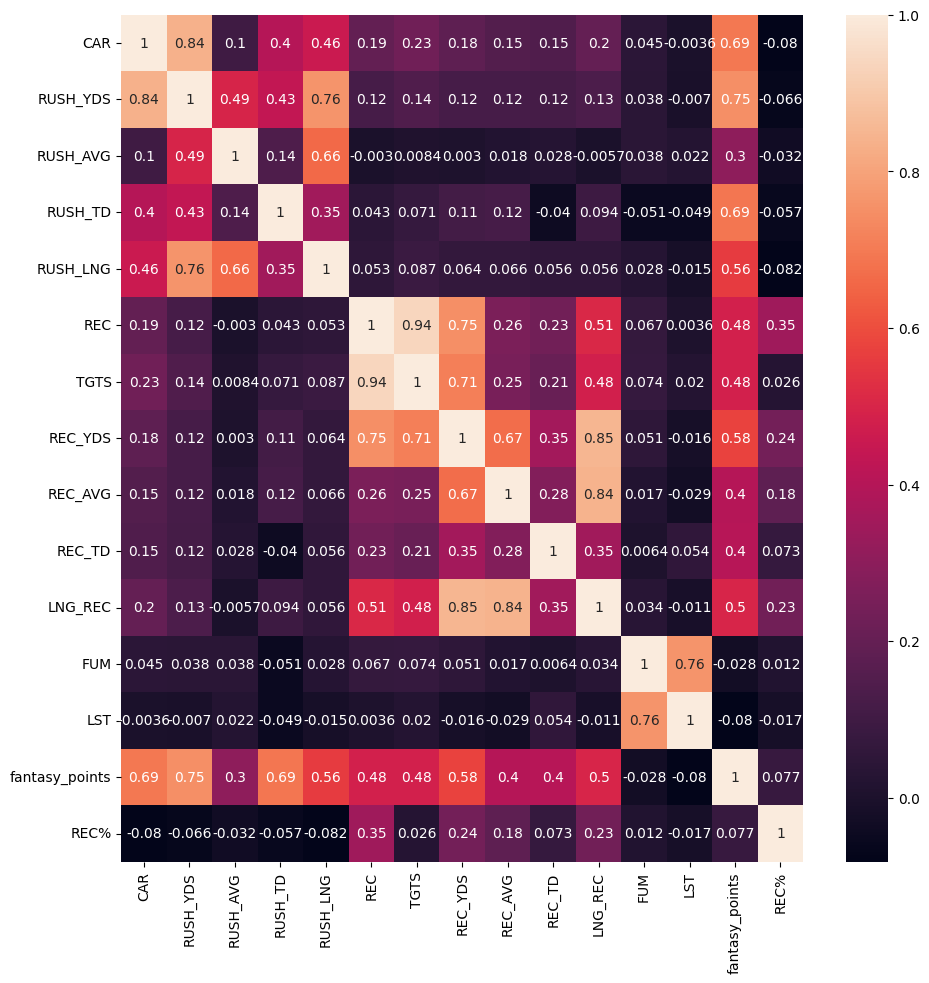

In [92]:
# - What am I doing? -
# Visualize correlations for runningbacks week to week.

# Good step to understand what your focus should be on during data analysis.
Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'playerName', 'OT?', 'Home/Away', 'FF', 'KB',
                                                                               'Winner Score', 'Loser Score'])


# Get subset of data to include the top rushers by rushing yards, rushing TD, etc.
#Correlation_RunningbackWeektoWeek2023 = Correlation_RunningbackWeektoWeek2023.sort_values(by='fantasy_points', ascending=False).head(10)

sns.heatmap(Correlation_RunningbackWeektoWeek2023.corr(), annot=True)

plt.rcParams['figure.figsize'] = (11, 11)

plt.show()

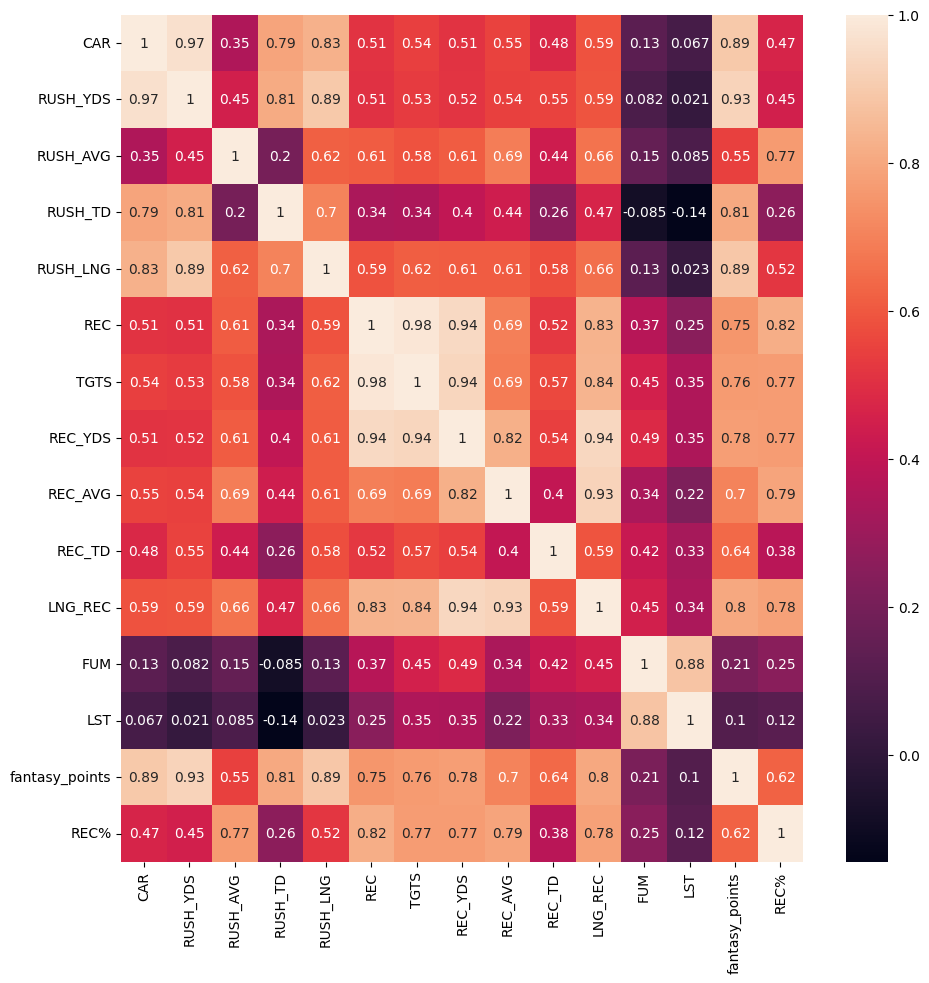

In [93]:
# - What am I doing? -
# Visualize correlations for runningbacks overall season.


# Remove text columns for correlation statistics.
Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB',
                                                                               'Winner Score', 'Loser Score'])

# Get subset of data to include the top rushers by rushing yards, rushing TD, etc.
#Correlation_RunningbackWeektoWeek2023 = Correlation_RunningbackWeektoWeek2023.sort_values(by='fantasy_points', ascending=True).head(40)

# Good step to understand what your focus should be on during data analysis.
sns.heatmap(Correlation_RunningbackWeektoWeek2023.groupby('playerName').sum().corr(), annot=True)

plt.rcParams['figure.figsize'] = (12, 12)

plt.show()

In [94]:
# - What am I doing? -
# Look at correlations for receivers

# Remove text columns for correlation statistics.
Correlation_ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.drop(columns=['Date', 'Opponent', 'Game Result', 'playerName', 'OT?', 'Home/Away',
                                                                         'Winner Score', 'Loser Score', 'KB'])

# Looking at correlations between numeric values.
Correlation_ReceiverWeektoWeek2023.corr()

REC      TGTS   REC_YDS   REC_AVG    REC_TD   LNG_REC  \
REC             1.000000  0.866903  0.784502  0.004469  0.314171  0.338894   
TGTS            0.866903  1.000000  0.696029  0.010651  0.272196  0.302142   
REC_YDS         0.784502  0.696029  1.000000  0.495292  0.445237  0.736050   
REC_AVG         0.004469  0.010651  0.495292  1.000000  0.266169  0.783275   
REC_TD          0.314171  0.272196  0.445237  0.266169  1.000000  0.367087   
LNG_REC         0.338894  0.302142  0.736050  0.783275  0.367087  1.000000   
CAR            -0.041480 -0.026662 -0.064064 -0.031756  0.006835 -0.046897   
RUSH_YDS       -0.056628 -0.052184 -0.077361 -0.034855 -0.030645 -0.030575   
RUSH_AVG       -0.050093 -0.043425 -0.067214 -0.022131 -0.025861 -0.029502   
LNG_RUSH       -0.045511 -0.040205 -0.072427 -0.037777 -0.030248 -0.032477   
RUSH_TD         0.012202  0.015068 -0.011557 -0.005583  0.007671  0.006734   
FUM             0.177678  0.133079  0.108539 -0.025902  0.008801  0.016263   
LST             0.134290  0.109960  0.086453 -0.011352  0.001911  0.035239   
FF              0.009601  0.015034 -0.000583 -0.009052 -0.018648  0.005333   
fantasy_points  0.749745  0.658872  0.886614  0.391577  0.779243  0.630748   
REC%            0.438887  0.026230  0.338744  0.125538  0.137437  0.236807   

                     CAR  RUSH_YDS  RUSH_AVG  LNG_RUSH   RUSH_TD       FUM  \
REC            -0.041480 -0.056628 -0.050093 -0.045511  0.012202  0.177678   
TGTS           -0.026662 -0.052184 -0.043425 -0.040205  0.015068  0.133079   
REC_YDS        -0.064064 -0.077361 -0.067214 -0.072427 -0.011557  0.108539   
REC_AVG        -0.031756 -0.034855 -0.022131 -0.037777 -0.005583 -0.025902   
REC_TD          0.006835 -0.030645 -0.025861 -0.030248  0.007671  0.008801   
LNG_REC        -0.046897 -0.030575 -0.029502 -0.032477  0.006734  0.016263   
CAR             1.000000  0.614885  0.481053  0.604054  0.270431  0.015311   
RUSH_YDS        0.614885  1.000000  0.883218  0.982803  0.416265 -0.010205   
RUSH_AVG        0.481053  0.883218  1.000000  0.919641  0.387512 -0.013213   
LNG_RUSH        0.604054  0.982803  0.919641  1.000000  0.431767 -0.011905   
RUSH_TD         0.270431  0.416265  0.387512  0.431767  1.000000 -0.018989   
FUM             0.015311 -0.010205 -0.013213 -0.011905 -0.018989  1.000000   
LST            -0.021161 -0.009203 -0.013823 -0.017063 -0.014898  0.770210   
FF             -0.010461 -0.005913 -0.006037 -0.006101 -0.003122 -0.007728   
fantasy_points  0.020541  0.026392  0.026303  0.031886  0.102945  0.052887   
REC%           -0.035857 -0.017448 -0.008542 -0.010758 -0.006185  0.089552   

                     LST        FF  fantasy_points      REC%  
REC             0.134290  0.009601        0.749745  0.438887  
TGTS            0.109960  0.015034        0.658872  0.026230  
REC_YDS         0.086453 -0.000583        0.886614  0.338744  
REC_AVG        -0.011352 -0.009052        0.391577  0.125538  
REC_TD          0.001911 -0.018648        0.779243  0.137437  
LNG_REC         0.035239  0.005333        0.630748  0.236807  
CAR            -0.021161 -0.010461        0.020541 -0.035857  
RUSH_YDS       -0.009203 -0.005913        0.026392 -0.017448  
RUSH_AVG       -0.013823 -0.006037        0.026303 -0.008542  
LNG_RUSH       -0.017063 -0.006101        0.031886 -0.010758  
RUSH_TD        -0.014898 -0.003122        0.102945 -0.006185  
FUM             0.770210 -0.007728        0.052887  0.089552  
LST             1.000000 -0.006063        0.017785  0.065602  
FF             -0.006063  1.000000       -0.007795 -0.004049  
fantasy_points  0.017785 -0.007795        1.000000  0.325078  
REC%            0.065602 -0.004049        0.325078  1.000000

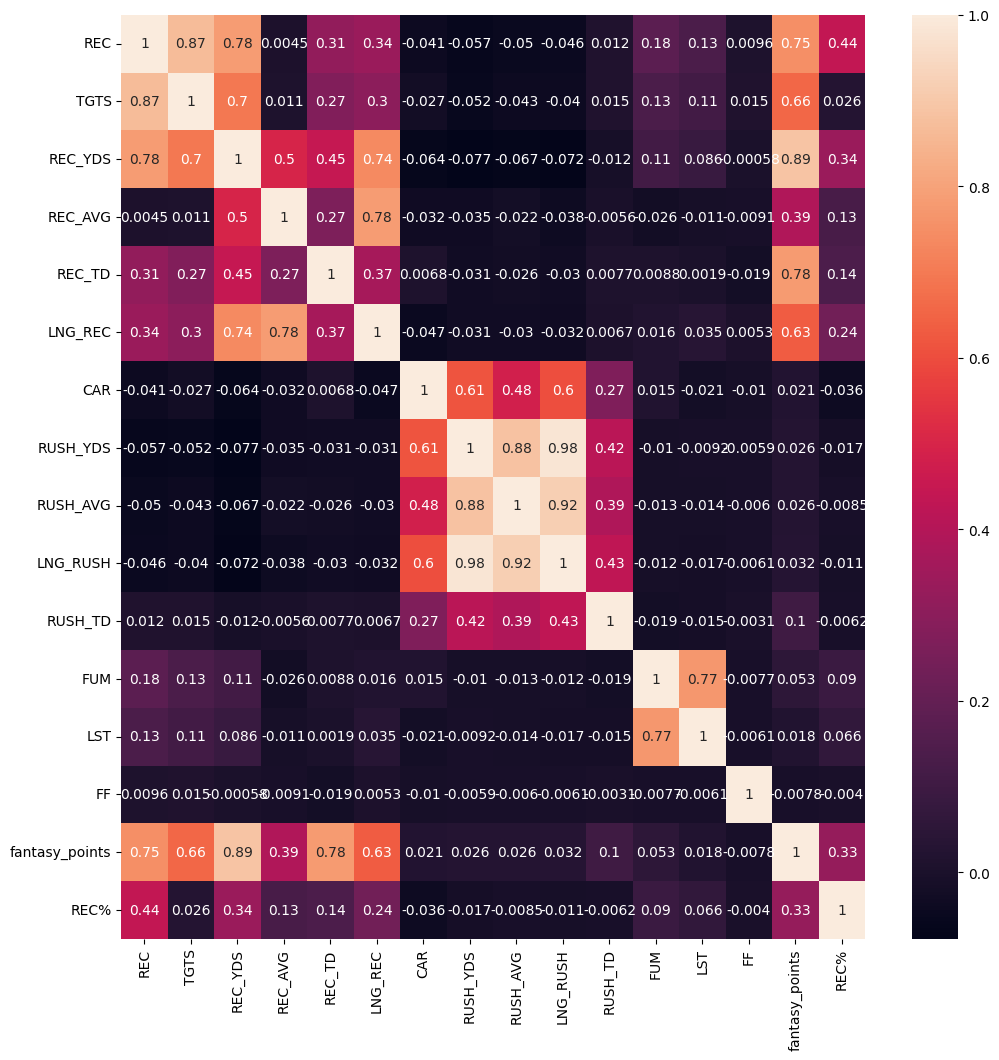

In [95]:
# - What am I doing? -
# Visualize correlations for receivers week to week.

# Good step to understand what your focus should be on during data analysis.
sns.heatmap(Correlation_ReceiverWeektoWeek2023.corr(), annot=True)

plt.rcParams['figure.figsize'] = (12, 15)

plt.show()

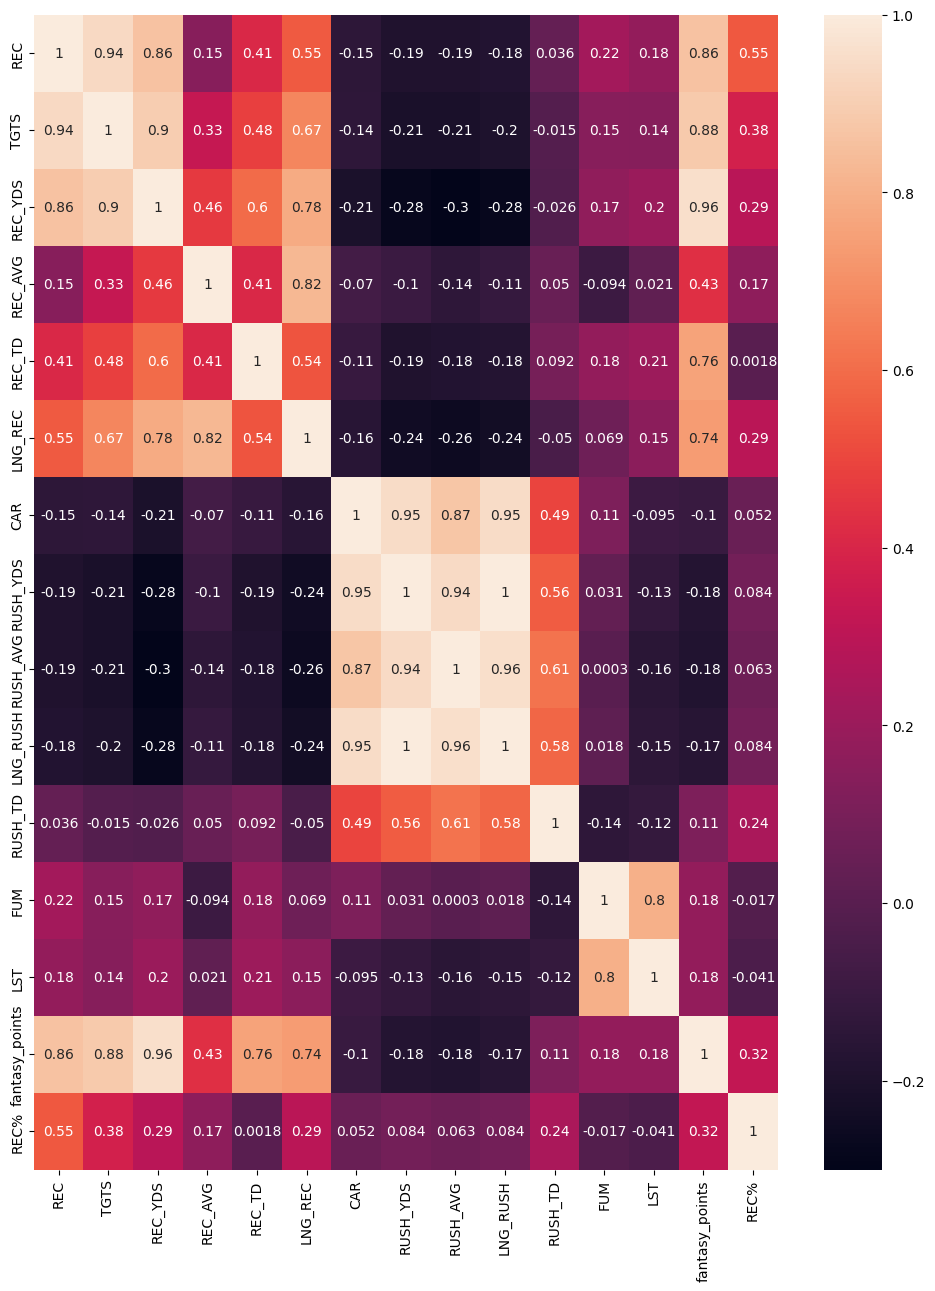

In [96]:
# - What am I doing? -
# Visualize correlations for receivers overall season.

# Remove text columns for correlation statistics.
Correlation_ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB',
                                                                         'Winner Score', 'Loser Score'])
# Good step to understand what your focus should be on during data analysis.
sns.heatmap(Correlation_ReceiverWeektoWeek2023.groupby('playerName').sum().corr(), annot=True)

plt.rcParams['figure.figsize'] = (12, 12)

plt.show()

## Group by

In [97]:
# - What am I doing? -
# Use Groupby function for quarterbacks to summarize data and explore.

# Remove text columns for group by statistics.
Groupby_QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop(columns=['Date', 'Game Result', 'Opponent', 'OT?', 'Home/Away'])

# Group columns to look at Quarterback WeektoWeek 2023 dataset closer.
Groupby_QuarterbackWeektoWeek2023.groupby('playerName').mean().sort_values(by='PASS_YDS', ascending=False).head(20)

CMP        ATT    PASS_YDS      CMP%  PASS_AVG  \
playerName                                                              
Kirk Cousins     27.000000  38.875000  291.375000  0.692625  7.462500   
Nick Mullens     20.000000  29.600000  261.200000  0.672800  8.220000   
Trevor Lawrence  23.000000  35.500000  249.571429  0.655000  7.142857   
Jarrett Stidham  20.000000  33.000000  248.000000  0.606500  7.500000   
Geno Smith       21.533333  33.266667  241.600000  0.645133  7.140000   
Justin Herbert   22.846154  35.076923  241.076923  0.635385  6.776923   
Sam Howell       22.823529  36.000000  232.117647  0.613706  6.194118   
Joe Burrow       24.400000  36.500000  230.900000  0.668000  6.230000   
Derek Carr       22.058824  32.235294  228.117647  0.696824  7.194118   
Easton Stick     22.200000  34.800000  225.800000  0.637200  6.660000   
Kyler Murray     22.000000  33.500000  224.875000  0.658125  6.825000   
Jake Browning    19.000000  27.000000  215.111111  0.622333  6.988889   
Gardner Minshew  19.133333  30.800000  207.400000  0.596133  6.766667   
Russell Wilson   19.800000  29.800000  204.666667  0.660800  6.786667   
Aidan O'Connell  19.363636  31.181818  201.636364  0.623182  6.363636   
Will Levis       16.555556  28.333333  200.888889  0.576778  6.855556   
Justin Fields    17.461538  28.461538  197.076923  0.612615  6.992308   
Mac Jones        20.900000  32.500000  195.000000  0.635200  6.040000   
Ryan Tannehill   17.625000  26.750000  192.500000  0.670875  7.300000   
Joshua Dobbs     20.153846  32.076923  189.538462  0.630385  5.907692   

                  PASS_TD       INT   PASS_LNG      SACK         RTG  \
playerName                                                             
Kirk Cousins     2.250000  0.625000  40.750000  2.125000  102.837500   
Nick Mullens     1.400000  1.600000  34.600000  2.400000   89.260000   
Trevor Lawrence  1.357143  1.000000  39.928571  2.000000   87.707143   
Jarrett Stidham  1.000000  0.500000  50.500000  3.500000   87.900000   
Geno Smith       1.333333  0.600000  39.866667  2.066667   91.473333   
Justin Herbert   1.538462  0.538462  36.846154  2.230769   88.553846   
Sam Howell       1.235294  1.235294  31.882353  3.823529   75.205882   
Joe Burrow       1.500000  0.600000  34.800000  2.400000   90.910000   
Derek Carr       1.470588  0.470588  36.529412  1.823529  100.241176   
Easton Stick     0.600000  0.200000  42.200000  2.800000   86.540000   
Kyler Murray     1.250000  0.625000  35.500000  2.250000   90.125000   
Jake Browning    1.333333  0.777778  41.222222  2.666667   92.600000   
Gardner Minshew  1.000000  0.533333  35.866667  2.266667   87.046667   
Russell Wilson   1.733333  0.533333  37.933333  3.000000   96.866667   
Aidan O'Connell  1.090909  0.636364  33.727273  2.181818   83.163636   
Will Levis       0.888889  0.444444  36.222222  3.111111   84.344444   
Justin Fields    1.230769  0.692308  36.538462  3.384615   83.761538   
Mac Jones        1.000000  1.100000  30.700000  1.700000   71.650000   
Ryan Tannehill   0.500000  0.750000  38.250000  3.750000   83.900000   
Joshua Dobbs     1.000000  0.769231  30.461538  2.307692   80.853846   

                        QBR  RUSH_CAR   RUSH_YDS  RUSH_AVG   RUSH_TD  \
playerName                                                             
Kirk Cousins     606.625000  1.750000   3.125000  1.937500  0.000000   
Nick Mullens     456.600000  2.000000   5.000000  2.540000  0.000000   
Trevor Lawrence  527.642857  3.928571  19.000000  4.835714  0.285714   
Jarrett Stidham  309.500000  4.500000   4.000000  0.850000  0.000000   
Geno Smith       554.733333  2.466667  10.333333  4.100000  0.066667   
Justin Herbert   589.923077  4.000000  17.538462  3.623077  0.230769   
Sam Howell       395.705882  2.823529  15.470588  5.700000  0.294118   
Joe Burrow       493.500000  3.100000   8.800000  2.640000  0.000000   
Derek Carr       554.352941  1.882353   2.352941  1.582353  0.000000   
Easton Stick     453.400000  5.400000  

In [98]:
# - What am I doing? -
# Use Groupby function for runningbacks to summarize data and explore.


# Remove text columns for group by statistics.
Groupby_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date', 'Opponent', 'Game Result', 'OT?', 'Home/Away'])

# Group columns to look at Passing Leaders for 2023 dataset closer.
Groupby_RunningbackWeektoWeek2023.groupby('playerName').mean().sort_values(by=['RUSH_YDS'], ascending=False).head(10)

CAR   RUSH_YDS  RUSH_AVG   RUSH_TD   RUSH_LNG  \
playerName                                                                
James Conner        16.000000  80.000000  5.115385  0.538462  21.923077   
Jonathan Taylor     16.222222  74.666667  4.388889  0.666667  20.333333   
Saquon Barkley      17.642857  68.714286  3.921429  0.428571  20.714286   
Derrick Henry       16.750000  66.875000  3.806250  0.687500  18.062500   
Josh Jacobs         17.923077  61.923077  3.246154  0.461538  17.230769   
Zack Moss           14.000000  60.923077  4.315385  0.384615  18.384615   
Joe Mixon           15.117647  60.823529  4.052941  0.529412  15.294118   
Kenneth Walker III  14.600000  60.333333  4.226667  0.533333  20.000000   
Breece Hall         13.117647  58.470588  4.294118  0.294118  24.117647   
Travis Etienne Jr.  14.733333  54.466667  3.633333  0.600000  17.600000   

                         REC      TGTS    REC_YDS   REC_AVG    REC_TD  \
playerName                                                              
James Conner        2.076923  2.538462  12.692308  3.792308  0.153846   
Jonathan Taylor     2.000000  2.444444  16.333333  6.511111  0.111111   
Saquon Barkley      2.928571  4.285714  20.000000  6.885714  0.285714   
Derrick Henry       1.625000  2.125000  12.375000  7.056250  0.000000   
Josh Jacobs         2.846154  4.153846  22.769231  7.584615  0.000000   
Zack Moss           2.076923  2.846154  14.769231  5.753846  0.153846   
Joe Mixon           3.058824  3.764706  22.117647  7.341176  0.176471   
Kenneth Walker III  1.933333  2.466667  17.266667  9.320000  0.066667   
Breece Hall         4.470588  5.588235  34.764706  7.905882  0.235294   
Travis Etienne Jr.  3.400000  4.333333  27.400000  7.926667  0.066667   

                      LNG_REC       FUM       LST   FF   KB  Winner Score  \
playerName                                                                  
James Conner         8.000000  0.000000  0.000000  0.0  0.0     29.461538   
Jonathan Taylor     11.333333  0.111111  0.000000  0.0  0.0     29.555556   
Saquon Barkley      12.357143  0.142857  0.142857  0.0  0.0     26.142857   
Derrick Henry       10.062500  0.000000  0.000000  0.0  0.0     24.437500   
Josh Jacobs         10.692308  0.230769  0.076923  0.0  0.0     22.769231   
Zack Moss            9.538462  0.000000  0.000000  0.0  0.0     30.076923   
Joe Mixon           15.000000  0.000000  0.000000  0.0  0.0     27.529412   
Kenneth Walker III  13.266667  0.066667  0.000000  0.0  0.0     26.066667   
Breece Hall         16.470588  0.117647  0.000000  0.0  0.0     24.705882   
Travis Etienne Jr.  14.600000  0.000000  0.000000  0.0  0.0     29.133333   

                    Loser Score  fantasy_points      REC%  
playerName                                                 
James Conner          19.615385       14.461538  0.724242  
Jonathan Taylor       20.333333       14.766667  0.760417  
Saquon Barkley        13.642857       14.335714  0.694558  
Derrick Henry         15.062500       12.862500  0.726190  
Josh Jacobs           12.692308       12.507692  0.720328  
Zack Moss             20.769231       11.838462  0.714286  
Joe Mixon             16.588235       14.058824  0.809244  
Kenneth Walker III    17.000000       12.326667  0.769048  
Breece Hall           11.941176       14.735294  0.759804  
Travis Etienne Jr.    15.733333       13.886667  0.815556

In [99]:
# - What am I doing? -
# Use Groupby function for receivers to summarize data and explore.


# Remove text columns for group by statistics.
Groupby_ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.drop(columns=['Date',  'Opponent', 'Game Result', 'OT?', 'Home/Away'])

# Group columns to look at receiver WeektoWeek 2023 dataset closer.
Groupby_ReceiverWeektoWeek2023.groupby('playerName').sum().sort_values(by='REC_YDS', ascending=False)

REC  TGTS  REC_YDS  REC_AVG  REC_TD  LNG_REC  CAR  \
playerName                                                               
A.J. Brown           106   158     1456    218.8       7      451    0   
DJ Moore              96   136     1364    233.9       8      466    4   
Keenan Allen         108   150     1243    151.3       7      358    2   
Ja'Marr Chase        100   145     1216    191.4       7      486    3   
Davante Adams        103   175     1144    184.7       8      384    0   
Chris Olave           87   138     1123    193.9       5      379    0   
DK Metcalf            66   119     1114    291.5       8      520    0   
Justin Jefferson      68   100     1074    152.8       5      290    1   
Michael Pittman Jr.  101   144     1068    189.3       4      417    0   
Garrett Wilson        95   168     1042    214.5       3      449    4   
DeAndre Hopkins       74   132     1037    225.8       7      433    2   
Adam Thielen         103   137     1014    153.0       4      302    1   
Terry McLaurin        79   132     1002    206.1       4      418    0   
T.J. Hockenson        95   127      960    158.1       5      329    0   
Jordan Addison        70   108      911    203.8      10      434    1   
Tyler Lockett         79   122      894    201.7       5      307    0   
Drake London          66   103      877    178.3       1      327    0   
Evan Engram          103   127      876    124.8       4      294    0   
Calvin Ridley         67   126      856    180.8       7      356    7   
Trey McBride          81   106      825    164.4       3      314    0   
Jakobi Meyers         71   106      807    206.2       8      328    4   
Courtland Sutton      59    90      772    212.1      10      374    0   
Darius Slayton        50    79      770    245.7       4      440    0   
Jerry Jeudy           54    87      758    230.1       2      414    0   
Josh Downs            66    95      731    188.4       2      343    0   
Cole Kmet             73    90      719    151.5       6      305    3   
Rashid Shaheed        46    75      719    230.4       5      388    7   
Tank Dell             47    75      709    147.8       7      261   11   
Tyler Boyd            67    98      667    177.2       2      331    2   
Tee Higgins           42    76      656    179.0       5      288    0   
Gabe Davis            39    73      646    197.8       6      301    1   
Kyle Pitts            51    86      646    202.2       3      330    1   
Jaxon Smith-Njigba    63    93      628    174.3       4      322    0   
Christian Kirk        43    65      625    156.9       3      324    0   
Tyler Conklin         61    87      621    154.8       0      287    1   
Curtis Samuel         62    91      613    162.6       4      309    7   
Joshua Palmer         38    61      581    145.1       2      296    1   
Marquise Brown        51   101      574    147.5       4      265    2   
Michael Wilson        38    58      565    179.9       3      279    0   
Darren Waller         52    74      552    121.0       1      226    0   
K.J. Osborn           48    75      540    174.3       3      297    0   
Wan'Dale Robinson     60    78      525    127.7       1      218    9   
DJ Chark Jr.          35    66      525    207.5       5      314    0   
Jahan Dotson          49    83      518    147.6       4      220    0   
Chigoziem Okonkwo     52    73      510    150.5       1      256    2   
Logan Thomas          55    78      496    131.0       4      230    1   
Alec Pierce           31    64      493    253.1       2      324    0   
Jonnu Smith           44    64      487    142.4       3      264    1   
DeMario Douglas       43    70      477    161.3       0      267    8   
Mark Andrews          41    55      475    112.8       6      193    0   
Michael Thomas        39    64      448    107.0       1      181    0   
Rondale Moore         40    62      352    168.3       1      230   28   
Tanner Hudson         39 

## String Contains

In [100]:
# - What am I doing? -
# Search for specific strings in data for quarterbacks.

# Look at rows that contain specified string in column.
QuarterbackWeektoWeek2023[QuarterbackWeektoWeek2023['playerName'].str.contains('Allen')]

Empty DataFrame
Columns: [Date, Opponent, CMP, ATT, PASS_YDS, CMP%, PASS_AVG, PASS_TD, INT, PASS_LNG, SACK, RTG, QBR, RUSH_CAR, RUSH_YDS, RUSH_AVG, RUSH_TD, LNG_RUSH, playerName, Game Result, Winner Score, Loser Score, OT?, Home/Away, fantasy_points]
Index: []

In [101]:
# - What am I doing? -
# Search for specific strings in data for runningbacks.


# Look at rows that contain specified string in column.
RunningbackWeektoWeek2023[RunningbackWeektoWeek2023['playerName'].str.contains('Mahomes')]

Empty DataFrame
Columns: [Date, Opponent, CAR, RUSH_YDS, RUSH_AVG, RUSH_TD, RUSH_LNG, REC, TGTS, REC_YDS, REC_AVG, REC_TD, LNG_REC, FUM, LST, FF, KB, playerName, Game Result, Winner Score, Loser Score, OT?, Home/Away, fantasy_points, REC%]
Index: []

In [102]:
# - What am I doing? -
# Search for specific strings in data for receivers.


# Look at rows that contain specified string in column.
ReceiverWeektoWeek2023[ReceiverWeektoWeek2023['Opponent'].str.contains('DEN')]

Date Opponent  REC  TGTS  REC_YDS  REC_AVG  REC_TD  LNG_REC  CAR  \
0   2023-12-10      DEN    6    12       68     11.3       0       22    0   
28  2024-01-07      DEN    3     5       61     20.3       1       33    1   
43  2023-09-10      DEN    9    10       81      9.0       2       21    0   
172 2023-10-01      DEN    8     9      131     16.4       1       29    0   
218 2024-01-07      DEN    5     8       46      9.2       1       17    0   
226 2023-09-10      DEN    6     9       66     11.0       0       18    0   
299 2023-10-08      DEN    3     7       54     18.0       0       32    0   
358 2023-09-17      DEN    5     6       54     10.8       1       30    0   
376 2023-11-19      DEN    4     7       55     13.8       0       29    0   
392 2023-11-19      DEN    3     6       44     14.7       0       18    0   
549 2023-11-13      DEN    2     6       56     28.0       0       38    0   
589 2023-10-01      DEN    7     9       85     12.1       2       22    1   
669 2023-10-08      DEN    4     5       67     16.8       0       37    0   
687 2023-09-17      DEN    3     3       19      6.3       0       14    1   
747 2023-12-24      DEN    5     8       74     14.8       0       41    0   
790 2023-11-19      DEN    1     2        7      7.0       0        7    0   
856 2023-09-17      DEN    3     5       22      7.3       0       18    0   
880 2023-09-17      DEN    2     3       22     11.0       1       18    0   

     RUSH_YDS  RUSH_AVG  LNG_RUSH  RUSH_TD  FUM  LST  FF  KB       playerName  \
0           0       0.0         0        0    0    0   0   0     Keenan Allen   
28          5       5.0         5        1    0    0   0   0    Jakobi Meyers   
43          0       0.0         0        0    0    0   0   0    Jakobi Meyers   
172         0       0.0         0        0    0    0   0   0         DJ Moore   
218         0       0.0         0        0    0    0   0   0    Davante Adams   
226         0       0.0         0        0    0    0   0   0    Davante Adams   
299         0       0.0         0        0    0    0   0   0   Garrett Wilson   
358         0       0.0         0        0    0    0   0   0   Terry McLaurin   
376         0       0.0         0        0    0    0   0   0   T.J. Hockenson   
392         0       0.0         0        0    0    0   0   0   Jordan Addison   
549         0       0.0         0        0    0    0   0   0       Gabe Davis   
589         1       1.0         1        0    0    0   0   0        Cole Kmet   
669         0       0.0         0        0    0    0   0   0    Tyler Conklin   
687        13      13.0        13        0    0    0   0   0    Curtis Samuel   
747         0       0.0         0        0    0    0   0   0  DeMario Douglas   
790         0       0.0         0        0    0    0   0   0      K.J. Osborn   
856         0       0.0         0        0    0    0   0   0     Jahan Dotson   
880         0       0.0         0        0    0    0   0   0     Logan Thomas   

    Game Result  Winner Score  Loser Score   OT? Home/Away  fantasy_points  \
0             L            24            7  None      Home             9.8   
28            W            27           14  None      Home            20.1   
43            W            17           16  None      Away            24.6   
172           L            31           28  None      Home            23.1   
218           W            27           14  None      Home            13.1   
226           W            17           16  None      Away             9.6   
299           W            31           21  None      Away             6.9   
358           W            35           33  None      Away            13.9   
376           L            21           20  None      Away             7.5   
392           L            21           20  None      Away             5.9   
549           L            24           22  None      Home             6.6   
589           L            31           28  None   

## Pair Plots

In [103]:
QuarterbackWeektoWeek2023.columns

Index(['Date', 'Opponent', 'CMP', 'ATT', 'PASS_YDS', 'CMP%', 'PASS_AVG',
       'PASS_TD', 'INT', 'PASS_LNG', 'SACK', 'RTG', 'QBR', 'RUSH_CAR',
       'RUSH_YDS', 'RUSH_AVG', 'RUSH_TD', 'LNG_RUSH', 'playerName',
       'Game Result', 'Winner Score', 'Loser Score', 'OT?', 'Home/Away',
       'fantasy_points'],
      dtype='object')

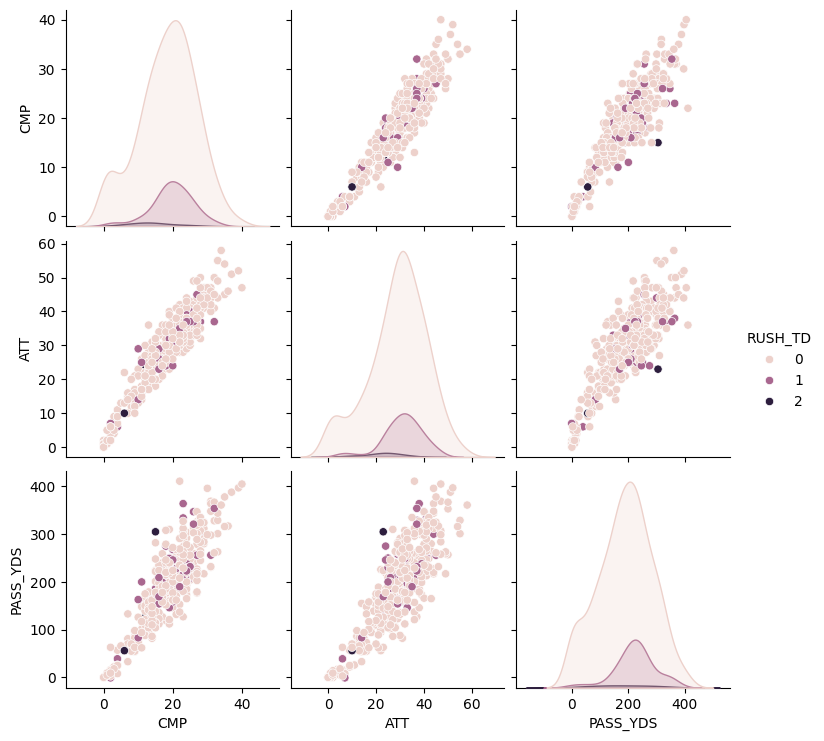

In [104]:
# - What am I doing? -
# What if we want to compare more than two features?

# Pick columns to use for plot
MultiScatter_QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023[['CMP','ATT','PASS_YDS', 'RUSH_TD']]

# Use pairplot to compare more features
sns.pairplot(MultiScatter_QuarterbackWeektoWeek2023, hue="RUSH_TD")

In [105]:
# - What am I doing? -
# Look at columns

RunningbackWeektoWeek2023.columns

Index(['Date', 'Opponent', 'CAR', 'RUSH_YDS', 'RUSH_AVG', 'RUSH_TD',
       'RUSH_LNG', 'REC', 'TGTS', 'REC_YDS', 'REC_AVG', 'REC_TD', 'LNG_REC',
       'FUM', 'LST', 'FF', 'KB', 'playerName', 'Game Result', 'Winner Score',
       'Loser Score', 'OT?', 'Home/Away', 'fantasy_points', 'REC%'],
      dtype='object')

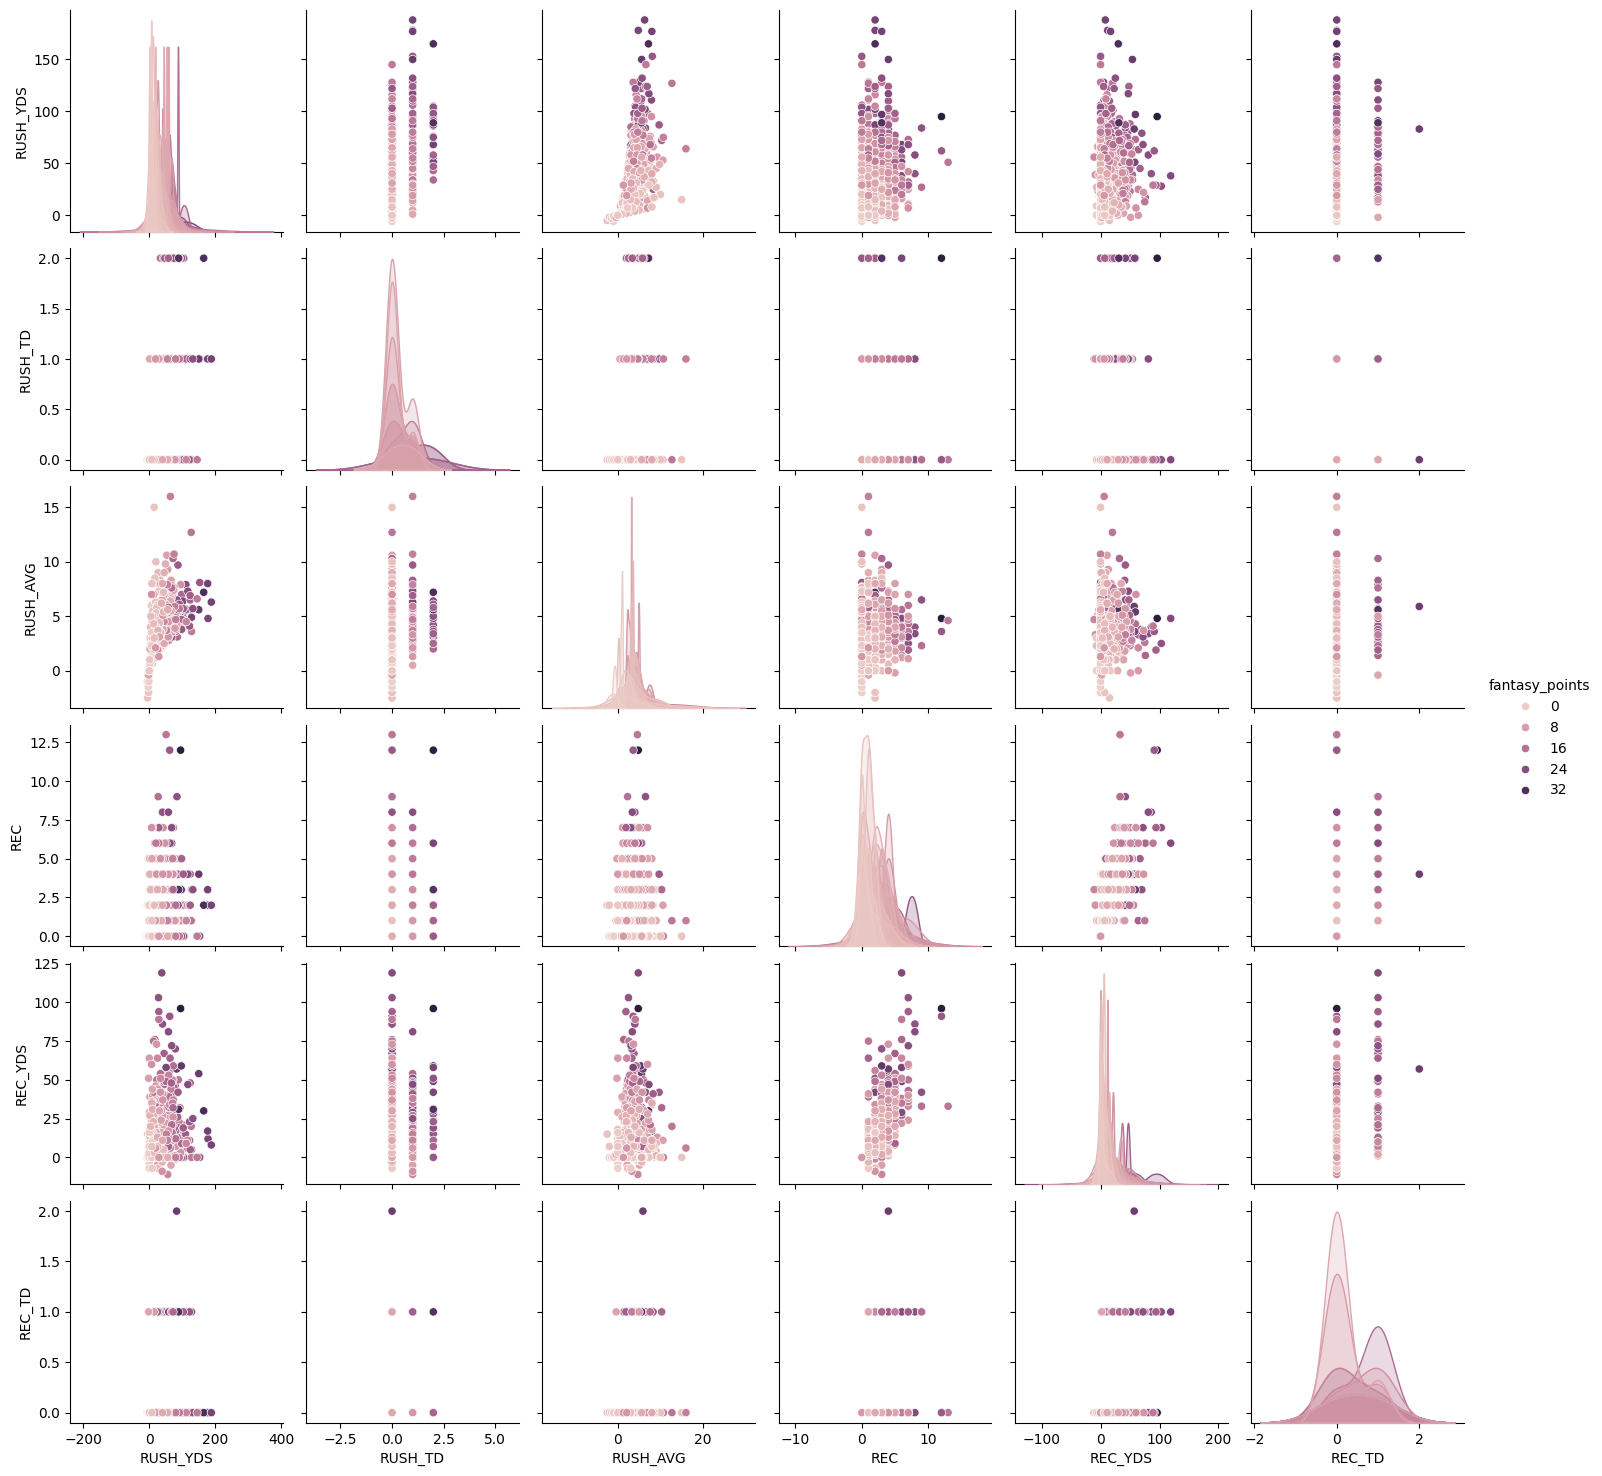

In [106]:
# - What am I doing? -
# What if we want to compare more than two features?

# Pick columns to use for plot
MultiScatter_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023[['RUSH_YDS', 'RUSH_TD', 'RUSH_AVG', 'REC', 'REC_YDS', 'REC_TD', 'fantasy_points']]

# Get subset of data to include the top rushers by rushing yards, rushing TD, etc.
# MultiScatter_RunningbackWeektoWeek2023 = MultiScatter_RunningbackWeektoWeek2023.sort_values(by='fantasy_points', ascending=False).head(20)


# Use pairplot to compare more features
sns.pairplot(MultiScatter_RunningbackWeektoWeek2023, hue="fantasy_points")

In [107]:
# - What am I doing? -
# Look at columns

ReceiverWeektoWeek2023.columns

Index(['Date', 'Opponent', 'REC', 'TGTS', 'REC_YDS', 'REC_AVG', 'REC_TD',
       'LNG_REC', 'CAR', 'RUSH_YDS', 'RUSH_AVG', 'LNG_RUSH', 'RUSH_TD', 'FUM',
       'LST', 'FF', 'KB', 'playerName', 'Game Result', 'Winner Score',
       'Loser Score', 'OT?', 'Home/Away', 'fantasy_points', 'REC%'],
      dtype='object')

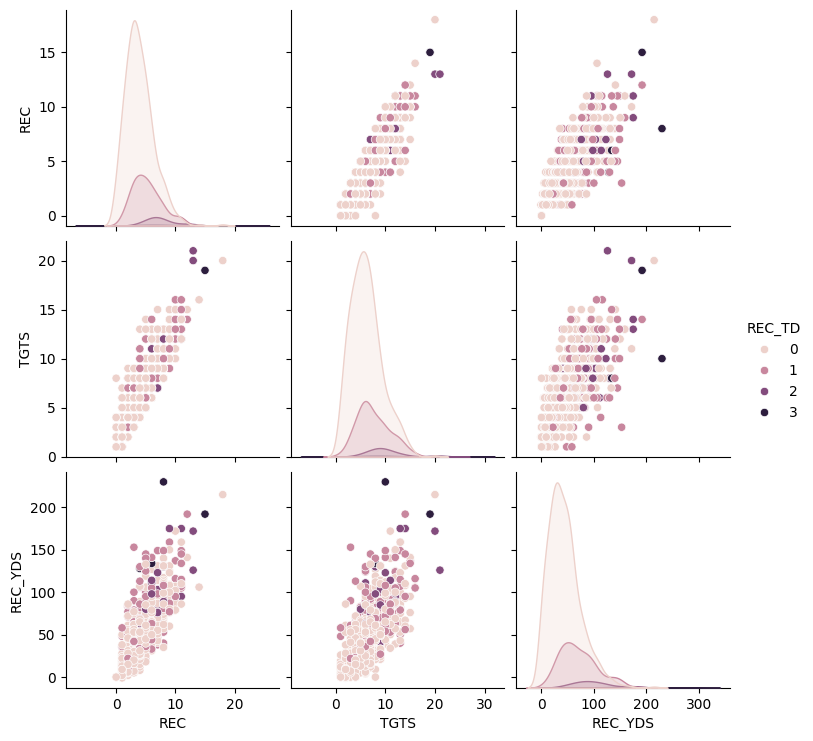

In [108]:
# - What am I doing? -
# What if we want to compare more than two features?

# Pick columns to use for plot
MultiScatter_ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023[['REC','TGTS','REC_YDS', 'REC_TD']]

# Use pairplot to compare more features
sns.pairplot(MultiScatter_ReceiverWeektoWeek2023, hue="REC_TD")

## Box Plots

<Axes: >

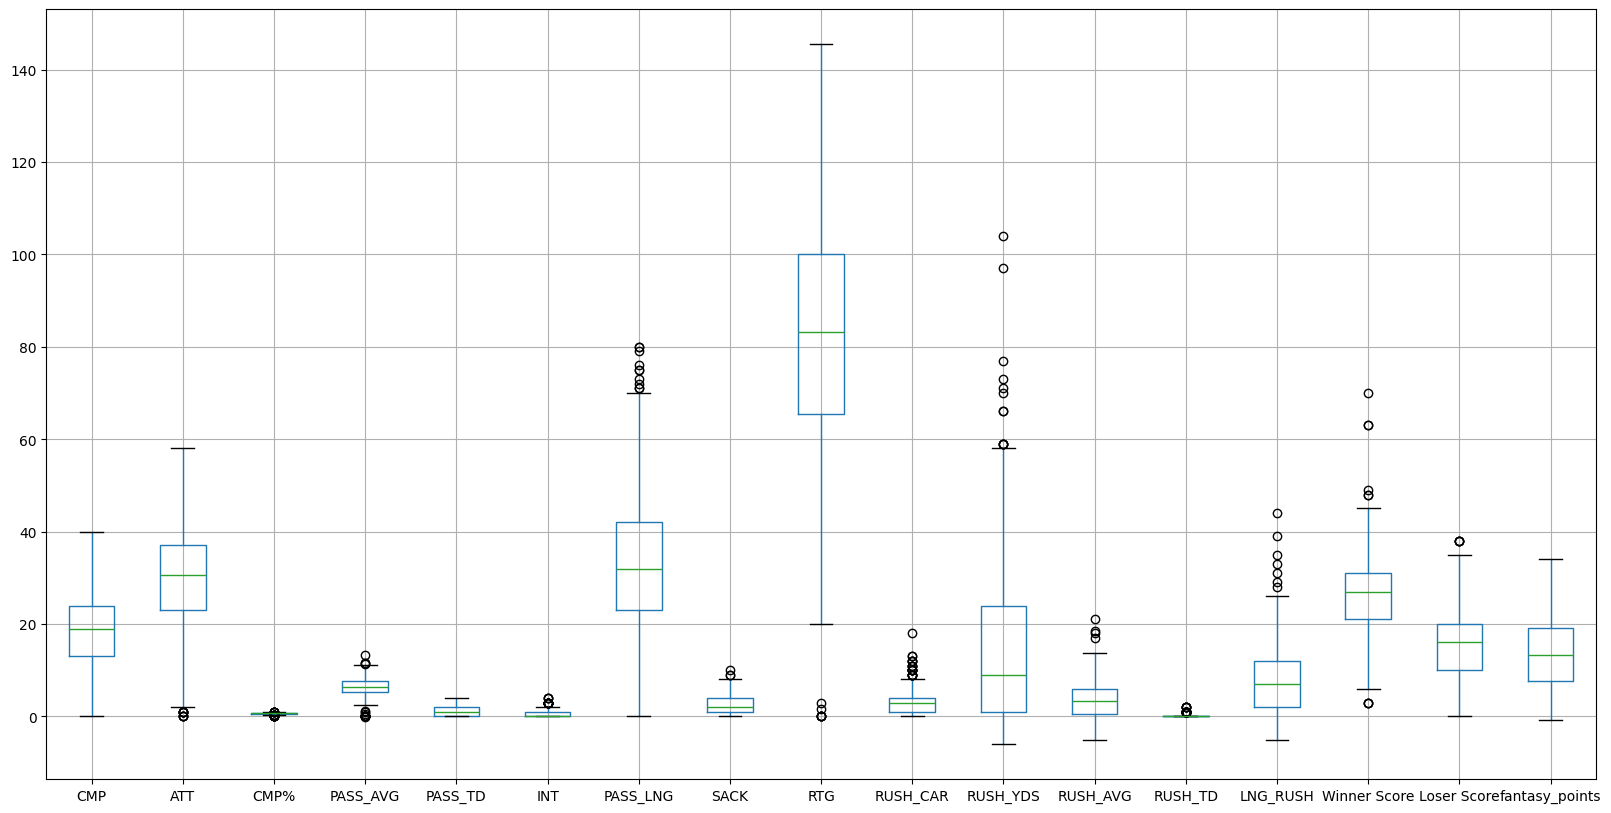

In [109]:
# - What am I doing? -
# Look for high level info about quarterbacks with a box plot

# Use this line to remove large column values that distort boxplot view
BP_QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop(columns=['QBR', 'PASS_YDS'])

# Look at boxplots to find outliers.
BP_QuarterbackWeektoWeek2023.boxplot(figsize=(20,10))

<Axes: >

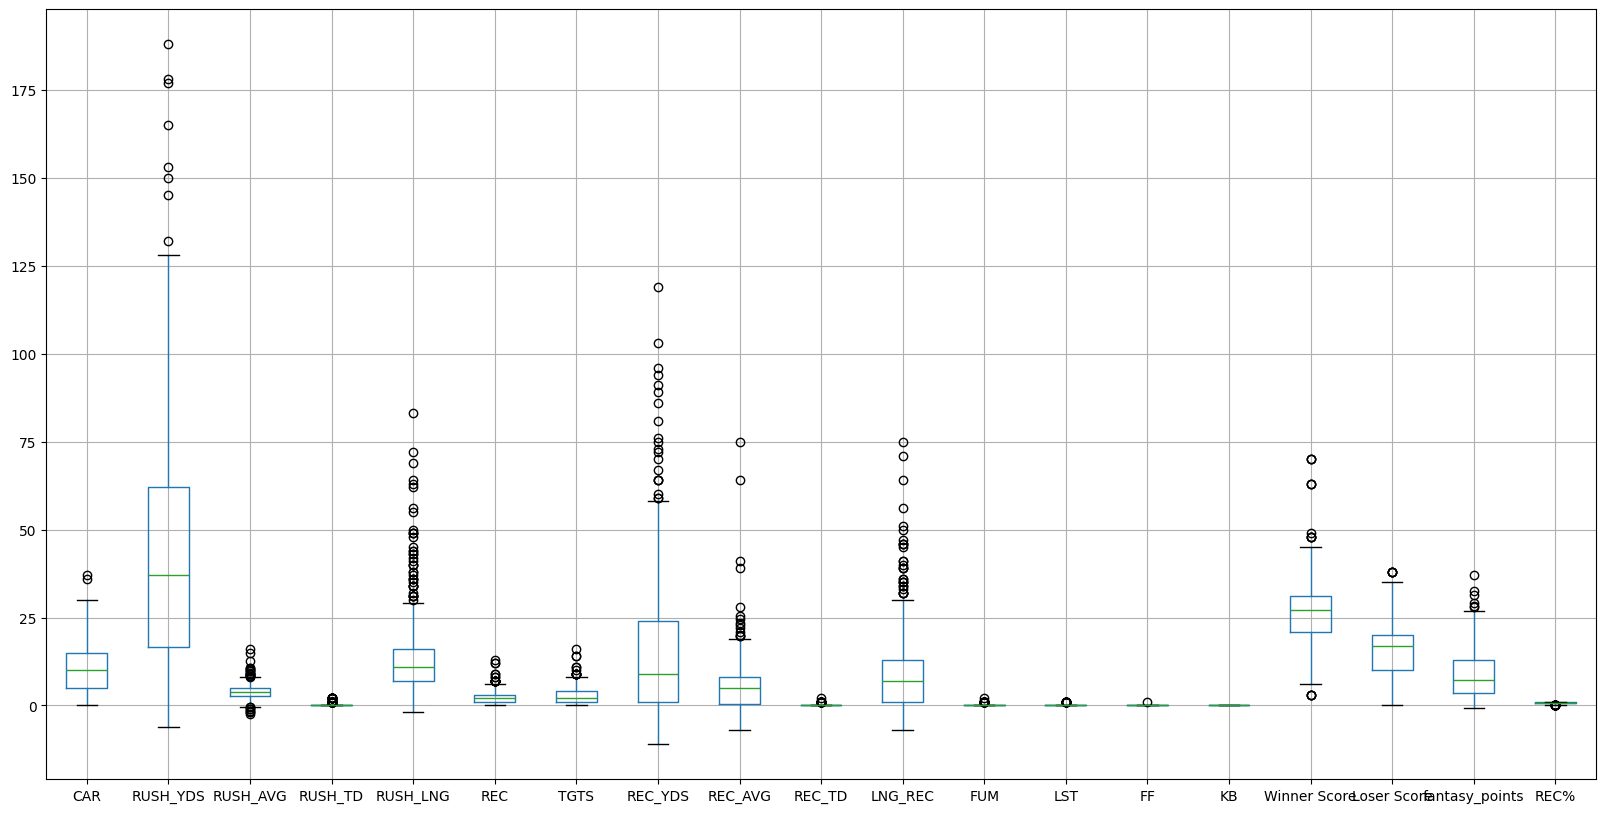

In [110]:
# - What am I doing? -
# Look for high level info about runningbacks with a box plot


# Remove text columns for group by statistics.
Groupby_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date', 'Opponent', 'Game Result', 'OT?', 'Home/Away'])

# IF need to see boxplot by season instead of by game
# Groupby_RunningbackWeektoWeek2023 = Groupby_RunningbackWeektoWeek2023.groupby('playerName').sum()

# Look at boxplots to find outliers.
Groupby_RunningbackWeektoWeek2023.boxplot(figsize=(20,10))

<Axes: >

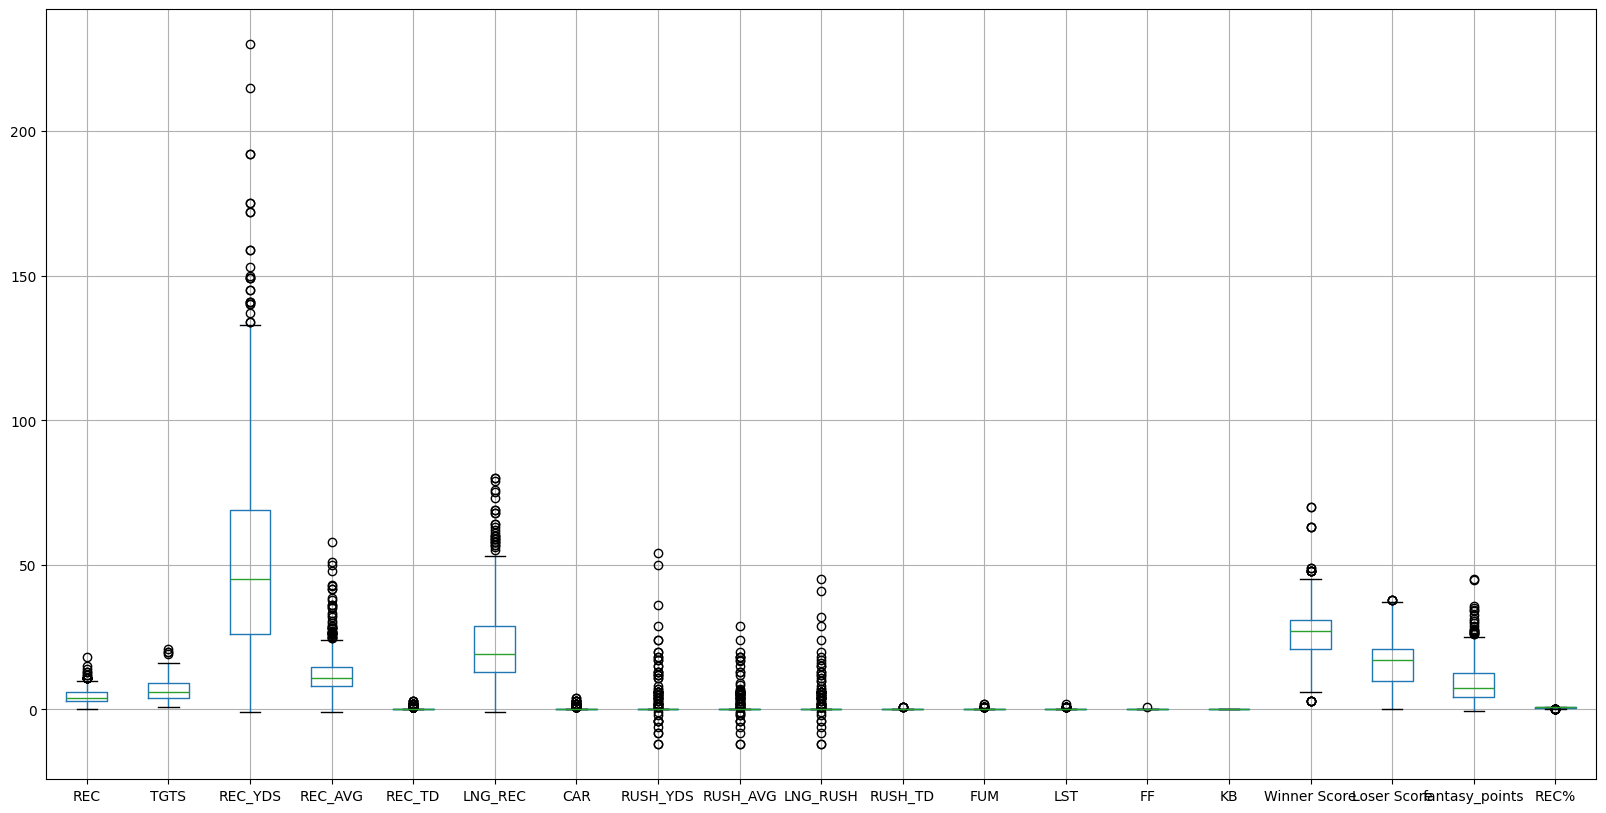

In [111]:
# - What am I doing? -
# Look for high level info about receivers with a box plot

# Remove text columns for group by statistics.
Groupby_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date', 'Opponent', 'Game Result', 'OT?', 'Home/Away'])

# IF need to see boxplot by season instead of by game
Groupby_RunningbackWeektoWeek2023 = Groupby_RunningbackWeektoWeek2023.groupby('playerName').sum()

# Look at boxplots to find outliers.
Groupby_ReceiverWeektoWeek2023.boxplot(figsize=(20,10))

## Quarterback Exploration Questions

In [112]:
# 1. QBs get double the amount of TDs than RBs and WRs

In [113]:
# Week to Week

# QB Week to Week Mean TD
print('Week to Week Quarterback: ', QuarterbackWeektoWeek2023['PASS_TD'].mean())

# RB Week to Week Mean TD
print('Week to Week Runningback: ', RunningbackWeektoWeek2023['RUSH_TD'].mean())

# WR Week to Week Mean TD
print('Week to Week Receiver: ', ReceiverWeektoWeek2023['REC_TD'].mean())


# Overall Season
# Remove text columns for group by statistics.
Groupby_QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop(columns=['Date',  'Opponent', 'Game Result', 'OT?', 'Home/Away'])

# Group columns to look at receiver WeektoWeek 2023 dataset closer.
Groupby_QuarterbackWeektoWeek2023 = Groupby_QuarterbackWeektoWeek2023.groupby('playerName').sum()

print('Overall Season Quarterback: ', Groupby_QuarterbackWeektoWeek2023['PASS_TD'].mean())


# Overall Season
# Remove text columns for group by statistics.
Groupby_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',  'Opponent', 'Game Result', 'OT?', 'Home/Away'])

# Group columns to look at receiver WeektoWeek 2023 dataset closer.
Groupby_RunningbackWeektoWeek2023 = Groupby_RunningbackWeektoWeek2023.groupby('playerName').sum()

print('Overall Season Runningback: ', Groupby_RunningbackWeektoWeek2023['RUSH_TD'].mean())


# Overall Season
# Remove text columns for group by statistics.
Groupby_ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.drop(columns=['Date',  'Opponent', 'Game Result', 'OT?', 'Home/Away'])

# Group columns to look at receiver WeektoWeek 2023 dataset closer.
Groupby_ReceiverWeektoWeek2023 = Groupby_ReceiverWeektoWeek2023.groupby('playerName').sum()

print('Overall Season Receiver: ', Groupby_ReceiverWeektoWeek2023['REC_TD'].mean())

# Conclusion: QBs get triple the amount of TDs that RBs and WRs get on average

Week to Week Quarterback:  1.0053763440860215
Week to Week Runningback:  0.25528169014084506
Week to Week Receiver:  0.28553299492385786
Overall Season Quarterback:  8.904761904761905
Overall Season Runningback:  3.5365853658536586
Overall Season Receiver:  4.245283018867925


In [114]:
QuarterbackWeektoWeek2023.columns

Index(['Date', 'Opponent', 'CMP', 'ATT', 'PASS_YDS', 'CMP%', 'PASS_AVG',
       'PASS_TD', 'INT', 'PASS_LNG', 'SACK', 'RTG', 'QBR', 'RUSH_CAR',
       'RUSH_YDS', 'RUSH_AVG', 'RUSH_TD', 'LNG_RUSH', 'playerName',
       'Game Result', 'Winner Score', 'Loser Score', 'OT?', 'Home/Away',
       'fantasy_points'],
      dtype='object')

In [115]:
# 2. QBs throw alot of interceptions. Therefore, we should consider this in analysis. Does this result in worse scoring QBs?

# Find Top 10 Interception QB for the season

# Remove text columns for group by statistics.
Groupby_QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop(columns=['Date',  'Opponent', 'Game Result', 'OT?', 'Home/Away'])

# Group columns to look at receiver WeektoWeek 2023 dataset closer.
INT_Groupby_QuarterbackWeektoWeek2023 = Groupby_QuarterbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='INT', ascending=False).head(10)

# Find Top 10 fantasy scoring QB for the season
TD_Groupby_QuarterbackWeektoWeek2023 = Groupby_QuarterbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='fantasy_points', ascending=False).head(10)

# Compare the two lists
merged_data = pd.merge(INT_Groupby_QuarterbackWeektoWeek2023, TD_Groupby_QuarterbackWeektoWeek2023, on='playerName', how='inner')

merged_data

# Conclusion: About half of players in Top INT throwing QBs are in Top 10 scoring players. While INTs may influence overall results, it is
# not the key decider in success of QB

CMP_x  ATT_x  PASS_YDS_x  CMP%_x  PASS_AVG_x  PASS_TD_x  \
playerName                                                                 
Sam Howell         388    612        3946  10.433       105.3         21   
Trevor Lawrence    322    497        3494   9.170       100.0         19   
Desmond Ridder     230    357        2645   9.223        99.7         11   
Joshua Dobbs       262    417        2464   8.195        76.8         13   
Justin Fields      227    370        2562   7.964        90.9         16   
Geno Smith         323    499        3624   9.677       107.1         20   

                 INT_x  PASS_LNG_x  SACK_x   RTG_x   QBR_x  RUSH_CAR_x  \
playerName                                                               
Sam Howell          21         542      65  1278.5  6727.0          48   
Trevor Lawrence     14         559      28  1227.9  7387.0          55   
Desmond Ridder      10         475      27  1171.5  5837.0          52   
Joshua Dobbs        10         396      30  1051.1  6465.0          77   
Justin Fields        9         475      44  1088.9  5933.0         124   
Geno Smith           9         598      31  1372.1  8321.0          37   

                 RUSH_YDS_x  RUSH_AVG_x  RUSH_TD_x  LNG_RUSH_x  \
playerName                                                       
Sam Howell              263        96.9          5         185   
Trevor Lawrence         266        67.7          4         140   
Desmond Ridder          187        42.3          5         106   
Joshua Dobbs            421        70.5          6         206   
Justin Fields           657        67.1          4         215   
Geno Smith              155        61.5          1         116   

                 Winner Score_x  Loser Score_x  fantasy_points_x  CMP_y  \
playerName                                                                
Sam Howell                  535            312            277.14    388   
Trevor Lawrence             411            236            252.36    322   
Desmond Ridder              343            223            188.50    230   
Joshua Dobbs                319            216            218.66    262   
Justin Fields               368            216            247.18    227   
Geno Smith                  415            270            237.46    323   

                 ATT_y  PASS_YDS_y  CMP%_y  PASS_AVG_y  PASS_TD_y  INT_y  \
playerName                                                                 
Sam Howell         612        3946  10.433       105.3         21     21   
Trevor Lawrence    497        3494   9.170       100.0         19     14   
Desmond Ridder     357        2645   9.223        99.7         11     10   
Joshua Dobbs       417        2464   8.195        76.8         13     10   
Justin Fields      370        2562   7.964        90.9         16      9   
Geno Smith         499        3624   9.677       107.1         20      9   

                 PASS_LNG_y  SACK_y   RTG_y   QBR_y  RUSH_CAR_y  RUSH_YDS_y  \
playerName                                                                    
Sam Howell              542      65  1278.5  6727.0          48         263   
Trevor Lawrence         559      28  1227.9  7387.0          55         266   
Desmond Ridder          475      27  1171.5  5837.0          52         187   
Joshua Dobbs            396      30  1051.1  6465.0          77         421   
Justin Fields           475      44  1088.9  5933.0         124         657   
Geno Smith              598      31  1372.1  8321.0          37         155   

                 RUSH_AVG_y  RUSH_TD_y  LNG_RUSH_y  Winner Score_y  \
playerName                                                           
Sam Howell             96.9          5         185             535   
Trevor Lawrence        67.7          4         140             411   
Desmond Ridder         42.3          5         106             343   
Joshua Dobbs           70.5          6         206             319   
Justin Fields          

## Runningback Exploration Questions

In [116]:
RunningbackWeektoWeek2023.sort_values(by='RUSH_YDS', ascending=False)

Date Opponent  CAR  RUSH_YDS  RUSH_AVG  RUSH_TD  RUSH_LNG  REC  \
209 2024-01-06      HOU   30       188       6.3        1        49    2   
88  2024-01-07       NE   37       178       4.8        1        50    2   
94  2023-10-08      DEN   22       177       8.0        1        72    3   
185 2023-10-08      TEN   23       165       7.2        2        56    2   
0   2024-01-07      JAX   19       153       8.1        1        69    0   
..         ...      ...  ...       ...       ...      ...       ...  ...   
401 2023-11-05      NYG    4        -2      -0.5        0         5    0   
179 2023-09-17      BUF    9        -2      -0.2        0         3    5   
535 2023-10-15      CLE    2        -3      -1.5        0         0    0   
408 2023-11-09      CHI    2        -5      -2.5        0         1    2   
420 2023-12-17      CLE    6        -6      -1.0        0         2    0   

     TGTS  REC_YDS  REC_AVG  REC_TD  LNG_REC  FUM  LST  FF  KB  \
209     2        8      4.0       0        6    0    0   0   0   
88      2       12      6.0       0       11    0    0   0   0   
94      3       17      5.7       0       12    0    0   0   0   
185     2       30     15.0       0       26    0    0   0   0   
0       0        0      0.0       0        0    0    0   0   0   
..    ...      ...      ...     ...      ...  ...  ...  ..  ..   
401     0        0      0.0       0        0    0    0   0   0   
179     6       51     10.2       0       12    0    0   0   0   
535     0        0      0.0       0        0    0    0   0   0   
408     2       15      7.5       0       13    0    0   0   0   
420     0        0      0.0       0        0    0    0   0   0   

          playerName Game Result  Winner Score  Loser Score   OT? Home/Away  \
209  Jonathan Taylor           L            23           19  None      Home   
88       Breece Hall           W            17            3  None      Away   
94       Breece Hall           W            31           21  None      Away   
185        Zack Moss           W            23           16  None      Home   
0      Derrick Henry           W            28           20  None      Home   
..               ...         ...           ...          ...   ...       ...   
401      Zamir White           W            30            6  None      Home   
179      Josh Jacobs           L            38           10  None      Away   
535  Elijah Mitchell           L            19           17  None      Away   
408    Miles Sanders           L            16           13  None      Away   
420   D'Onta Foreman           L            20           17  None      Away   

     fantasy_points      REC%  
209            26.6  1.000000  
88             26.0  1.000000  
94             26.9  1.000000  
185            32.5  1.000000  
0              21.3       NaN  
..              ...       ...  
401            -0.2       NaN  
179             7.4  0.833333  
535            -0.3       NaN  
408             2.0  1.000000  
420            -0.6       NaN  

[568 rows x 25 columns]

In [117]:
# 1a. Who are responsible for outlier rushing yard games? (No Outlier Rushing Yards seasons)

Groupby_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',  'Opponent', 'Game Result', 'OT?', 'Home/Away'])

# Assuming you have a DataFrame 'data' with a column 'value' containing your data
# Calculate the IQR (Interquartile Range)
Q1 = Groupby_RunningbackWeektoWeek2023['RUSH_YDS'].quantile(0.25)
Q3 = Groupby_RunningbackWeektoWeek2023['RUSH_YDS'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers using the lower and upper bounds
outliers = Groupby_RunningbackWeektoWeek2023[Groupby_RunningbackWeektoWeek2023['RUSH_YDS'] > upper_bound]

outliers.sort_values(by='RUSH_YDS', ascending=False)


CAR  RUSH_YDS  RUSH_AVG  RUSH_TD  RUSH_LNG  REC  TGTS  REC_YDS  REC_AVG  \
209   30       188       6.3        1        49    2     2        8      4.0   
88    37       178       4.8        1        50    2     2       12      6.0   
94    22       177       8.0        1        72    3     3       17      5.7   
185   23       165       7.2        2        56    2     2       30     15.0   
0     19       153       8.1        1        69    0     0        0      0.0   
43    27       150       5.6        1        29    4     4       54     13.5   
392   22       145       6.6        0        43    0     1        0      0.0   
370   23       132       5.7        1        30    3     4       25      8.3   

     REC_TD  LNG_REC  FUM  LST  FF  KB       playerName  Winner Score  \
209       0        6    0    0   0   0  Jonathan Taylor            23   
88        0       11    0    0   0   0      Breece Hall            17   
94        0       12    0    0   0   0      Breece Hall            31   
185       0       26    0    0   0   0        Zack Moss            23   
0         0        0    0    0   0   0    Derrick Henry            28   
43        0       34    0    0   0   0     James Conner            21   
392       0        0    0    0   0   0      Zamir White            20   
370       0       16    0    0   0   0      Ty Chandler            27   

     Loser Score  fantasy_points  REC%  
209           19            26.6  1.00  
88             3            26.0  1.00  
94            21            26.9  1.00  
185           16            32.5  1.00  
0             20            21.3   NaN  
43            20            28.4  1.00  
392           14            14.5  0.00  
370           24            23.2  0.75

In [118]:
# 1b. Who are responsible for outlier rushing TD season?

Groupby_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',  'Opponent', 'Game Result', 'OT?', 'Home/Away'])
Groupby_RunningbackWeektoWeek2023 = Groupby_RunningbackWeektoWeek2023.groupby('playerName').sum()

# Assuming you have a DataFrame 'data' with a column 'value' containing your data
# Calculate the IQR (Interquartile Range)
Q1 = Groupby_RunningbackWeektoWeek2023['RUSH_TD'].quantile(0.25)
Q3 = Groupby_RunningbackWeektoWeek2023['RUSH_TD'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers using the lower and upper bounds
outliers = Groupby_RunningbackWeektoWeek2023[Groupby_RunningbackWeektoWeek2023['RUSH_TD'] > upper_bound]

outliers.sort_values(by='RUSH_TD', ascending=False)

CAR  RUSH_YDS  RUSH_AVG  RUSH_TD  RUSH_LNG  REC  TGTS  REC_YDS  \
playerName                                                                      
Derrick Henry  268      1070      60.9       11       289   26    34      198   

               REC_AVG  REC_TD  LNG_REC  FUM  LST  FF  KB  Winner Score  \
playerName                                                                
Derrick Henry    112.9       0      161    0    0   0   0           391   

               Loser Score  fantasy_points       REC%  
playerName                                             
Derrick Henry          241           205.8  10.166667

<Axes: xlabel='CAR', ylabel='RUSH_TD'>

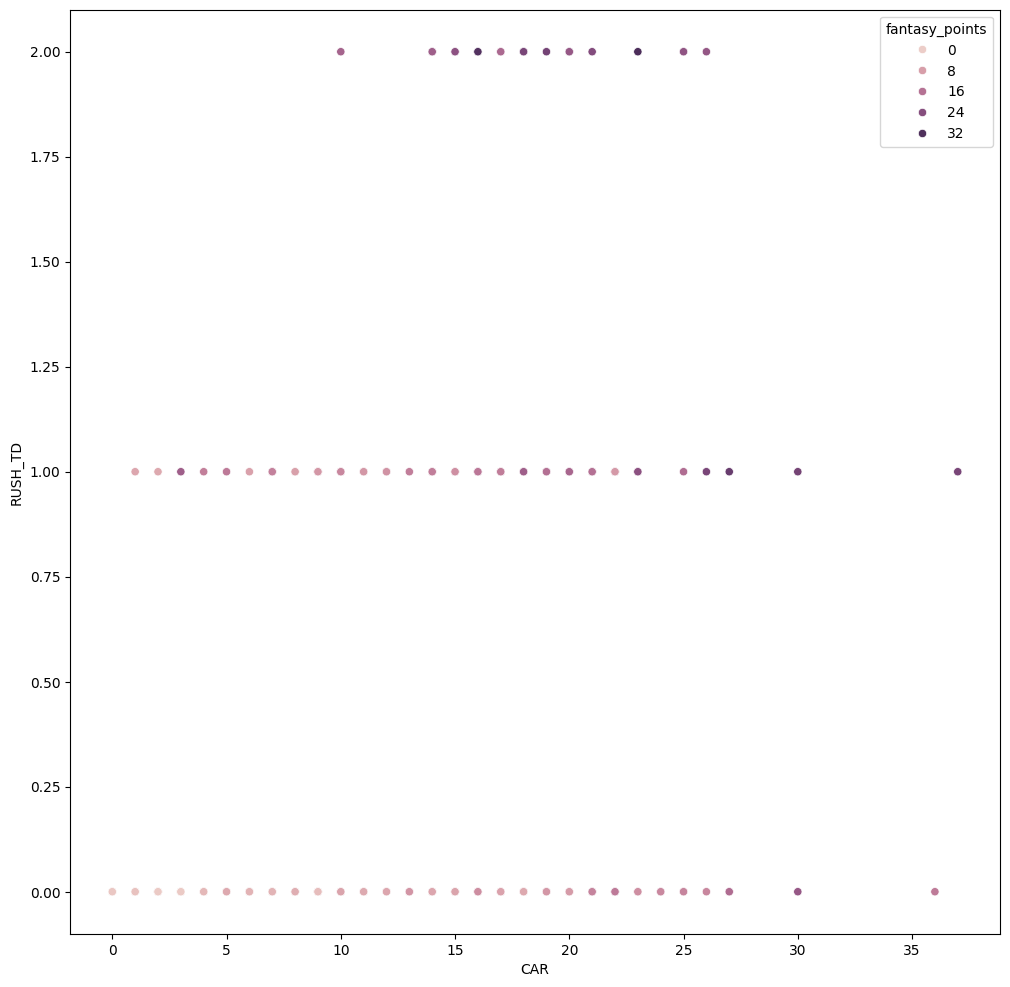

In [119]:
# 2. More carries a RB gets, the higher chance for a td?

# Remove text columns for correlation statistics.
Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

# Use seaborn to create with color
sns.scatterplot(data=Correlation_RunningbackWeektoWeek2023, x="CAR", y="RUSH_TD", hue="fantasy_points")

# Conclusion: More Carries may have a slight influence on the number of TDs.

In [120]:
# 3. Who are the RBs taking less snaps with high fantasy points? How do they do this?

# Remove text columns for group by statistics.
Groupby_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',  'Opponent', 'Game Result', 'OT?', 'Home/Away'])

# Group columns to look at receiver WeektoWeek 2023 dataset closer.
points_Groupby_QuarterbackWeektoWeek2023 = Groupby_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='fantasy_points', ascending=False).head(15)

# Find Top 10 fantasy scoring QB for the season
CAR_Groupby_QuarterbackWeektoWeek2023 = points_Groupby_QuarterbackWeektoWeek2023.sort_values(by='CAR', ascending=True)

CAR_Groupby_QuarterbackWeektoWeek2023

CAR  RUSH_YDS  RUSH_AVG  RUSH_TD  RUSH_LNG  REC  TGTS  \
playerName                                                                  
Brian Robinson Jr.  178       733      63.1        5       227   36    43   
Austin Ekeler       179       628      47.9        5       195   51    74   
Alvin Kamara        180       694      50.1        5       165   75    86   
Zack Moss           182       792      56.1        5       239   27    37   
Bijan Robinson      200       871      66.1        4       238   53    81   
James Conner        208      1040      66.5        7       285   27    33   
Javonte Williams    217       774      54.3        3       218   47    58   
Kenneth Walker III  219       905      63.4        8       300   29    37   
Travis Etienne Jr.  221       817      54.5        9       264   51    65   
Breece Hall         223       994      73.0        5       410   76    95   
Josh Jacobs         233       805      42.2        6       224   37    54   
Chuba Hubbard       238       902      67.5        5       224   39    44   
Saquon Barkley      247       962      54.9        6       290   41    60   
Joe Mixon           257      1034      68.9        9       260   52    64   
Derrick Henry       268      1070      60.9       11       289   26    34   

                    REC_YDS  REC_AVG  REC_TD  LNG_REC  FUM  LST  FF  KB  \
playerName                                                                
Brian Robinson Jr.      368    110.8       4      221    4    2   0   0   
Austin Ekeler           436    105.9       1      232    5    4   0   0   
Alvin Kamara            466     81.9       1      182    0    0   0   0   
Zack Moss               192     74.8       2      124    0    0   0   0   
Bijan Robinson          455    111.6       4      264    4    3   0   0   
James Conner            165     49.3       2      104    0    0   0   0   
Javonte Williams        228     72.5       2      140    1    1   0   0   
Kenneth Walker III      259    139.8       1      199    1    0   0   0   
Travis Etienne Jr.      411    118.9       1      219    0    0   0   0   
Breece Hall             591    134.4       4      280    2    0   0   0   
Josh Jacobs             296     98.6       0      139    3    1   0   0   
Chuba Hubbard           233     88.5       0      132    1    0   0   0   
Saquon Barkley          280     96.4       4      173    2    2   0   0   
Joe Mixon               376    124.8       3      255    0    0   0   0   
Derrick Henry           198    112.9       0      161    0    0   0   0   

                    Winner Score  Loser Score  fantasy_points       REC%  
playerName                                                                
Brian Robinson Jr.           477          264           178.1  10.111111  
Austin Ekeler                374          226           159.9   9.371429  
Alvin Kamara                 362          199           189.5  11.394048  
Zack Moss                    391          270           153.9   7.857143  
Bijan Robinson               403          261           201.1   9.564286  
James Conner                 383          255           188.0   7.966667  
Javonte Williams             446          272           151.7  12.777778  
Kenneth Walker III           391          255           184.9  10.766667  
Travis Etienne Jr.           437          236           208.3  12.233333  
Breece Hall                  420          203           250.5  12.916667  
Josh Jacobs                  296          165           162.6   8.643939  
Chuba Hubbard                420          232           163.0  14.633333  
Saquon Barkley               366          191           200.7   9.723810  
Joe Mixon                    468          282           239.0  13.757143  
Derrick Henry                391          241           205.8  10.166667

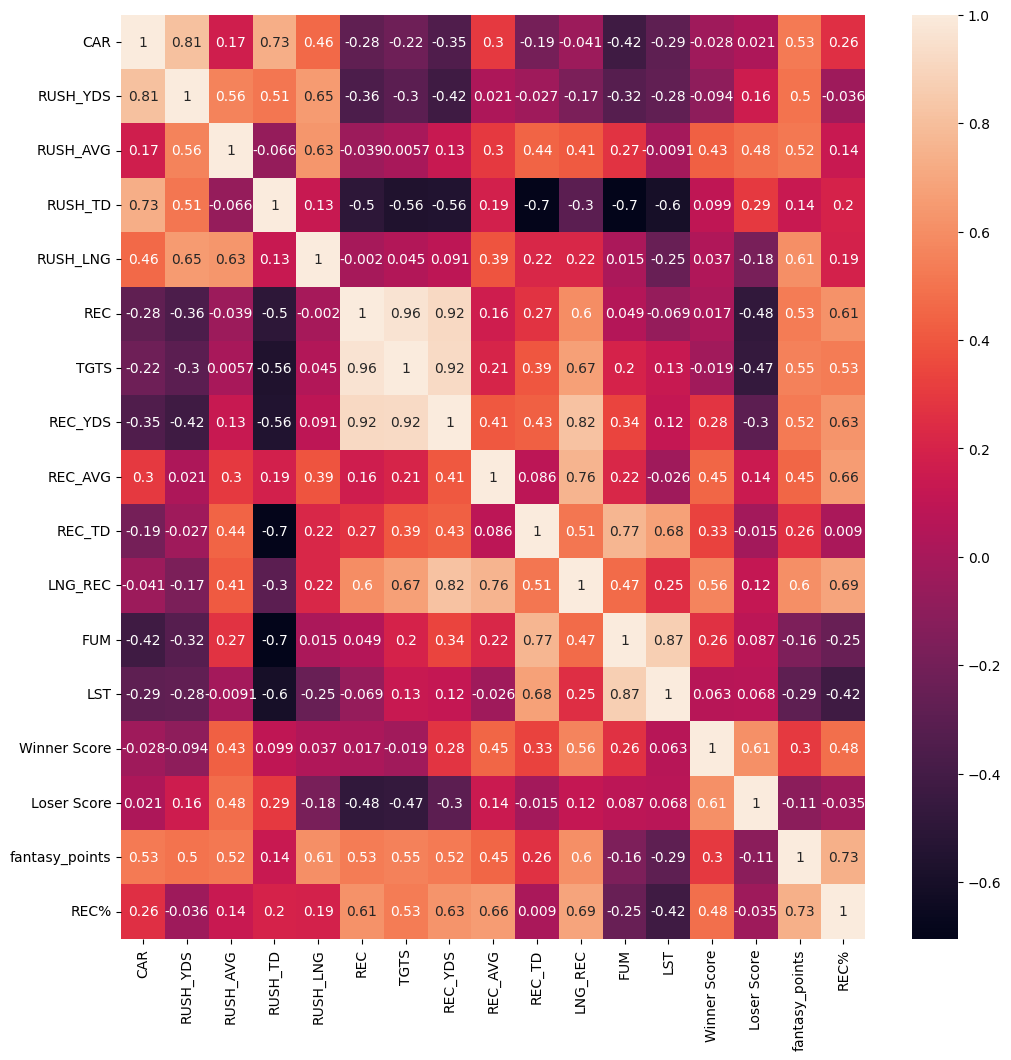

In [121]:
# 4. High correlation for Top 10 RB fantasy scorers between Rush average and fantasy points

# Remove text columns for correlation statistics.
Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date', 'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])
Correlation_RunningbackWeektoWeek2023 = Correlation_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='fantasy_points', ascending=False).head(10)


# Visualize correlations for quarterbacks week to week.
# Good step to understand what your focus should be on during data analysis.
sns.heatmap(Correlation_RunningbackWeektoWeek2023.groupby('playerName').mean().corr(), annot=True)

plt.rcParams['figure.figsize'] = (12, 12)

plt.show()

# Conclusion: Strong correlation between rush average and fantasy points. Even stronger correlation between Rush Yards and fantasy points.


In [122]:
# 5. Do high TD scoring RBs have more points than non high scoring TD RB?

# Remove text columns for correlation statistics.
Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date', 'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

High_TDgroup_RunningbackWeektoWeek2023 = Correlation_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='RUSH_TD', ascending=False).head(25)

Low_TDgroup_RunningbackWeektoWeek2023 = Correlation_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='RUSH_TD', ascending=True).head(25)


High_TDgroup_RunningbackWeektoWeek2023['Scoring'] = 'High'
Low_TDgroup_RunningbackWeektoWeek2023['Scoring'] = 'Low'

Final = pd.concat([High_TDgroup_RunningbackWeektoWeek2023, Low_TDgroup_RunningbackWeektoWeek2023], axis=0).sort_values(by='fantasy_points', ascending=False)

Final

# Yes, High TD RBs generally get more points than non high scoring TD RBs.

CAR  RUSH_YDS  RUSH_AVG  RUSH_TD  RUSH_LNG  REC  TGTS  \
playerName                                                                     
Breece Hall            223       994      73.0        5       410   76    95   
Joe Mixon              257      1034      68.9        9       260   52    64   
Travis Etienne Jr.     221       817      54.5        9       264   51    65   
Derrick Henry          268      1070      60.9       11       289   26    34   
Bijan Robinson         200       871      66.1        4       238   53    81   
Saquon Barkley         247       962      54.9        6       290   41    60   
Alvin Kamara           180       694      50.1        5       165   75    86   
James Conner           208      1040      66.5        7       285   27    33   
Kenneth Walker III     219       905      63.4        8       300   29    37   
Brian Robinson Jr.     178       733      63.1        5       227   36    43   
Chuba Hubbard          238       902      67.5        5       224   39    44   
Josh Jacobs            233       805      42.2        6       224   37    54   
Austin Ekeler          179       628      47.9        5       195   51    74   
Zack Moss              182       792      56.1        5       239   27    37   
Javonte Williams       217       774      54.3        3       218   47    58   
Javonte Williams       217       774      54.3        3       218   47    58   
Ezekiel Elliott        171       588      55.5        3       154   49    63   
Ezekiel Elliott        171       588      55.5        3       154   49    63   
Jonathan Taylor        146       672      39.5        6       183   18    22   
Tyler Allgeier         179       667      61.0        4       183   17    21   
Tyler Allgeier         179       667      61.0        4       183   17    21   
Tyjae Spears            96       438      77.0        2       210   51    69   
Tyjae Spears            96       438      77.0        2       210   51    69   
Alexander Mattison     180       700      60.5        0       182   30    44   
Rhamondre Stevenson    136       531      44.6        4       171   35    46   
AJ Dillon              178       613      50.7        2       175   22    28   
Antonio Gibson          65       265      66.6        1       130   48    59   
Khalil Herbert         132       611      50.7        2       179   20    31   
Khalil Herbert         132       611      50.7        2       179   20    31   
Samaje Perine           53       238      68.7        1       111   50    56   
Jaleel McLaughlin       76       410      74.8        1       185   31    36   
Ty Chandler            102       461      56.8        3       150   21    25   
Ty Chandler            102       461      56.8        3       150   21    25   
Zach Charbonnet        108       462      67.4        1       170   33    40   
D'Onta Foreman         109       425      30.7        4       108   11    16   
D'Onta Foreman         109       425      30.7        4       108   11    16   
Roschon Johnson         81       352      68.6        2       163   34    40   
Roschon Johnson         81       352      68.6        2       163   34    40   
Miles Sanders          129       432      48.9        1       181   27    41   
Zamir White            104       451      41.8        1       132   15    19   
Emari Demercado         58       284      46.4        2       116   21    30   
Joshua Kelley          107       405      52.5        2       162    8    12   
Jamaal Williams        106       306      38.2        1        94   18    20   
Royce Freeman           77       319      29.5        2        81    1     2   
Royce Freeman           77       319      29.5        2        81    1     2   
Elijah Mitchell         75       281      31.2        2       100    6     8   
Cam Akers               60       167      28.6        2        77   11    12   
Pierre Strong Jr.       63       291      53.3        1       138    5     8   
Chris Rodriguez Jr.    

In [123]:
# 6. What are the characteristics of high scoring player? Age, OL, Schedule/Opponents, etc?

In [124]:
# 7. Are the fantasy point leaders the consistent ones week in week out, are they high and low players, or average with breakout weeks? 
# Which players are performing most consistently? Which have biggest games? 

# Remove text columns for correlation statistics.
Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date', 'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

scoreleaders_RunningbackWeektoWeek2023 = Correlation_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='fantasy_points', ascending=False).head(5)

# Identify outliers using the lower and upper bounds

# Compare the two lists
merged_data = pd.merge(Correlation_RunningbackWeektoWeek2023, scoreleaders_RunningbackWeektoWeek2023, on='playerName', how='inner')

merged_data


CAR_x  RUSH_YDS_x  RUSH_AVG_x  RUSH_TD_x  RUSH_LNG_x  REC_x  TGTS_x  \
0      19         153         8.1          1          69      0       0   
1      19          88         4.6          1          12      1       1   
2      17          34         2.0          2           6      1       2   
3      18          76         4.2          2          18      1       2   
4      11          24         2.2          0           8      1       1   
..    ...         ...         ...        ...         ...    ...     ...   
76     18          53         2.9          0          12      3       5   
77     22          95         4.3          1          17      1       2   
78     11          62         5.6          1          25      0       5   
79     13          37         2.8          0           9      5       8   
80     19         124         6.5          0          19      4       5   

    REC_YDS_x  REC_AVG_x  REC_TD_x  LNG_REC_x  FUM_x  LST_x      playerName  \
0           0        0.0         0          0      0      0   Derrick Henry   
1          11       11.0         0         11      0      0   Derrick Henry   
2          17       17.0         0         17      0      0   Derrick Henry   
3           0        0.0         0          0      0      0   Derrick Henry   
4          -4       -4.0         0         -4      0      0   Derrick Henry   
..        ...        ...       ...        ...    ...    ...             ...   
76         26        8.7         0          9      0      0  Bijan Robinson   
77         11       11.0         0         11      0      0  Bijan Robinson   
78          0        0.0         0          0      0      0  Bijan Robinson   
79         43        8.6         0         22      0      0  Bijan Robinson   
80         48       12.0         0         29      0      0  Bijan Robinson   

    Winner Score_x  Loser Score_x  fantasy_points_x  REC%_x  CAR_y  \
0               28             20              21.3     NaN    268   
1               20             17              16.4   1.000    268   
2               28             27              17.6   0.500    268   
3               17             10              20.1   0.500    268   
4               20              6               2.5   1.000    268   
..             ...            ...               ...     ...    ...   
76              13              8               9.4   0.600    200   
77              25             23              17.1   0.500    200   
78              28             23              12.2   0.000    200   
79              24             16              10.5   0.625    200   
80              25             24              19.2   0.800    200   

    RUSH_YDS_y  RUSH_AVG_y  RUSH_TD_y  RUSH_LNG_y  REC_y  TGTS_y  REC_YDS_y  \
0         1070        60.9         11         289     26      34        198   
1         1070        60.9         11         289     26      34        198   
2         1070        60.9         11         289     26      34        198   
3         1070        60.9         11         289     26      34        198   
4         1070        60.9         11         289     26      34        198   
..         ...         ...        ...         ...    ...     ...        ...   
76         871        66.1          4         238     53      81        455   
77         871        66.1          4         238     53      81        455   
78         871        66.1          4         238     53      81        455   
79         871        66.1          4         238     53      81        455   
80         871        66.1          4         238     53      81        455   

    REC_AVG_y  REC_TD_y  LNG_REC_y  FUM_y  LST_y  Winner Score_y  \
0       112.9         0        161      0      0             391   
1       112.9         0        161      0      0             391   
2       112.9         0        161      0      0             391   
3       112.9         0        161      0      0             391   
4       112.9         0 

In [125]:
# 8. Who are the RB with reception TD? How do they stack up to overall TDs scored by RB?

Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date', 'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

High_RECTDgroup_RunningbackWeektoWeek2023 = Correlation_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='REC_TD', ascending=False).head(10)

High_RUSHTDgroup_RunningbackWeektoWeek2023 = Correlation_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='RUSH_TD', ascending=False).head(10)

High_RECTDgroup_RunningbackWeektoWeek2023['TD Leader'] = 'Receiving'
High_RUSHTDgroup_RunningbackWeektoWeek2023['TD Leader'] = 'Rushing'

Final = pd.concat([High_RECTDgroup_RunningbackWeektoWeek2023, High_RUSHTDgroup_RunningbackWeektoWeek2023], axis=0).sort_values(by='RUSH_TD', ascending=False)

Final

# Conclusion: Most RBs catching TDs aren't running it in as much. However, the exceptions are Raheem Mostert, Christian Mccafrey, and Joe Mixon

CAR  RUSH_YDS  RUSH_AVG  RUSH_TD  RUSH_LNG  REC  TGTS  \
playerName                                                                  
Derrick Henry       268      1070      60.9       11       289   26    34   
Joe Mixon           257      1034      68.9        9       260   52    64   
Joe Mixon           257      1034      68.9        9       260   52    64   
Travis Etienne Jr.  221       817      54.5        9       264   51    65   
Kenneth Walker III  219       905      63.4        8       300   29    37   
James Conner        208      1040      66.5        7       285   27    33   
James Conner        208      1040      66.5        7       285   27    33   
Saquon Barkley      247       962      54.9        6       290   41    60   
Jonathan Taylor     146       672      39.5        6       183   18    22   
Saquon Barkley      247       962      54.9        6       290   41    60   
Josh Jacobs         233       805      42.2        6       224   37    54   
Alvin Kamara        180       694      50.1        5       165   75    86   
Zack Moss           182       792      56.1        5       239   27    37   
Breece Hall         223       994      73.0        5       410   76    95   
Zack Moss           182       792      56.1        5       239   27    37   
Brian Robinson Jr.  178       733      63.1        5       227   36    43   
Bijan Robinson      200       871      66.1        4       238   53    81   
Javonte Williams    217       774      54.3        3       218   47    58   
Antonio Gibson       65       265      66.6        1       130   48    59   
Alexander Mattison  180       700      60.5        0       182   30    44   

                    REC_YDS  REC_AVG  REC_TD  LNG_REC  FUM  LST  Winner Score  \
playerName                                                                      
Derrick Henry           198    112.9       0      161    0    0           391   
Joe Mixon               376    124.8       3      255    0    0           468   
Joe Mixon               376    124.8       3      255    0    0           468   
Travis Etienne Jr.      411    118.9       1      219    0    0           437   
Kenneth Walker III      259    139.8       1      199    1    0           391   
James Conner            165     49.3       2      104    0    0           383   
James Conner            165     49.3       2      104    0    0           383   
Saquon Barkley          280     96.4       4      173    2    2           366   
Jonathan Taylor         147     58.6       1      102    1    0           266   
Saquon Barkley          280     96.4       4      173    2    2           366   
Josh Jacobs             296     98.6       0      139    3    1           296   
Alvin Kamara            466     81.9       1      182    0    0           362   
Zack Moss               192     74.8       2      124    0    0           391   
Breece Hall             591    134.4       4      280    2    0           420   
Zack Moss               192     74.8       2      124    0    0           391   
Brian Robinson Jr.      368    110.8       4      221    4    2           477   
Bijan Robinson          455    111.6       4      264    4    3           403   
Javonte Williams        228     72.5       2      140    1    1           446   
Antonio Gibson          389    123.8       2      245    3    2           504   
Alexander Mattison      192     83.4       3      138    3    2           382   

                    Loser Score  fantasy_points       REC%  TD Leader  
playerName                                                             
Derrick Henry               241           205.8  10.166667    Rushing  
Joe Mixon                   282           239.0  13.757143    Rushing  
Joe Mixon                   282           239.0  13.757143  Receiving  
Travis Etienne Jr.          236           208.3  12.233333    Rushing  
Kenneth Walker III          255           184.9  10.766667    Rushing  
James Conner                255       

<Axes: xlabel='RUSH_YDS', ylabel='RUSH_TD'>

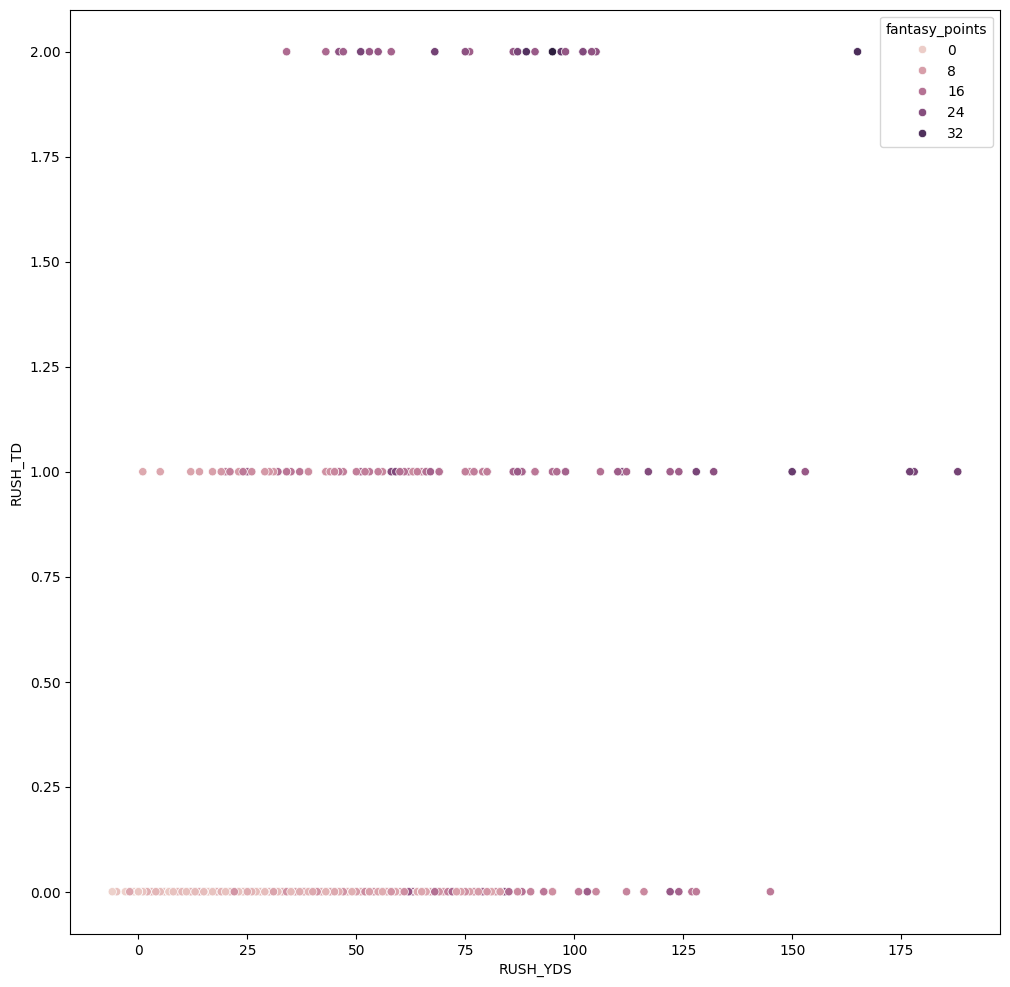

In [126]:
# 9. More rush Yards = More Tds?

# Remove text columns for correlation statistics.
Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

# Use seaborn to create with color
sns.scatterplot(data=Correlation_RunningbackWeektoWeek2023, x="RUSH_YDS", y="RUSH_TD", hue="fantasy_points")

# Conclusion: High Rush Yards do seem to result in more TDs.

<Axes: xlabel='REC%', ylabel='TGTS'>

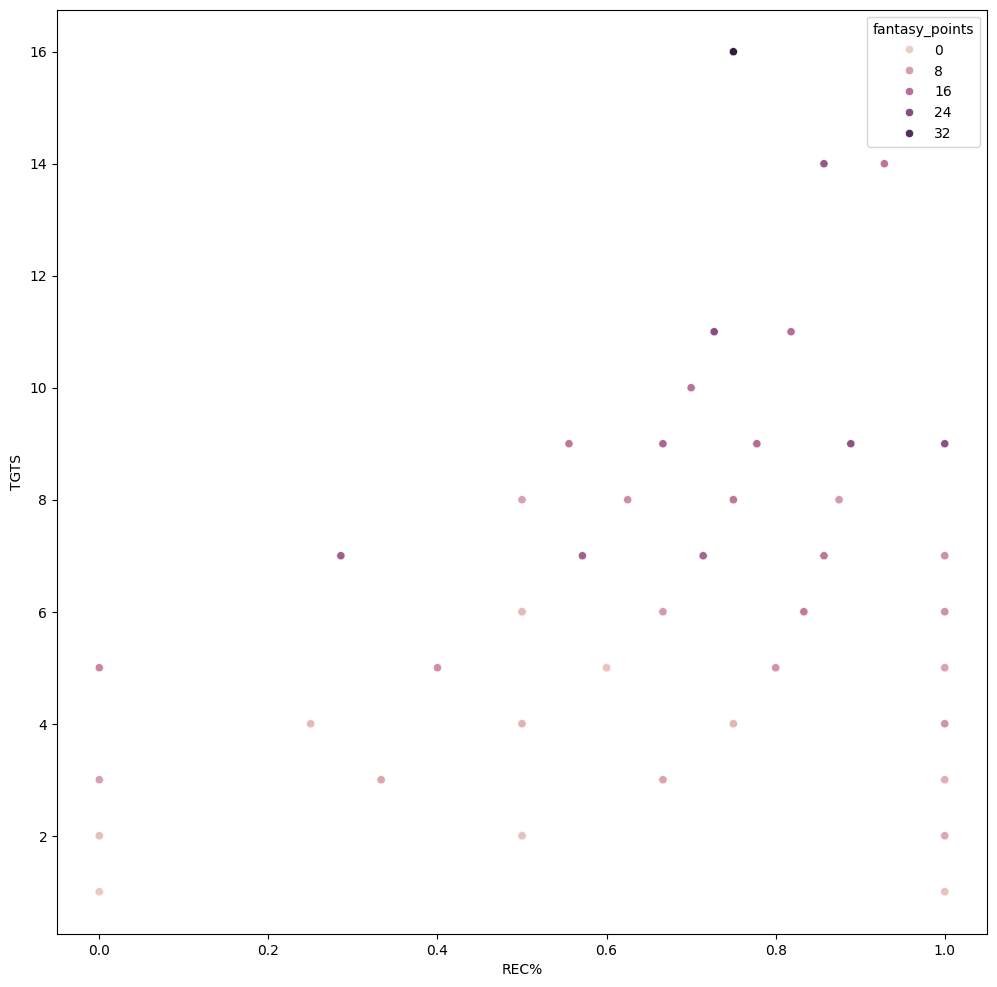

In [127]:
# 10. Higher Rec % = More Targets?

# Remove text columns for correlation statistics.
Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

# Use seaborn to create with color
sns.scatterplot(data=Correlation_RunningbackWeektoWeek2023, x="REC%", y="TGTS", hue="fantasy_points")

# Conclusion: High reception % do result in more targets.

In [128]:
# 11. Runningbacks don't really fumble the ball. Does this influence points scored?

# Remove text columns for correlation statistics.
Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

Correlation_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='LST', ascending=False).head(10)


CAR  RUSH_YDS  RUSH_AVG  RUSH_TD  RUSH_LNG  REC  TGTS  \
playerName                                                                  
Austin Ekeler       179       628      47.9        5       195   51    74   
Bijan Robinson      200       871      66.1        4       238   53    81   
Saquon Barkley      247       962      54.9        6       290   41    60   
Antonio Gibson       65       265      66.6        1       130   48    59   
Samaje Perine        53       238      68.7        1       111   50    56   
Brian Robinson Jr.  178       733      63.1        5       227   36    43   
Miles Sanders       129       432      48.9        1       181   27    41   
Alexander Mattison  180       700      60.5        0       182   30    44   
Javonte Williams    217       774      54.3        3       218   47    58   
Ezekiel Elliott     171       588      55.5        3       154   49    63   

                    REC_YDS  REC_AVG  REC_TD  LNG_REC  FUM  LST  Winner Score  \
playerName                                                                      
Austin Ekeler           436    105.9       1      232    5    4           374   
Bijan Robinson          455    111.6       4      264    4    3           403   
Saquon Barkley          280     96.4       4      173    2    2           366   
Antonio Gibson          389    123.8       2      245    3    2           504   
Samaje Perine           455    154.1       0      228    3    2           477   
Brian Robinson Jr.      368    110.8       4      221    4    2           477   
Miles Sanders           154     59.0       0       91    2    2           378   
Alexander Mattison      192     83.4       3      138    3    2           382   
Javonte Williams        228     72.5       2      140    1    1           446   
Ezekiel Elliott         279     79.7       2      129    2    1           371   

                    Loser Score  fantasy_points       REC%  
playerName                                                  
Austin Ekeler               226           159.9   9.371429  
Bijan Robinson              261           201.1   9.564286  
Saquon Barkley              191           200.7   9.723810  
Antonio Gibson              293           103.4  13.400000  
Samaje Perine               293            96.3  15.433333  
Brian Robinson Jr.          264           178.1  10.111111  
Miles Sanders               211            74.1   8.422222  
Alexander Mattison          273           118.2  10.869048  
Javonte Williams            272           151.7  12.777778  
Ezekiel Elliott             215           139.2  10.521753

In [129]:
# 12. Are receiving RBs more valuable than just rushing? Or are players just splitting their time between receiving and running?

# Remove text columns for correlation statistics.
Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

print(Correlation_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='fantasy_points', ascending=False).head(10))

print(Correlation_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='TGTS', ascending=False).head(10))


# 8 of 10 top scoring RBs are above mean receiving targets. 6 of 10 are in the 75th percentile.

                    CAR  RUSH_YDS  RUSH_AVG  RUSH_TD  RUSH_LNG  REC  TGTS  \
playerName                                                                  
Breece Hall         223       994      73.0        5       410   76    95   
Joe Mixon           257      1034      68.9        9       260   52    64   
Travis Etienne Jr.  221       817      54.5        9       264   51    65   
Derrick Henry       268      1070      60.9       11       289   26    34   
Bijan Robinson      200       871      66.1        4       238   53    81   
Saquon Barkley      247       962      54.9        6       290   41    60   
Alvin Kamara        180       694      50.1        5       165   75    86   
James Conner        208      1040      66.5        7       285   27    33   
Kenneth Walker III  219       905      63.4        8       300   29    37   
Brian Robinson Jr.  178       733      63.1        5       227   36    43   

                    REC_YDS  REC_AVG  REC_TD  LNG_REC  FUM  LST  Winner Sco

In [130]:
# 13. Who are the top RBs when it comes to rush yards, rush TDs, Rush avg, rec, fantasy points? 
# column_names = [RUSH_YDS, RUSH_TD, RUSH_AVG, REC, fantasy_points]

# Remove text columns for group by statistics.
Groupby_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date', 'Game Result', 'Opponent', 'OT?', 'Home/Away'])


# Group columns to look at Quarterback WeektoWeek 2023 dataset closer.
Groupby_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='fantasy_points', ascending=False).head(10)

CAR  RUSH_YDS  RUSH_AVG  RUSH_TD  RUSH_LNG  REC  TGTS  \
playerName                                                                  
Breece Hall         223       994      73.0        5       410   76    95   
Joe Mixon           257      1034      68.9        9       260   52    64   
Travis Etienne Jr.  221       817      54.5        9       264   51    65   
Derrick Henry       268      1070      60.9       11       289   26    34   
Bijan Robinson      200       871      66.1        4       238   53    81   
Saquon Barkley      247       962      54.9        6       290   41    60   
Alvin Kamara        180       694      50.1        5       165   75    86   
James Conner        208      1040      66.5        7       285   27    33   
Kenneth Walker III  219       905      63.4        8       300   29    37   
Brian Robinson Jr.  178       733      63.1        5       227   36    43   

                    REC_YDS  REC_AVG  REC_TD  LNG_REC  FUM  LST  FF  KB  \
playerName                                                                
Breece Hall             591    134.4       4      280    2    0   0   0   
Joe Mixon               376    124.8       3      255    0    0   0   0   
Travis Etienne Jr.      411    118.9       1      219    0    0   0   0   
Derrick Henry           198    112.9       0      161    0    0   0   0   
Bijan Robinson          455    111.6       4      264    4    3   0   0   
Saquon Barkley          280     96.4       4      173    2    2   0   0   
Alvin Kamara            466     81.9       1      182    0    0   0   0   
James Conner            165     49.3       2      104    0    0   0   0   
Kenneth Walker III      259    139.8       1      199    1    0   0   0   
Brian Robinson Jr.      368    110.8       4      221    4    2   0   0   

                    Winner Score  Loser Score  fantasy_points       REC%  
playerName                                                                
Breece Hall                  420          203           250.5  12.916667  
Joe Mixon                    468          282           239.0  13.757143  
Travis Etienne Jr.           437          236           208.3  12.233333  
Derrick Henry                391          241           205.8  10.166667  
Bijan Robinson               403          261           201.1   9.564286  
Saquon Barkley               366          191           200.7   9.723810  
Alvin Kamara                 362          199           189.5  11.394048  
James Conner                 383          255           188.0   7.966667  
Kenneth Walker III           391          255           184.9  10.766667  
Brian Robinson Jr.           477          264           178.1  10.111111

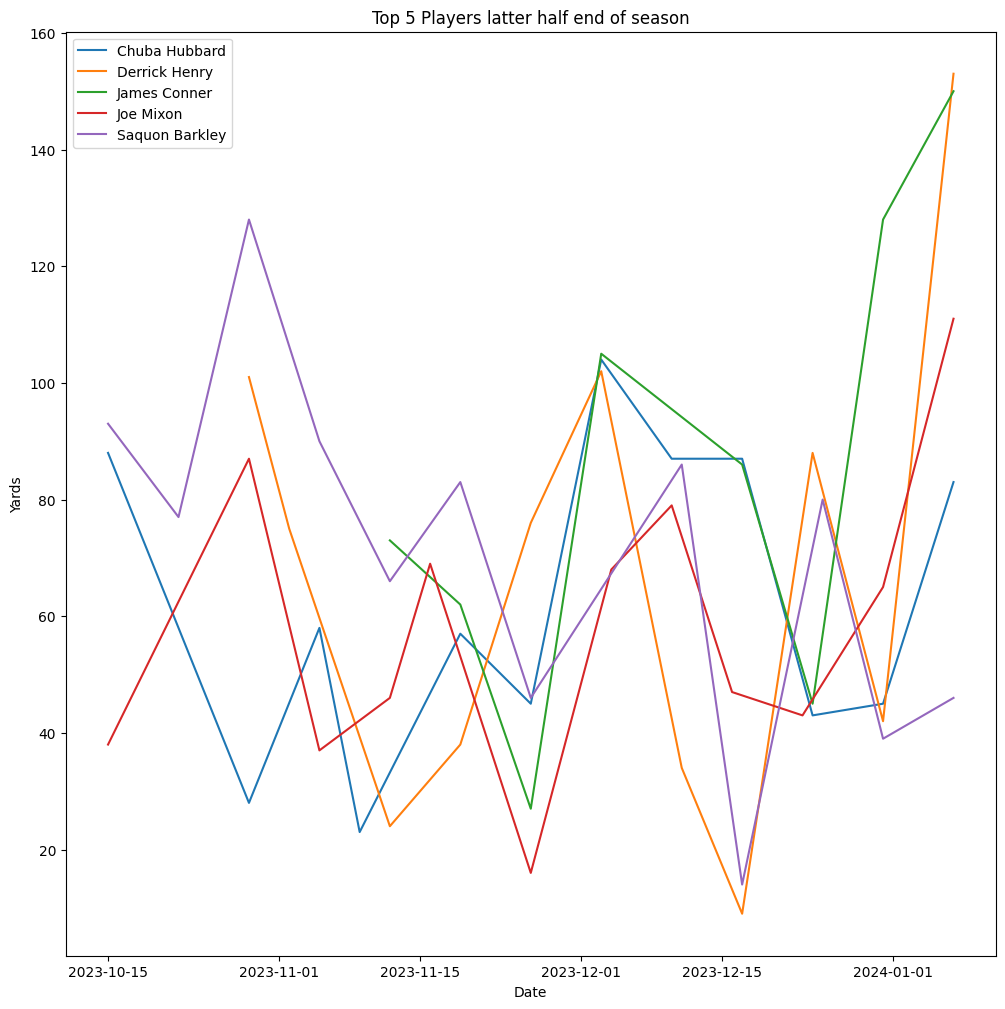

In [131]:
# 14. Who are trending up in rush yards, rush TDs, Rush avg, rec, fantasy points past 3 months?
# column_names = [CAR, RUSH_YDS, RUSH_TD, RUSH_AVG, REC, fantasy_points]

# Make sure data is organized by date so line chart will portray correctly
RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.sort_values(by='Date')

# Find last date in dataset
last_date = RunningbackWeektoWeek2023['Date'].max()

# Create a variable that contains the date two months previous than the last game of 2023/24 season.
two_months_ago = last_date - timedelta(days=90)

# Only include data that is after the two month cutoff period.
filteredDate_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023[RunningbackWeektoWeek2023['Date'] >= two_months_ago]

# Remove date due to limitations from groupby
Top_10_players = filteredDate_RunningbackWeektoWeek2023.drop(columns=['Date'])

# Find Top 10 players from the last two months of season.
Top_10_players = Top_10_players.groupby('playerName', as_index=False).sum().sort_values(by='RUSH_YDS', ascending=False).head(5)

# Take players name from df
Top_10_players_names = Top_10_players['playerName']

# Keep only rows in the original DataFrame for the filtered players
filteredDate_RunningbackWeektoWeek2023 = filteredDate_RunningbackWeektoWeek2023[filteredDate_RunningbackWeektoWeek2023['playerName'].isin(Top_10_players_names)]

grouped_by_player = filteredDate_RunningbackWeektoWeek2023.groupby('playerName')

## Create a line plot for each player
for player, group in grouped_by_player:
    plt.plot(group['Date'], group['RUSH_YDS'], label=player)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Yards')
plt.title('Top 5 Players latter half end of season')
plt.legend(loc='best')  # 'best' location for the legend

# Show the plot
plt.show()

## Conclusion: Plot explains the conclusion.

In [132]:
# 15. Based on PPR value alone, who is the most valuable? 

# Remove text columns for correlation statistics.
Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

Correlation_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='REC', ascending=False).head(10)

CAR  RUSH_YDS  RUSH_AVG  RUSH_TD  RUSH_LNG  REC  TGTS  \
playerName                                                                  
Breece Hall         223       994      73.0        5       410   76    95   
Alvin Kamara        180       694      50.1        5       165   75    86   
Bijan Robinson      200       871      66.1        4       238   53    81   
Joe Mixon           257      1034      68.9        9       260   52    64   
Travis Etienne Jr.  221       817      54.5        9       264   51    65   
Tyjae Spears         96       438      77.0        2       210   51    69   
Austin Ekeler       179       628      47.9        5       195   51    74   
Samaje Perine        53       238      68.7        1       111   50    56   
Ezekiel Elliott     171       588      55.5        3       154   49    63   
Antonio Gibson       65       265      66.6        1       130   48    59   

                    REC_YDS  REC_AVG  REC_TD  LNG_REC  FUM  LST  Winner Score  \
playerName                                                                      
Breece Hall             591    134.4       4      280    2    0           420   
Alvin Kamara            466     81.9       1      182    0    0           362   
Bijan Robinson          455    111.6       4      264    4    3           403   
Joe Mixon               376    124.8       3      255    0    0           468   
Travis Etienne Jr.      411    118.9       1      219    0    0           437   
Tyjae Spears            337     92.6       1      163    1    0           391   
Austin Ekeler           436    105.9       1      232    5    4           374   
Samaje Perine           455    154.1       0      228    3    2           477   
Ezekiel Elliott         279     79.7       2      129    2    1           371   
Antonio Gibson          389    123.8       2      245    3    2           504   

                    Loser Score  fantasy_points       REC%  
playerName                                                  
Breece Hall                 203           250.5  12.916667  
Alvin Kamara                199           189.5  11.394048  
Bijan Robinson              261           201.1   9.564286  
Joe Mixon                   282           239.0  13.757143  
Travis Etienne Jr.          236           208.3  12.233333  
Tyjae Spears                241           121.0  12.266667  
Austin Ekeler               226           159.9   9.371429  
Samaje Perine               293            96.3  15.433333  
Ezekiel Elliott             215           139.2  10.521753  
Antonio Gibson              293           103.4  13.400000

In [133]:
# 16. What about most valuable receiving RB (include TDs and YDs)?

scoring = {

# Receiving
'REC':0.5,
'REC_YDS':0.1,
'REC_TD':6

}

# What did each player get for those scoring areas?

def calculate_fantasy_points(row):
    fantasy_points = 0
    for stat, value in scoring.items():
        fantasy_points += row[stat] * value

    return fantasy_points

# Run function and then add to dataframe
RunningbackWeektoWeek2023['PPR_fantasy_points'] = RunningbackWeektoWeek2023.apply(calculate_fantasy_points, axis=1)


# Remove text columns for correlation statistics.
Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

Correlation_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='PPR_fantasy_points', ascending=False).head(10)

CAR  RUSH_YDS  RUSH_AVG  RUSH_TD  RUSH_LNG  REC  TGTS  \
playerName                                                                  
Breece Hall         223       994      73.0        5       410   76    95   
Bijan Robinson      200       871      66.1        4       238   53    81   
Alvin Kamara        180       694      50.1        5       165   75    86   
Joe Mixon           257      1034      68.9        9       260   52    64   
Brian Robinson Jr.  178       733      63.1        5       227   36    43   
Austin Ekeler       179       628      47.9        5       195   51    74   
Antonio Gibson       65       265      66.6        1       130   48    59   
Travis Etienne Jr.  221       817      54.5        9       264   51    65   
Saquon Barkley      247       962      54.9        6       290   41    60   
Samaje Perine        53       238      68.7        1       111   50    56   

                    REC_YDS  REC_AVG  REC_TD  LNG_REC  FUM  LST  Winner Score  \
playerName                                                                      
Breece Hall             591    134.4       4      280    2    0           420   
Bijan Robinson          455    111.6       4      264    4    3           403   
Alvin Kamara            466     81.9       1      182    0    0           362   
Joe Mixon               376    124.8       3      255    0    0           468   
Brian Robinson Jr.      368    110.8       4      221    4    2           477   
Austin Ekeler           436    105.9       1      232    5    4           374   
Antonio Gibson          389    123.8       2      245    3    2           504   
Travis Etienne Jr.      411    118.9       1      219    0    0           437   
Saquon Barkley          280     96.4       4      173    2    2           366   
Samaje Perine           455    154.1       0      228    3    2           477   

                    Loser Score  fantasy_points       REC%  PPR_fantasy_points  
playerName                                                                      
Breece Hall                 203           250.5  12.916667               121.1  
Bijan Robinson              261           201.1   9.564286                96.0  
Alvin Kamara                199           189.5  11.394048                90.1  
Joe Mixon                   282           239.0  13.757143                81.6  
Brian Robinson Jr.          264           178.1  10.111111                78.8  
Austin Ekeler               226           159.9   9.371429                75.1  
Antonio Gibson              293           103.4  13.400000                74.9  
Travis Etienne Jr.          236           208.3  12.233333                72.6  
Saquon Barkley              191           200.7   9.723810                72.5  
Samaje Perine               293            96.3  15.433333                70.5

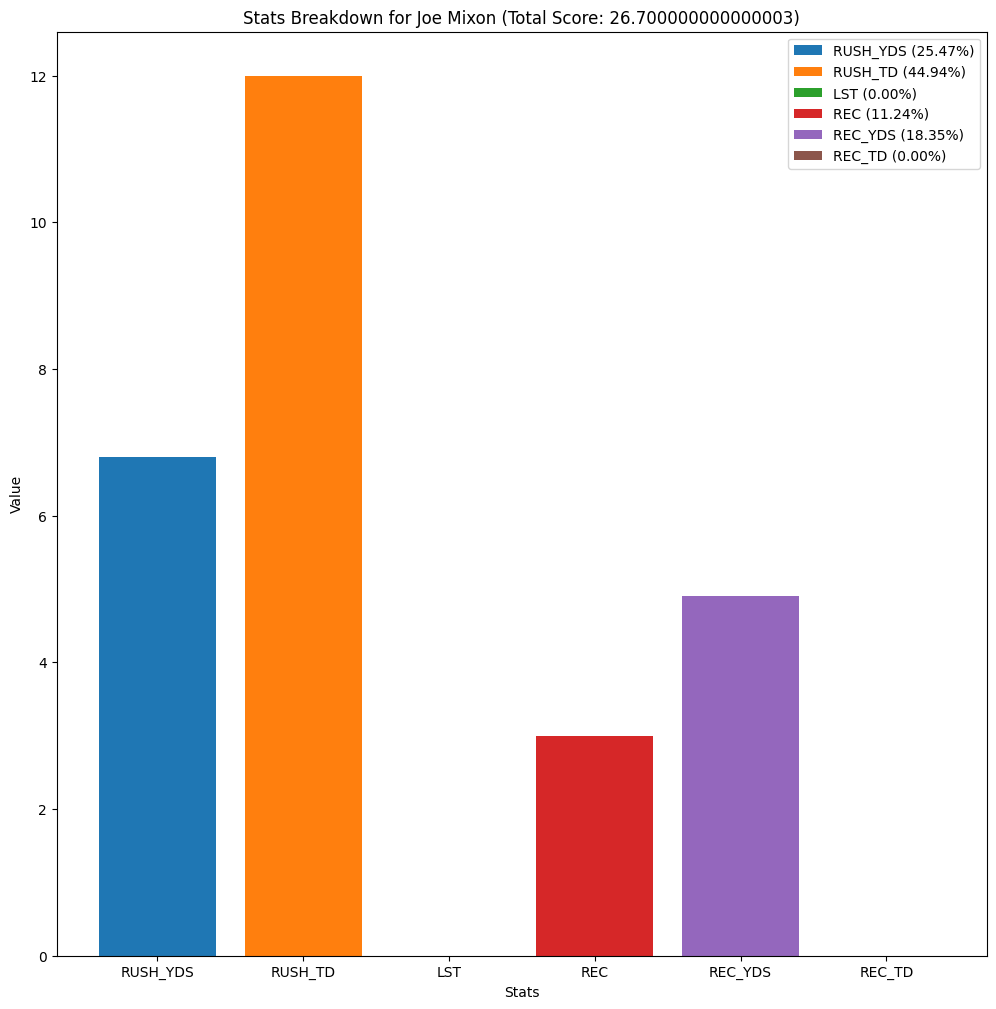

In [134]:
# 17. What stat(s) is contributing to high fantasy scores? Who are the leaders in that stat(s)?

# Sort the DataFrame by 'Total_Score' in descending order
RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.sort_values(by='fantasy_points', ascending=False)

# Select the top player for visualization (you can choose any player)
top_player = RunningbackWeektoWeek2023.iloc[7]

# Calculate the percentage contribution of each stat to the final score
RUSH_YDS_pct = (top_player['RUSH_YDS'] * 0.1 / top_player['fantasy_points']) * 100
RUSH_TD_pct = (top_player['RUSH_TD'] * 6 / top_player['fantasy_points']) * 100
LST_pct = (top_player['LST'] * -2 / top_player['fantasy_points']) * 100
REC_pct = (top_player['REC'] * 0.5 / top_player['fantasy_points']) * 100
REC_YDS_pct = (top_player['REC_YDS'] * 0.1 / top_player['fantasy_points']) * 100
REC_TD_pct = (top_player['REC_TD'] * 6 / top_player['fantasy_points']) * 100

# Create a stacked bar chart to visualize the stats and their percentages
fig, ax = plt.subplots()

# Plot the individual stats as bars
ax.bar('RUSH_YDS', top_player['RUSH_YDS'] * 0.1, label=f'RUSH_YDS ({RUSH_YDS_pct:.2f}%)')
ax.bar('RUSH_TD', top_player['RUSH_TD'] * 6, label=f'RUSH_TD ({RUSH_TD_pct:.2f}%)')
ax.bar('LST', top_player['LST']  * -2, label=f'LST ({LST_pct:.2f}%)')
ax.bar('REC', top_player['REC']  * 0.5, label=f'REC ({REC_pct:.2f}%)')
ax.bar('REC_YDS', top_player['REC_YDS'] * 0.1, label=f'REC_YDS ({REC_YDS_pct:.2f}%)')
ax.bar('REC_TD', top_player['REC_TD'] * 6, label=f'REC_TD ({REC_TD_pct:.2f}%)')

# Add labels and legend
ax.set_xlabel('Stats')
ax.set_ylabel('Value')
ax.set_title(f'Stats Breakdown for {top_player["playerName"]} (Total Score: {top_player["fantasy_points"]})')
ax.legend()

# Show the plot
plt.show()

## Receiver Exploration Questions

In [135]:
# 1. Who are the leading receivers in dataset with big rushing totals?

Correlation_ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.drop(columns=['Date', 'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

top_receiving_ReceiverWeektoWeek2023 = Correlation_ReceiverWeektoWeek2023.groupby('playerName').sum().sort_values(by='REC_YDS', ascending=False).head(10)

top_rushing_ReceiverWeektoWeek2023 = Correlation_ReceiverWeektoWeek2023.groupby('playerName').sum().sort_values(by='RUSH_YDS', ascending=False).head(10)

top_receiving_ReceiverWeektoWeek2023['TD Leader'] = 'Receiving'
top_rushing_ReceiverWeektoWeek2023['TD Leader'] = 'Rushing'

Final = pd.concat([top_receiving_ReceiverWeektoWeek2023, top_rushing_ReceiverWeektoWeek2023], axis=0).sort_values(by='fantasy_points', ascending=False)


Final.head(10)

REC  TGTS  REC_YDS  REC_AVG  REC_TD  LNG_REC  CAR  \
playerName                                                               
DJ Moore              96   136     1364    233.9       8      466    4   
DJ Moore              96   136     1364    233.9       8      466    4   
A.J. Brown           106   158     1456    218.8       7      451    0   
Keenan Allen         108   150     1243    151.3       7      358    2   
Davante Adams        103   175     1144    184.7       8      384    0   
Ja'Marr Chase        100   145     1216    191.4       7      486    3   
DK Metcalf            66   119     1114    291.5       8      520    0   
Chris Olave           87   138     1123    193.9       5      379    0   
Michael Pittman Jr.  101   144     1068    189.3       4      417    0   
Jakobi Meyers         71   106      807    206.2       8      328    4   

                     RUSH_YDS  RUSH_AVG  LNG_RUSH  RUSH_TD  FUM  LST  \
playerName                                                             
DJ Moore                   21       7.7        17        1    1    1   
DJ Moore                   21       7.7        17        1    1    1   
A.J. Brown                  0       0.0         0        0    2    2   
Keenan Allen                6       3.0         4        0    2    1   
Davante Adams               0       0.0         0        0    0    0   
Ja'Marr Chase              -6      -2.0         2        0    1    0   
DK Metcalf                  0       0.0         0        0    0    0   
Chris Olave                 0       0.0         0        0    0    0   
Michael Pittman Jr.         0       0.0         0        0    2    1   
Jakobi Meyers              24      24.0        24        2    0    0   

                     Winner Score  Loser Score  fantasy_points       REC%  \
playerName                                                                  
DJ Moore                      468          271           238.5  11.965049   
DJ Moore                      468          271           238.5  11.965049   
A.J. Brown                    506          355           236.6  11.632756   
Keenan Allen                  337          227           218.9   9.077633   
Davante Adams                 429          234           213.9   9.871337   
Ja'Marr Chase                 434          271           213.0  10.890298   
DK Metcalf                    443          293           192.4   9.065476   
Chris Olave                   440          259           185.8  10.173368   
Michael Pittman Jr.           445          311           179.3  10.316271   
Jakobi Meyers                 391          224           178.6  11.126557   

                     TD Leader  
playerName                      
DJ Moore             Receiving  
DJ Moore               Rushing  
A.J. Brown           Receiving  
Keenan Allen         Receiving  
Davante Adams        Receiving  
Ja'Marr Chase        Receiving  
DK Metcalf           Receiving  
Chris Olave          Receiving  
Michael Pittman Jr.  Receiving  
Jakobi Meyers          Rushing

In [136]:
# 2. Are QBS fantasy scoring more than the RB and WR? Meaning better RB & WR will give you more distribution from mean?

Correlation_ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.drop(columns=['Date', 'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

top_receiving_ReceiverWeektoWeek2023 = Correlation_ReceiverWeektoWeek2023.groupby('playerName').sum().sort_values(by='REC_YDS', ascending=False).head(10)

top_receiving_ReceiverWeektoWeek2023 = Correlation_ReceiverWeektoWeek2023.groupby('playerName').sum().sort_values(by='REC_YDS', ascending=False).head(10)


In [137]:
# 3. How do TEs compare to WRs?

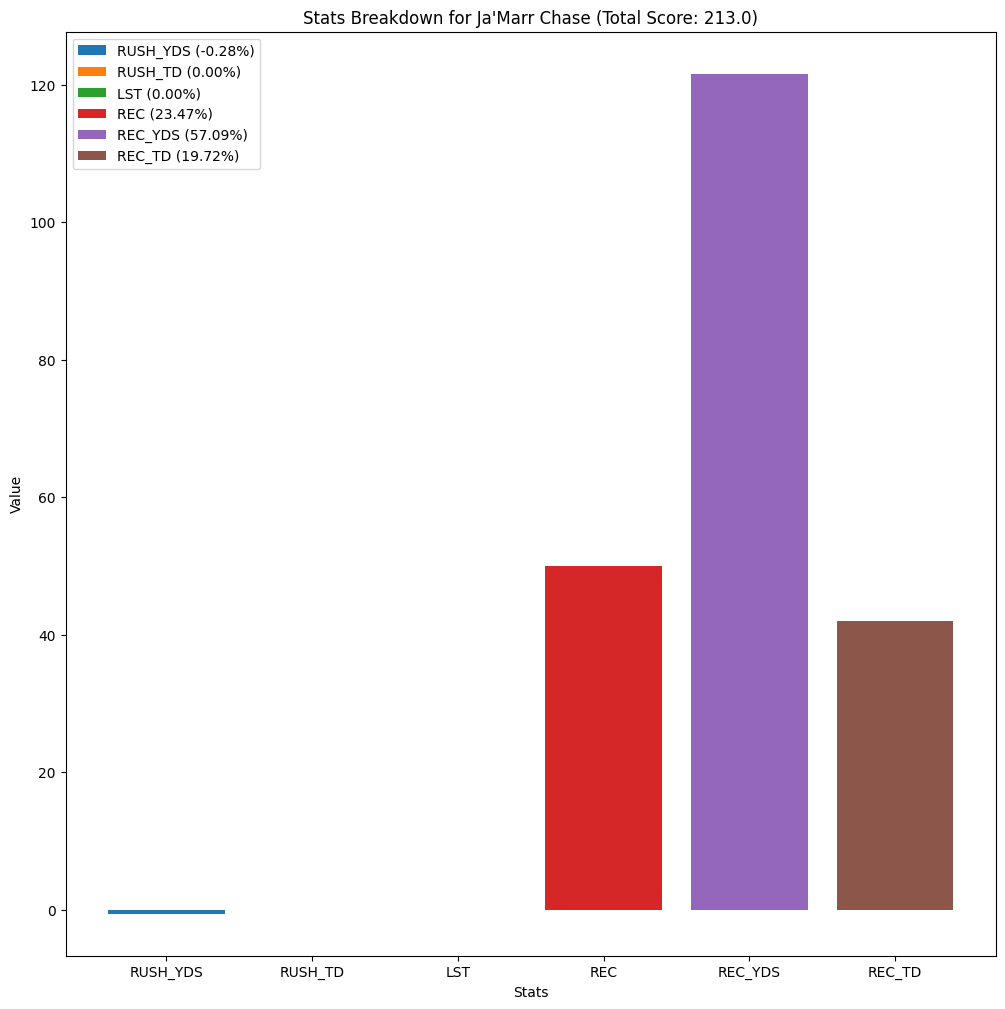

In [138]:
# 4. Where do most receiver points come from?

groupby_ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.drop(columns=['Date', 'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

groupby_ReceiverWeektoWeek2023 = groupby_ReceiverWeektoWeek2023.groupby('playerName', as_index=False).sum().sort_values(by='fantasy_points', ascending=False).head(5)

# Sort the DataFrame by 'Total_Score' in descending order
groupby_ReceiverWeektoWeek2023 = groupby_ReceiverWeektoWeek2023.sort_values(by='fantasy_points', ascending=False)

# Select the top player for visualization (you can choose any player)
top_player = groupby_ReceiverWeektoWeek2023.iloc[4]

# Calculate the percentage contribution of each stat to the final score
RUSH_YDS_pct = (top_player['RUSH_YDS'] * 0.1 / top_player['fantasy_points']) * 100
RUSH_TD_pct = (top_player['RUSH_TD'] * 6 / top_player['fantasy_points']) * 100
LST_pct = (top_player['LST'] * -2 / top_player['fantasy_points']) * 100
REC_pct = (top_player['REC'] * 0.5 / top_player['fantasy_points']) * 100
REC_YDS_pct = (top_player['REC_YDS'] * 0.1 / top_player['fantasy_points']) * 100
REC_TD_pct = (top_player['REC_TD'] * 6 / top_player['fantasy_points']) * 100

# Create a stacked bar chart to visualize the stats and their percentages
fig, ax = plt.subplots()

# Plot the individual stats as bars
ax.bar('RUSH_YDS', top_player['RUSH_YDS'] * 0.1, label=f'RUSH_YDS ({RUSH_YDS_pct:.2f}%)')
ax.bar('RUSH_TD', top_player['RUSH_TD'] * 6, label=f'RUSH_TD ({RUSH_TD_pct:.2f}%)')
ax.bar('LST', top_player['LST']  * -2, label=f'LST ({LST_pct:.2f}%)')
ax.bar('REC', top_player['REC']  * 0.5, label=f'REC ({REC_pct:.2f}%)')
ax.bar('REC_YDS', top_player['REC_YDS'] * 0.1, label=f'REC_YDS ({REC_YDS_pct:.2f}%)')
ax.bar('REC_TD', top_player['REC_TD'] * 6, label=f'REC_TD ({REC_TD_pct:.2f}%)')

# Add labels and legend
ax.set_xlabel('Stats')
ax.set_ylabel('Value')
ax.set_title(f'Stats Breakdown for {top_player["playerName"]} (Total Score: {top_player["fantasy_points"]})')
ax.legend()

# Show the plot
plt.show()

In [139]:
# 5. Who are the outliers when it comes to Rec_YDs, receptions, and reception tds?

Groupby_ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.drop(columns=['Date',  'Opponent', 'Game Result', 'OT?', 'Home/Away'])
Groupby_ReceiverWeektoWeek2023 = Groupby_ReceiverWeektoWeek2023.groupby('playerName').sum()

# Assuming you have a DataFrame 'data' with a column 'value' containing your data
# Calculate the IQR (Interquartile Range)
Q1 = Groupby_ReceiverWeektoWeek2023['REC_YDS'].quantile(0.25)
Q3 = Groupby_ReceiverWeektoWeek2023['REC_YDS'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers using the lower and upper bounds
outliers = Groupby_ReceiverWeektoWeek2023[Groupby_ReceiverWeektoWeek2023['REC_YDS'] > upper_bound]

outliers.sort_values(by='REC_YDS', ascending=False)

Empty DataFrame
Columns: [REC, TGTS, REC_YDS, REC_AVG, REC_TD, LNG_REC, CAR, RUSH_YDS, RUSH_AVG, LNG_RUSH, RUSH_TD, FUM, LST, FF, KB, Winner Score, Loser Score, fantasy_points, REC%]
Index: []

## Additional Exploration Questions

In [140]:
# 1. What is the most valuable position in FFB? Take into account the supply and demand.

In [141]:
# 2. What is percentage of drafting a breakout player early in draft? Late in draft? Early in Waivers? Late in Waivers? 
# Does it vary by position?

## Load cleaned files into CSVs

In [142]:
# Load

QuarterbackWeektoWeek2023.to_csv(r'/Users/jacoblender/Desktop/Football dash/Data/PasserGamelog.csv')
RunningbackWeektoWeek2023.to_csv(r'/Users/jacoblender/Desktop/Football dash/Data/RunningbackGamelog.csv')
ReceiverWeektoWeek2023.to_csv(r'/Users/jacoblender/Desktop/Football dash/Data/ReceiverGamelog.csv')